## 1. Define the problem and perform Exploratory Data Analysis

In [1]:
# Importing Necessary Libraries


import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


from pylab import rcParams

from statsmodels.tsa.seasonal import seasonal_decompose

### 1.1 Read the data as an appropriate time series data

In [2]:
# Loading dataset using read function
df=pd.read_csv('Sparkling.csv')

In [3]:
# Checking the data whether loaded properly by head and tail functions
df.head()

YearMonth  Sparkling
0   1980-01       1686
1   1980-02       1591
2   1980-03       2304
3   1980-04       1712
4   1980-05       1471

In [4]:
df.tail()

YearMonth  Sparkling
182   1995-03       1897
183   1995-04       1862
184   1995-05       1670
185   1995-06       1688
186   1995-07       2031

In [5]:
df.dtypes

YearMonth    object
Sparkling     int64
dtype: object

In [6]:
df = pd.read_csv('Sparkling.csv',parse_dates=['YearMonth'])
df.head()

YearMonth  Sparkling
0 1980-01-01       1686
1 1980-02-01       1591
2 1980-03-01       2304
3 1980-04-01       1712
4 1980-05-01       1471

In [7]:
df.dtypes

YearMonth    datetime64[ns]
Sparkling             int64
dtype: object

In [8]:
df = pd.read_csv('Sparkling.csv',parse_dates=['YearMonth'],index_col='YearMonth')
df.head()

Sparkling
YearMonth            
1980-01-01       1686
1980-02-01       1591
1980-03-01       2304
1980-04-01       1712
1980-05-01       1471

### 1.2 Plot the data 

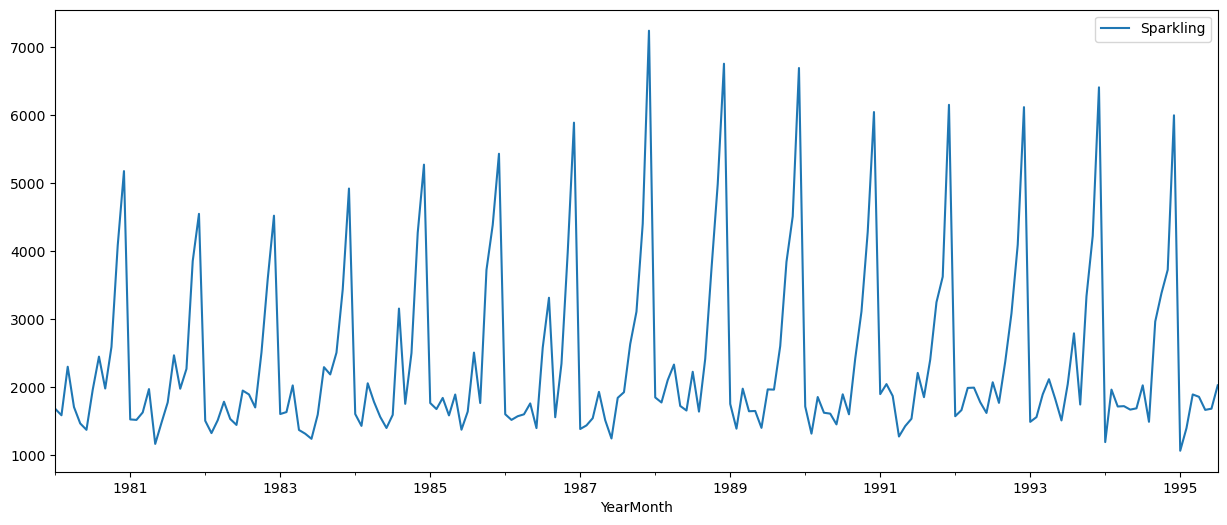

In [9]:
rcParams['figure.figsize'] = 15,6
df.plot();

### 1.3 Perform EDA 

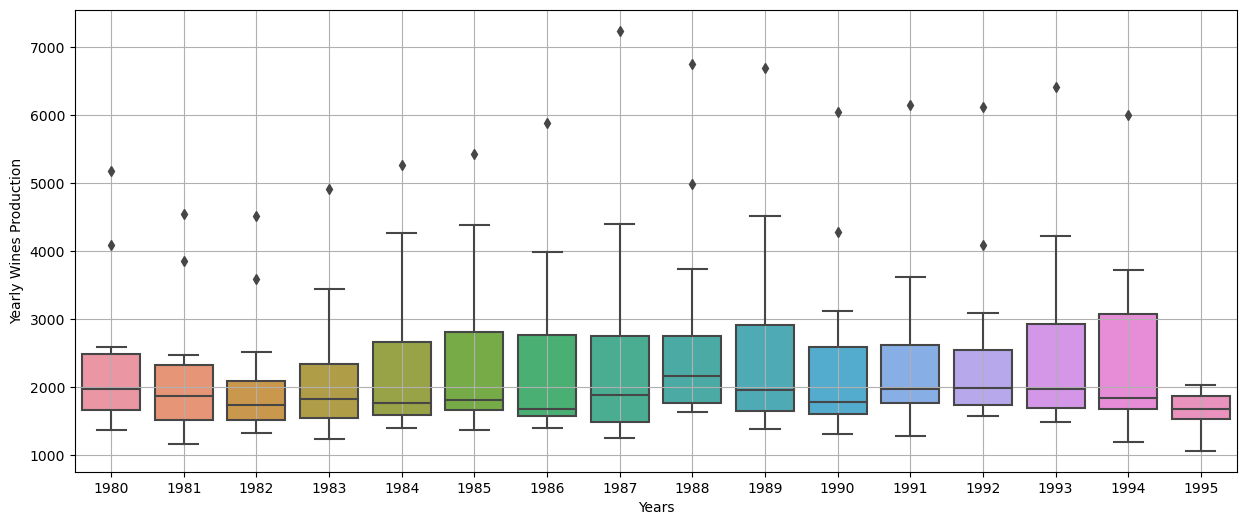

In [10]:
sns.boxplot(x=df.index.year, y='Sparkling', data=df)
plt.grid();
plt.xlabel('Years');
plt.ylabel('Yearly Wines Production');

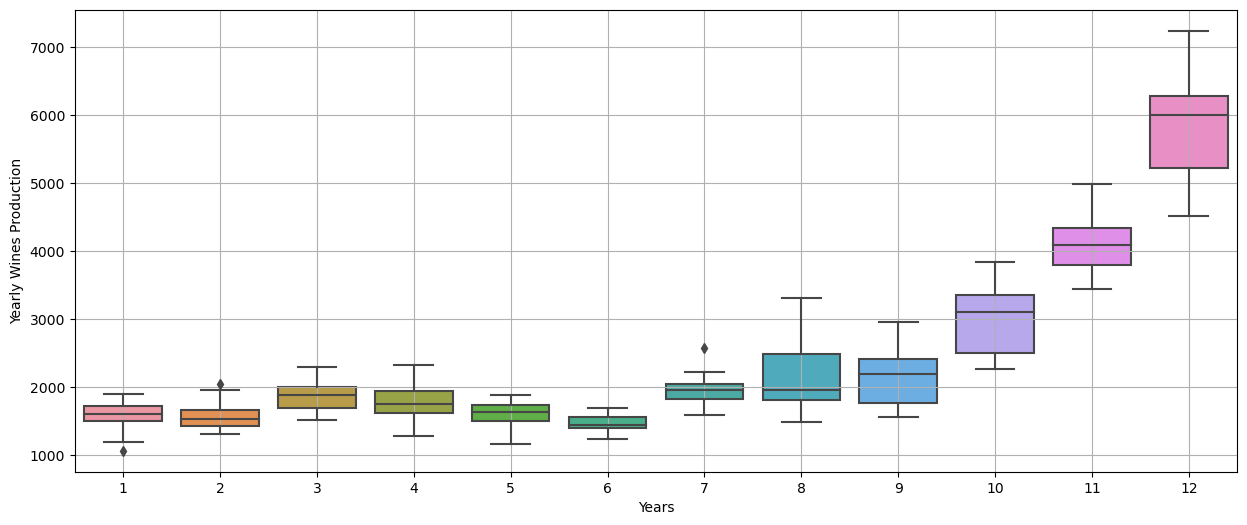

In [11]:
sns.boxplot(x=df.index.month, y='Sparkling', data=df)
plt.grid();
plt.xlabel('Years');
plt.ylabel('Yearly Wines Production');

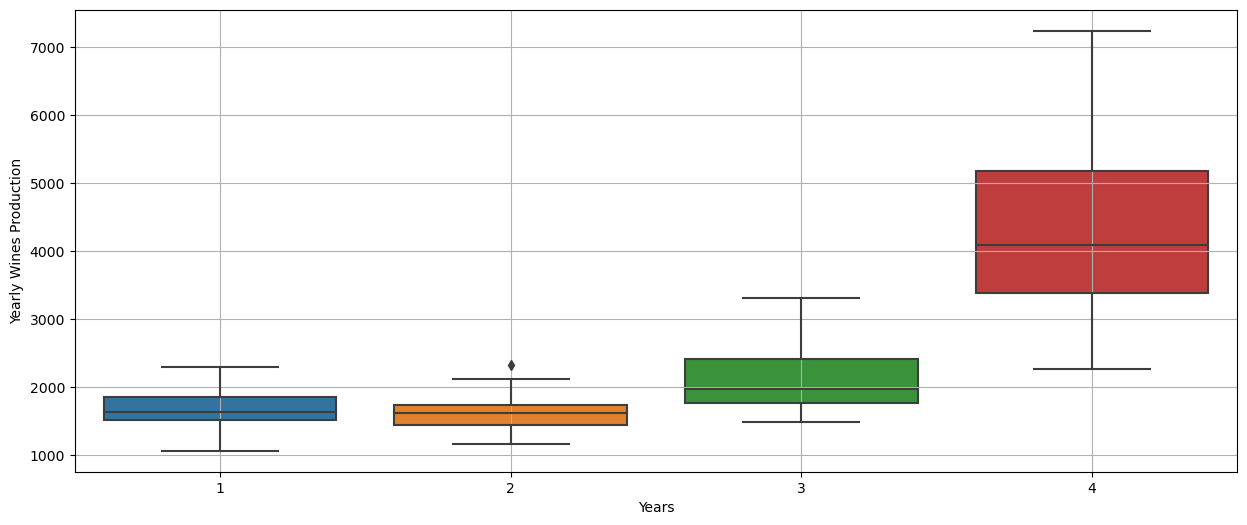

In [12]:
sns.boxplot(x=df.index.quarter, y='Sparkling', data=df)
plt.grid();
plt.xlabel('Years');
plt.ylabel('Yearly Wines Production');

<Axes: xlabel='YearMonth', ylabel='Sparkling'>

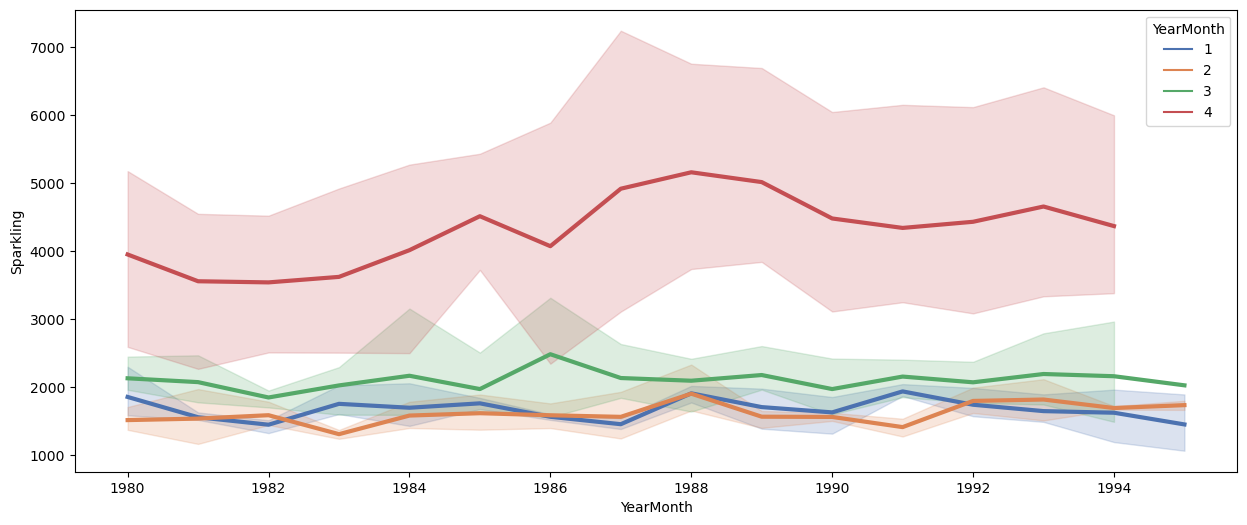

In [13]:
sns.lineplot(x=df.index.year, y=df['Sparkling'], hue=df.index.quarter, palette='deep', linewidth=3)

In [14]:
df.describe().T

count         mean         std     min     25%     50%     75%  \
Sparkling  187.0  2402.417112  1295.11154  1070.0  1605.0  1874.0  2549.0   

              max  
Sparkling  7242.0

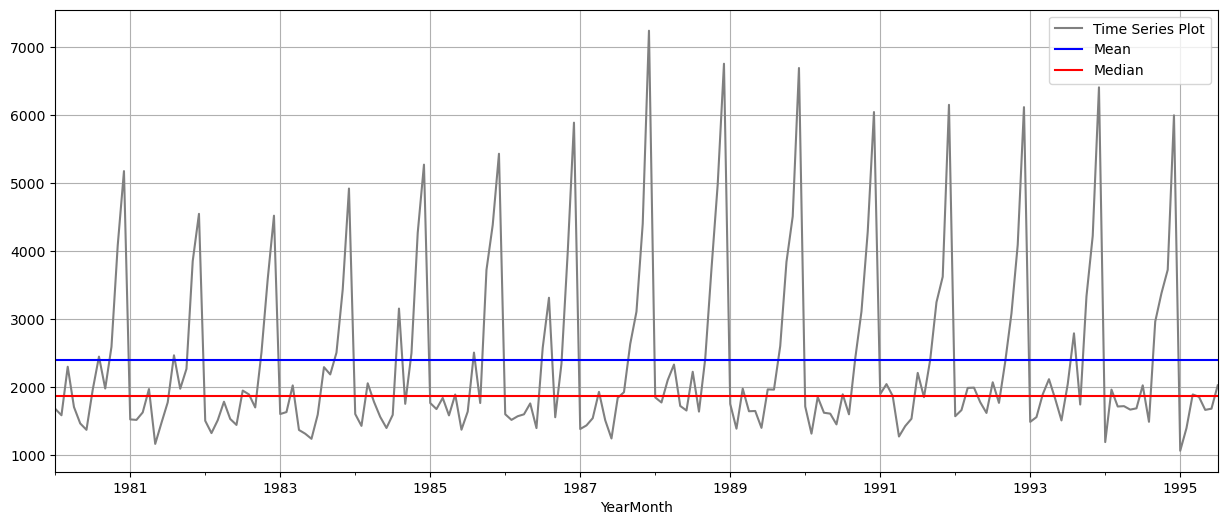

In [15]:
df.plot(color='grey')
plt.axhline(df['Sparkling'].mean(),color='Blue')
plt.axhline(df['Sparkling'].median(),color='Red')
plt.grid();
plt.legend(['Time Series Plot','Mean','Median']);

### 1.4 Perform Decomposition

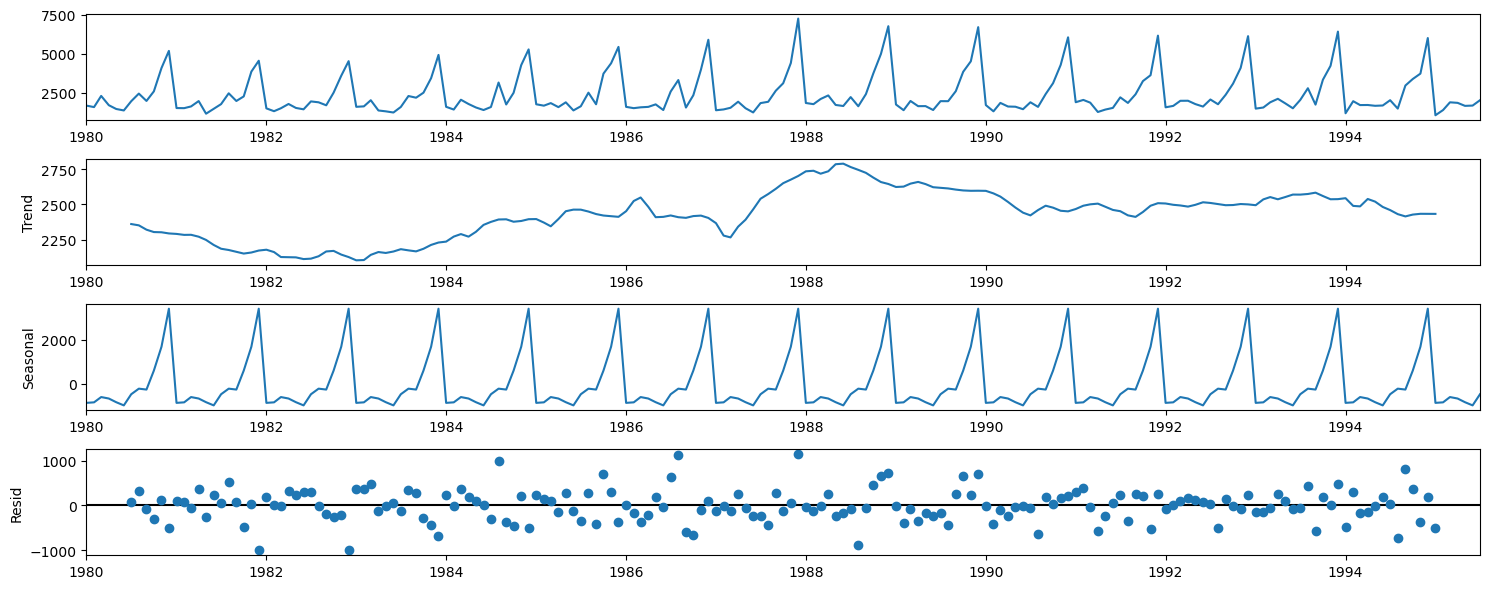

In [16]:
decomposition = seasonal_decompose(df,model='additive')
decomposition.plot();

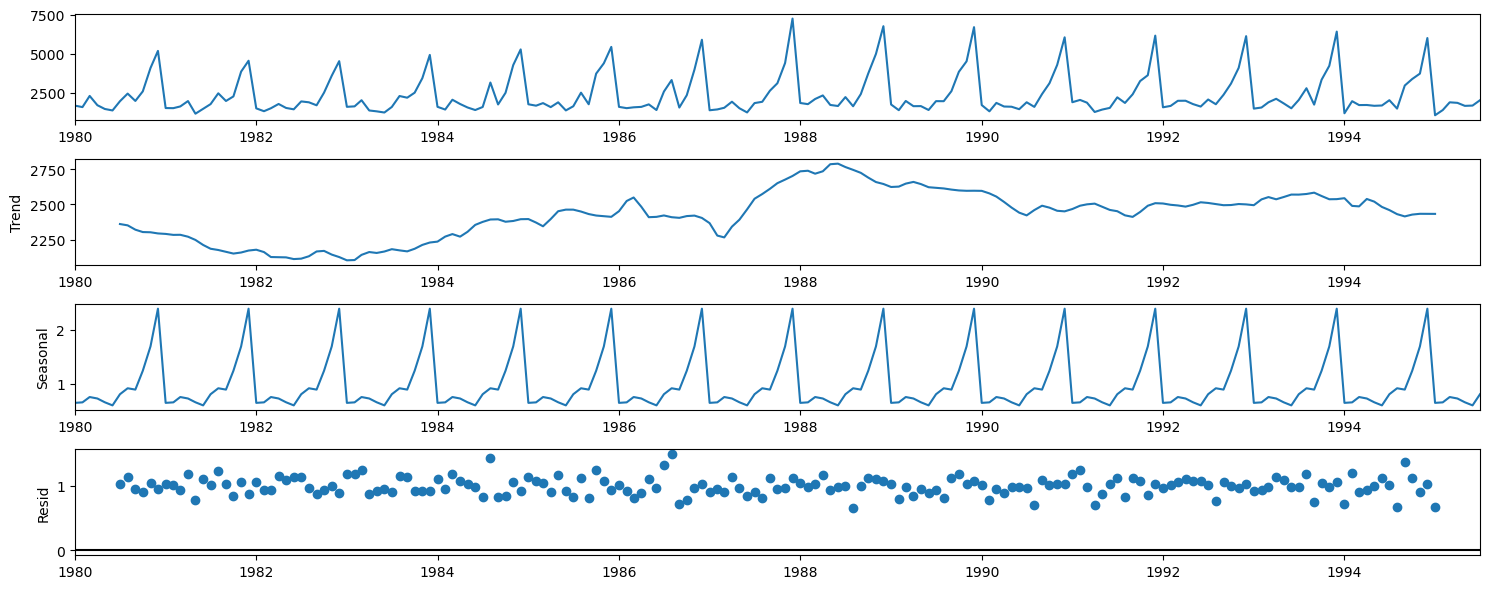

In [17]:
decomposition = seasonal_decompose(df,model='multiplicative')
decomposition.plot();

In [18]:
monthly_sales_across_years = pd.pivot_table(df, values = 'Sparkling', columns = df.index.month, index = df.index.year)
monthly_sales_across_years

YearMonth      1       2       3       4       5       6       7       8   \
YearMonth                                                                   
1980       1686.0  1591.0  2304.0  1712.0  1471.0  1377.0  1966.0  2453.0   
1981       1530.0  1523.0  1633.0  1976.0  1170.0  1480.0  1781.0  2472.0   
1982       1510.0  1329.0  1518.0  1790.0  1537.0  1449.0  1954.0  1897.0   
1983       1609.0  1638.0  2030.0  1375.0  1320.0  1245.0  1600.0  2298.0   
1984       1609.0  1435.0  2061.0  1789.0  1567.0  1404.0  1597.0  3159.0   
1985       1771.0  1682.0  1846.0  1589.0  1896.0  1379.0  1645.0  2512.0   
1986       1606.0  1523.0  1577.0  1605.0  1765.0  1403.0  2584.0  3318.0   
1987       1389.0  1442.0  1548.0  1935.0  1518.0  1250.0  1847.0  1930.0   
1988       1853.0  1779.0  2108.0  2336.0  1728.0  1661.0  2230.0  1645.0   
1989       1757.0  1394.0  1982.0  1650.0  1654.0  1406.0  1971.0  1968.0   
1990       1720.0  1321.0  1859.0  1628.0  1615.0  1457.0  1899.0  1605.0   
1991       1902.0  2049.0  1874.0  1279.0  1432.0  1540.0  2214.0  1857.0   
1992       1577.0  1667.0  1993.0  1997.0  1783.0  1625.0  2076.0  1773.0   
1993       1494.0  1564.0  1898.0  2121.0  1831.0  1515.0  2048.0  2795.0   
1994       1197.0  1968.0  1720.0  1725.0  1674.0  1693.0  2031.0  1495.0   
1995       1070.0  1402.0  1897.0  1862.0  1670.0  1688.0  2031.0     NaN   

YearMonth      9       10      11      12  
YearMonth                                  
1980       1984.0  2596.0  4087.0  5179.0  
1981       1981.0  2273.0  3857.0  4551.0  
1982       1706.0  2514.0  3593.0  4524.0  
1983       2191.0  2511.0  3440.0  4923.0  
1984       1759.0  2504.0  4273.0  5274.0  
1985       1771.0  3727.0  4388.0  5434.0  
1986       1562.0  2349.0  3987.0  5891.0  
1987       2638.0  3114.0  4405.0  7242.0  
1988       2421.0  3740.0  4988.0  6757.0  
1989       2608.0  3845.0  4514.0  6694.0  
1990       2424.0  3116.0  4286.0  6047.0  
1991       2408.0  3252.0  3627.0  6153.0  
1992       2377.0  3088.0  4096.0  6119.0  
1993       1749.0  3339.0  4227.0  6410.0  
1994       2968.0  3385.0  3729.0  5999.0  
1995          NaN     NaN     NaN     NaN

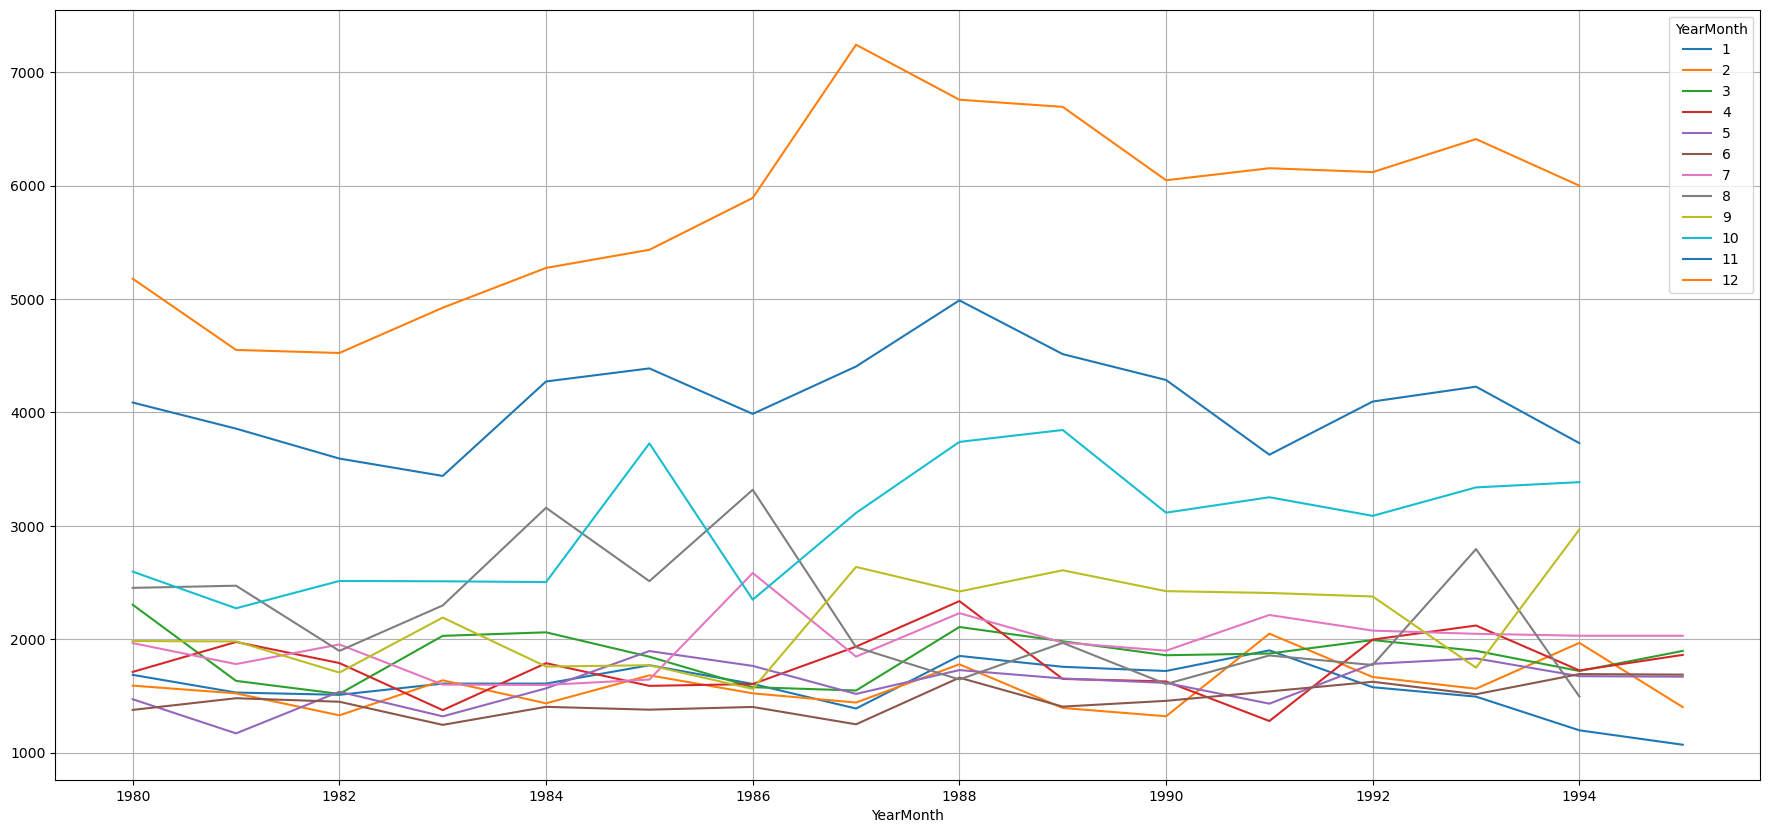

In [19]:
fig, ax = plt.subplots(figsize=(22,10))
monthly_sales_across_years.plot(ax=ax)
plt.grid();

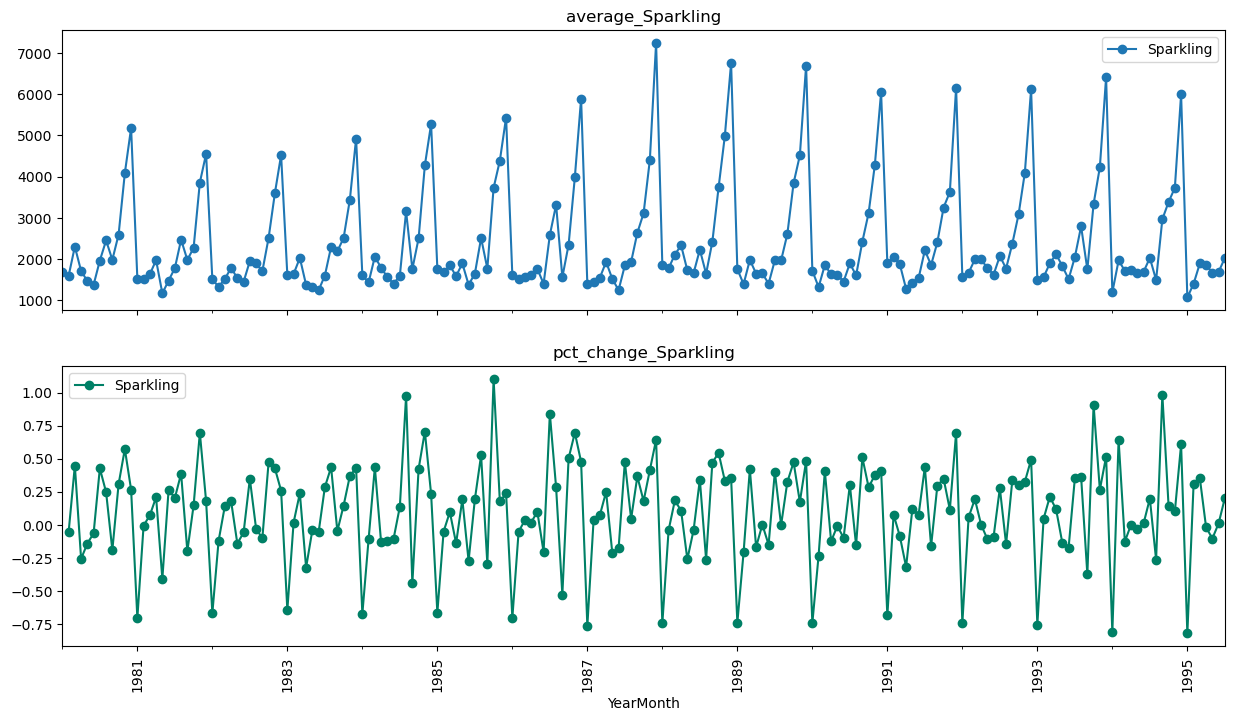

In [20]:
# group by date and get average sales, and precent change

average_Sparkling    = df.groupby(df.index)["Sparkling"].mean()
pct_change_Sparkling = df.groupby(df.index)["Sparkling"].sum().pct_change()

fig, (axis1,axis2) = plt.subplots(2,1,sharex=True,figsize=(15,8))

# plot average Sparkling sales over time(year-month)

ax1 = average_Sparkling.plot(legend=True,ax=axis1,marker='o',title="average_Sparkling")

ax1.set_xticks(range(len(average_Sparkling)))
ax1.set_xticklabels(average_Sparkling.index.tolist(), rotation=90)

# plot precent change for Sparkling sales over time(year-month)

ax2 = pct_change_Sparkling.plot(legend=True,ax=axis2,marker='o',rot=90,colormap="summer",title="pct_change_Sparkling")

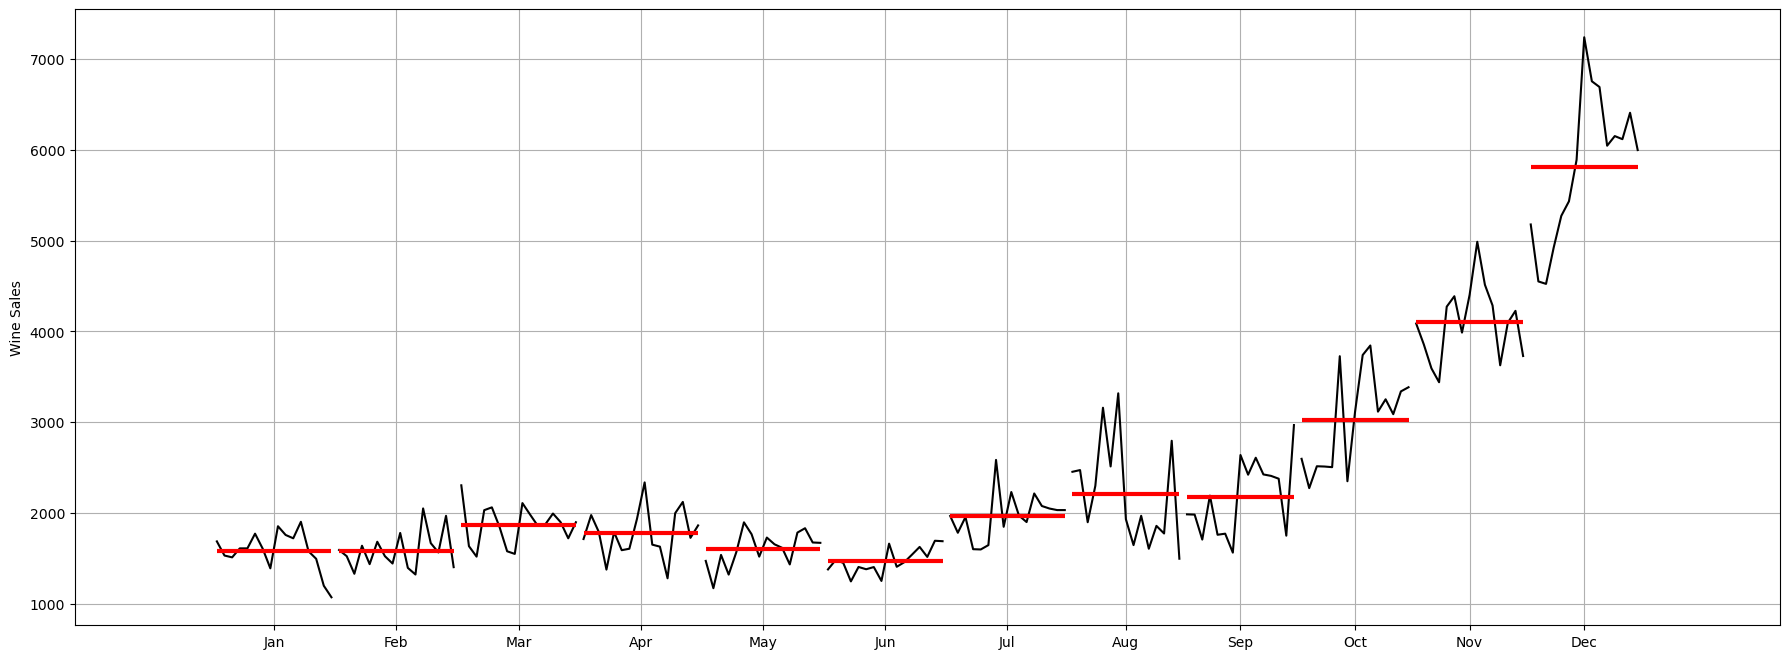

In [21]:
from statsmodels.graphics.tsaplots import month_plot

fig, ax = plt.subplots(figsize=(22,8))

month_plot(df,ylabel='Wine Sales',ax=ax)
plt.grid();

## 2. Data Pre-processing

### 2.1 Missing value treatment 

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 187 entries, 1980-01-01 to 1995-07-01
Data columns (total 1 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   Sparkling  187 non-null    int64
dtypes: int64(1)
memory usage: 2.9 KB


In [23]:
# There are no missing values

### 2.2 Visualize the processed data 

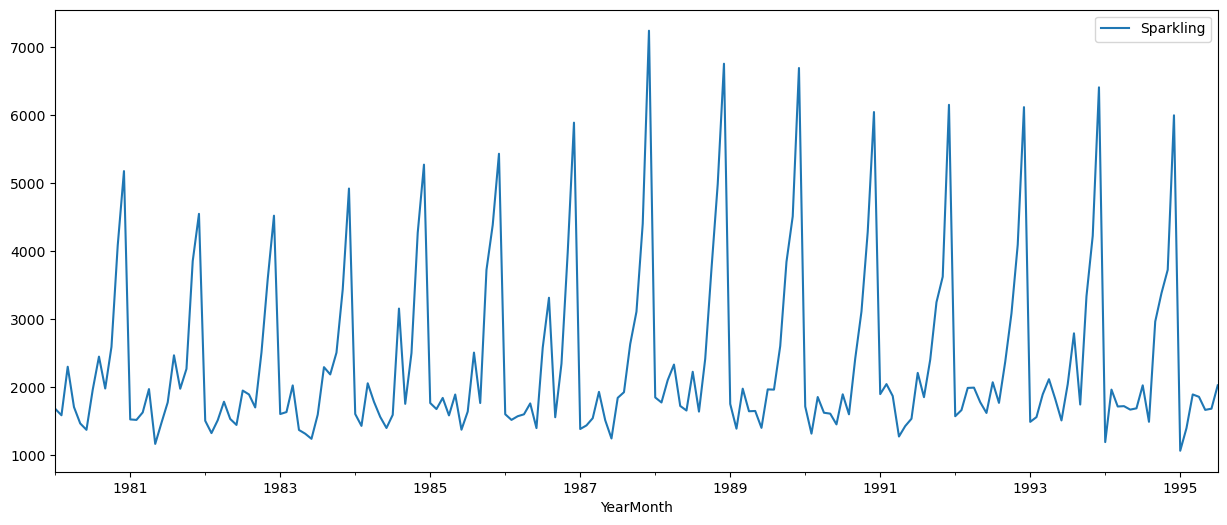

In [24]:
df.plot();

### 2.3 Train-test split

In [25]:
train    =   df[0:int(len(df)*0.7)] 
test     =   df[int(len(df)*0.7):]

In [26]:
print(train.shape)
print(test.shape)

(130, 1)
(57, 1)


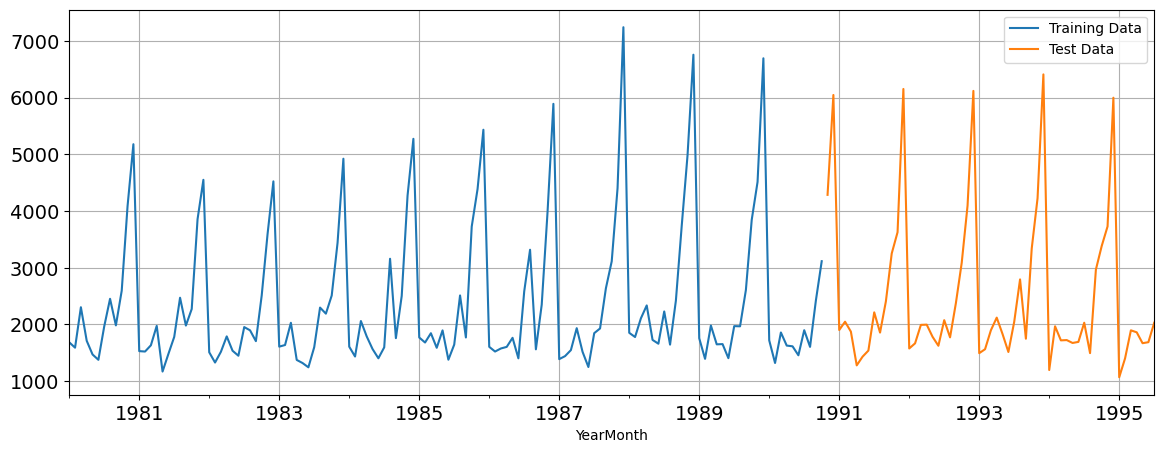

In [27]:
train['Sparkling'].plot(figsize=(14,5), fontsize=14)
test['Sparkling'].plot(figsize=(14,5), fontsize=14)
plt.grid()
plt.legend(['Training Data','Test Data'])
plt.show()

## 3. Model Building - Original Data

### 3.1 Build forecasting models 

### 3.1.1 Linear regression 

In [28]:
train_time = [i+1 for i in range(len(train))]
test_time = [i+131 for i in range(len(test))]
print('Training Time instance','\n',train_time)
print('Test Time instance','\n',test_time)

Training Time instance 
 [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130]
Test Time instance 
 [131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187]


In [29]:
LinearRegression_train = train.copy()
LinearRegression_test = test.copy()

In [30]:
LinearRegression_train['time'] = train_time
LinearRegression_test['time'] = test_time

print('First few rows of Training Data','\n',LinearRegression_train.head(),'\n')
print('Last few rows of Training Data','\n',LinearRegression_train.tail(),'\n')
print('First few rows of Test Data','\n',LinearRegression_test.head(),'\n')
print('Last few rows of Test Data','\n',LinearRegression_test.tail(),'\n')

First few rows of Training Data 
             Sparkling  time
YearMonth                  
1980-01-01       1686     1
1980-02-01       1591     2
1980-03-01       2304     3
1980-04-01       1712     4
1980-05-01       1471     5 

Last few rows of Training Data 
             Sparkling  time
YearMonth                  
1990-06-01       1457   126
1990-07-01       1899   127
1990-08-01       1605   128
1990-09-01       2424   129
1990-10-01       3116   130 

First few rows of Test Data 
             Sparkling  time
YearMonth                  
1990-11-01       4286   131
1990-12-01       6047   132
1991-01-01       1902   133
1991-02-01       2049   134
1991-03-01       1874   135 

Last few rows of Test Data 
             Sparkling  time
YearMonth                  
1995-03-01       1897   183
1995-04-01       1862   184
1995-05-01       1670   185
1995-06-01       1688   186
1995-07-01       2031   187 



In [31]:
from sklearn.linear_model import LinearRegression

In [32]:
LR = LinearRegression()
LR.fit(LinearRegression_train[['time']],LinearRegression_train['Sparkling'].values)

LinearRegression()

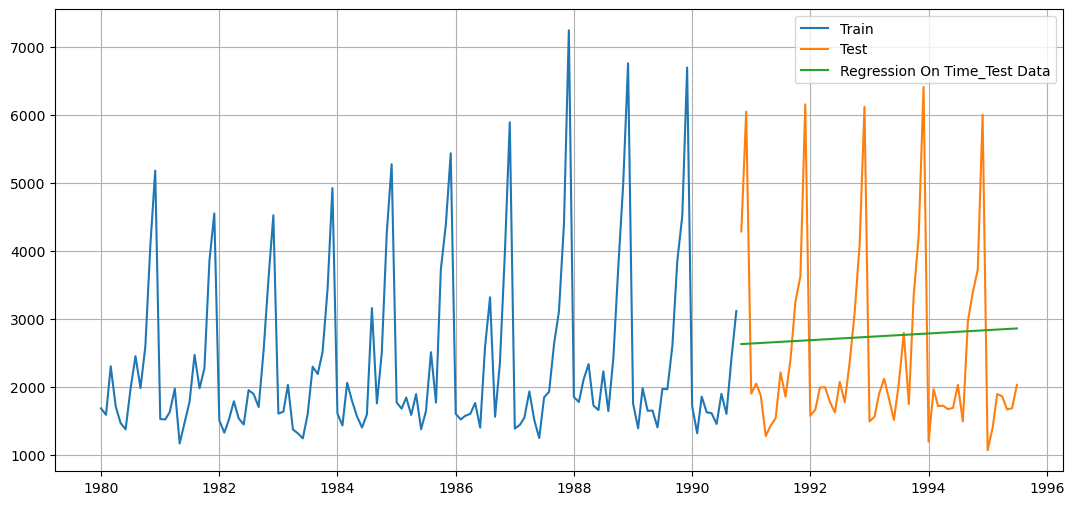

In [33]:
test_predictions_model1            = LR.predict(LinearRegression_test[['time']])
LinearRegression_test['RegOnTime'] = test_predictions_model1


plt.figure(figsize=(13,6))
plt.plot( train['Sparkling'], label='Train')
plt.plot(test['Sparkling'], label='Test')
plt.plot(LinearRegression_test['RegOnTime'], label='Regression On Time_Test Data')
plt.legend(loc='best')
plt.grid();

Defining the accuracy metrics.

In [34]:
from sklearn import metrics

Model Evaluation

In [35]:
## Test Data - RMSE

rmse_model1_test = metrics.mean_squared_error(test['Sparkling'],test_predictions_model1,squared=False)
print("For RegressionOnTime forecast on the Test Data,  RMSE is %3.2f" %(rmse_model1_test))

For RegressionOnTime forecast on the Test Data,  RMSE is 1392.44


In [36]:
resultsDf = pd.DataFrame({'Test RMSE': [rmse_model1_test]},index=['RegressionOnTime'])
resultsDf

Test RMSE
RegressionOnTime  1392.438305

### 3.3 Simple Average 

In [37]:
SimpleAverage_train = train.copy()
SimpleAverage_test = test.copy()
SimpleAverage_test['forecast'] = train['Sparkling'].mean()
SimpleAverage_test.head()

Sparkling     forecast
YearMonth                         
1990-11-01       4286  2361.276923
1990-12-01       6047  2361.276923
1991-01-01       1902  2361.276923
1991-02-01       2049  2361.276923
1991-03-01       1874  2361.276923

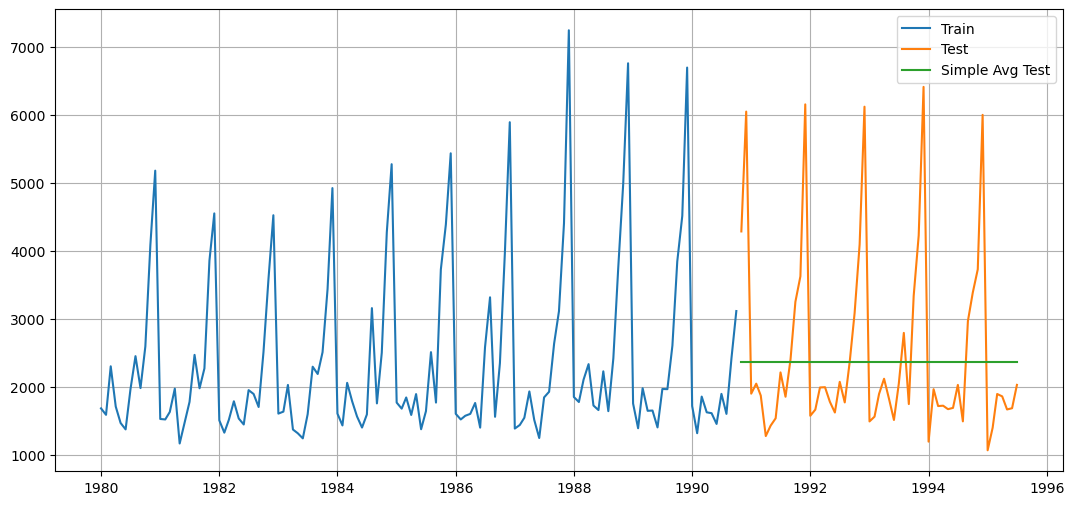

In [38]:
plt.figure(figsize=(13,6))
plt.plot( train['Sparkling'], label='Train')
plt.plot(test['Sparkling'], label='Test')
plt.plot(SimpleAverage_test['forecast'], label='Simple Avg Test')
plt.legend(loc='best')
plt.grid();

### 3.4 Moving Average 

In [39]:
MovingAverage = df.copy()
MovingAverage.head()

Sparkling
YearMonth            
1980-01-01       1686
1980-02-01       1591
1980-03-01       2304
1980-04-01       1712
1980-05-01       1471

Trailing moving averages

In [40]:
MovingAverage['Trailing_2'] = MovingAverage['Sparkling'].rolling(2).mean()
MovingAverage['Trailing_4'] = MovingAverage['Sparkling'].rolling(4).mean()
MovingAverage['Trailing_6'] = MovingAverage['Sparkling'].rolling(6).mean()
MovingAverage['Trailing_9'] = MovingAverage['Sparkling'].rolling(9).mean()

MovingAverage

Sparkling  Trailing_2  Trailing_4   Trailing_6   Trailing_9
YearMonth                                                              
1980-01-01       1686         NaN         NaN          NaN          NaN
1980-02-01       1591      1638.5         NaN          NaN          NaN
1980-03-01       2304      1947.5         NaN          NaN          NaN
1980-04-01       1712      2008.0     1823.25          NaN          NaN
1980-05-01       1471      1591.5     1769.50          NaN          NaN
...               ...         ...         ...          ...          ...
1995-03-01       1897      1649.5     2592.00  2913.666667  2664.000000
1995-04-01       1862      1879.5     1557.75  2659.833333  2645.222222
1995-05-01       1670      1766.0     1707.75  2316.666667  2664.666667
1995-06-01       1688      1679.0     1779.25  1598.166667  2522.444444
1995-07-01       2031      1859.5     1812.75  1758.333333  2372.000000

[187 rows x 5 columns]

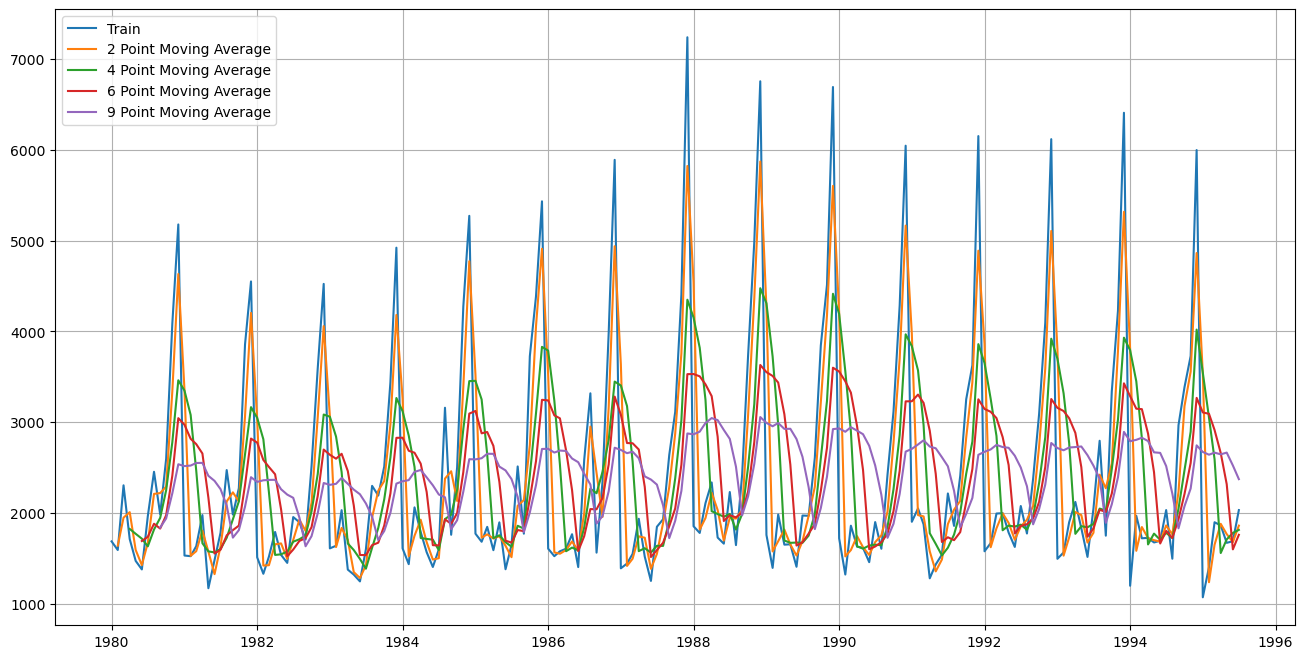

In [41]:
## Plotting on the whole data

plt.figure(figsize=(16,8))
plt.plot(MovingAverage['Sparkling'], label='Train')
plt.plot(MovingAverage['Trailing_2'], label='2 Point Moving Average')
plt.plot(MovingAverage['Trailing_4'], label='4 Point Moving Average')
plt.plot(MovingAverage['Trailing_6'],label = '6 Point Moving Average')
plt.plot(MovingAverage['Trailing_9'],label = '9 Point Moving Average')

plt.legend(loc = 'best')
plt.grid();

Let us split the data into train and test and plot this Time Series. The window of the moving average is need to be carefully selected as too big a window will result in not having any test set as the whole series might get averaged over.

In [42]:
#Creating train and test set 
trailing_MovingAverage_train=MovingAverage[0:int(len(MovingAverage)*0.7)] 
trailing_MovingAverage_test=MovingAverage[int(len(MovingAverage)*0.7):]

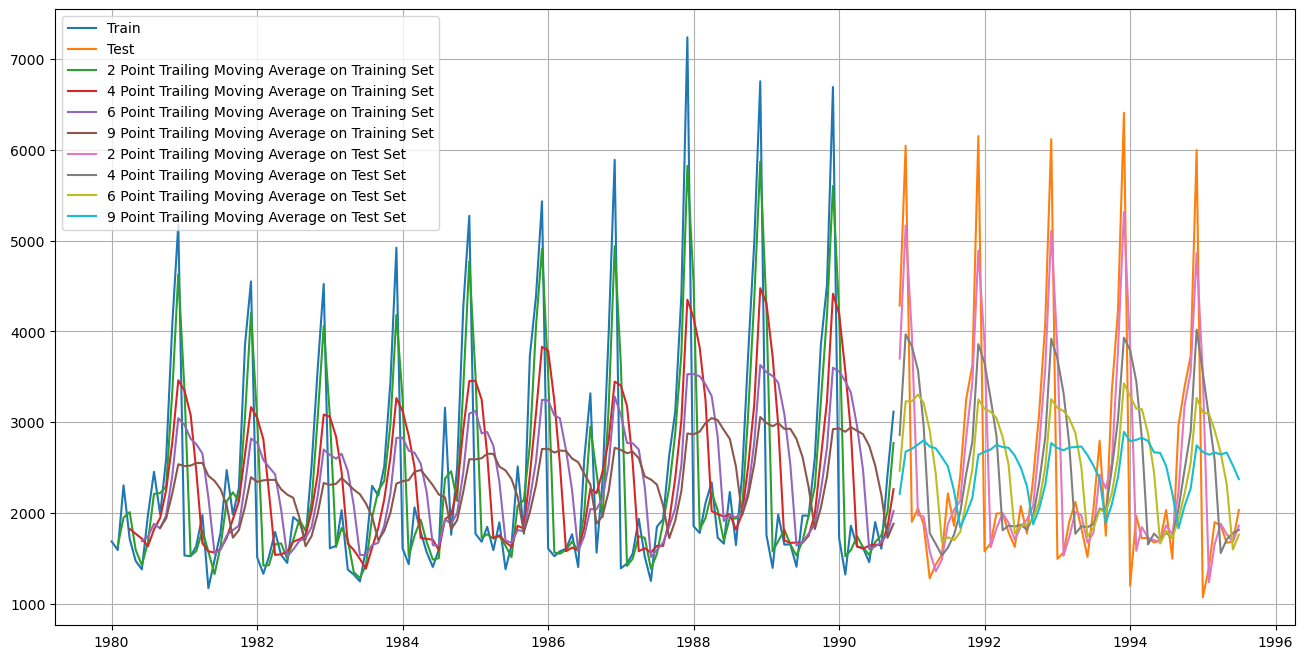

In [43]:
## Plotting on both the Training and Test data

plt.figure(figsize=(16,8))
plt.plot(trailing_MovingAverage_train['Sparkling'], label='Train')
plt.plot(trailing_MovingAverage_test['Sparkling'], label='Test')

plt.plot(trailing_MovingAverage_train['Trailing_2'], label='2 Point Trailing Moving Average on Training Set')
plt.plot(trailing_MovingAverage_train['Trailing_4'], label='4 Point Trailing Moving Average on Training Set')
plt.plot(trailing_MovingAverage_train['Trailing_6'],label = '6 Point Trailing Moving Average on Training Set')
plt.plot(trailing_MovingAverage_train['Trailing_9'],label = '9 Point Trailing Moving Average on Training Set')

plt.plot(trailing_MovingAverage_test['Trailing_2'], label='2 Point Trailing Moving Average on Test Set')
plt.plot(trailing_MovingAverage_test['Trailing_4'], label='4 Point Trailing Moving Average on Test Set')
plt.plot(trailing_MovingAverage_test['Trailing_6'],label = '6 Point Trailing Moving Average on Test Set')
plt.plot(trailing_MovingAverage_test['Trailing_9'],label = '9 Point Trailing Moving Average on Test Set')
plt.legend(loc = 'best')
plt.grid();

Model Evaluation

RMSE Calculation as below

In [44]:
## Test Data - RMSE --> 2 point Trailing MA

rmse_model4_test_2 = metrics.mean_squared_error(test['Sparkling'],trailing_MovingAverage_test['Trailing_2'],squared=False)
print("For 2 point Moving Average Model forecast on the Training Data,  RMSE is %3.3f" %(rmse_model4_test_2))

## Test Data - RMSE  --> 4 point Trailing MA

rmse_model4_test_4 = metrics.mean_squared_error(test['Sparkling'],trailing_MovingAverage_test['Trailing_4'],squared=False)
print("For 4 point Moving Average Model forecast on the Training Data,  RMSE is %3.3f" %(rmse_model4_test_4))

## Test Data - RMSE --> 6 point Trailing MA

rmse_model4_test_6 = metrics.mean_squared_error(test['Sparkling'],trailing_MovingAverage_test['Trailing_6'],squared=False)
print("For 6 point Moving Average Model forecast on the Training Data,  RMSE is %3.3f" %(rmse_model4_test_6))

## Test Data - RMSE  --> 9 point Trailing MA

rmse_model4_test_9 = metrics.mean_squared_error(test['Sparkling'],trailing_MovingAverage_test['Trailing_9'],squared=False)
print("For 9 point Moving Average Model forecast on the Training Data,  RMSE is %3.3f " %(rmse_model4_test_9))

For 2 point Moving Average Model forecast on the Training Data,  RMSE is 811.179
For 4 point Moving Average Model forecast on the Training Data,  RMSE is 1184.213
For 6 point Moving Average Model forecast on the Training Data,  RMSE is 1337.201
For 9 point Moving Average Model forecast on the Training Data,  RMSE is 1422.653 


In [45]:
resultsDf_4 = pd.DataFrame({'Test RMSE': [rmse_model4_test_2,rmse_model4_test_4
                                          ,rmse_model4_test_6,rmse_model4_test_9]}
                           ,index=['2pointTrailingMovingAverage','4pointTrailingMovingAverage'
                                   ,'6pointTrailingMovingAverage','9pointTrailingMovingAverage'])

resultsDf = pd.concat([resultsDf, resultsDf_4])
resultsDf

Test RMSE
RegressionOnTime             1392.438305
2pointTrailingMovingAverage   811.178937
4pointTrailingMovingAverage  1184.213295
6pointTrailingMovingAverage  1337.200524
9pointTrailingMovingAverage  1422.653281

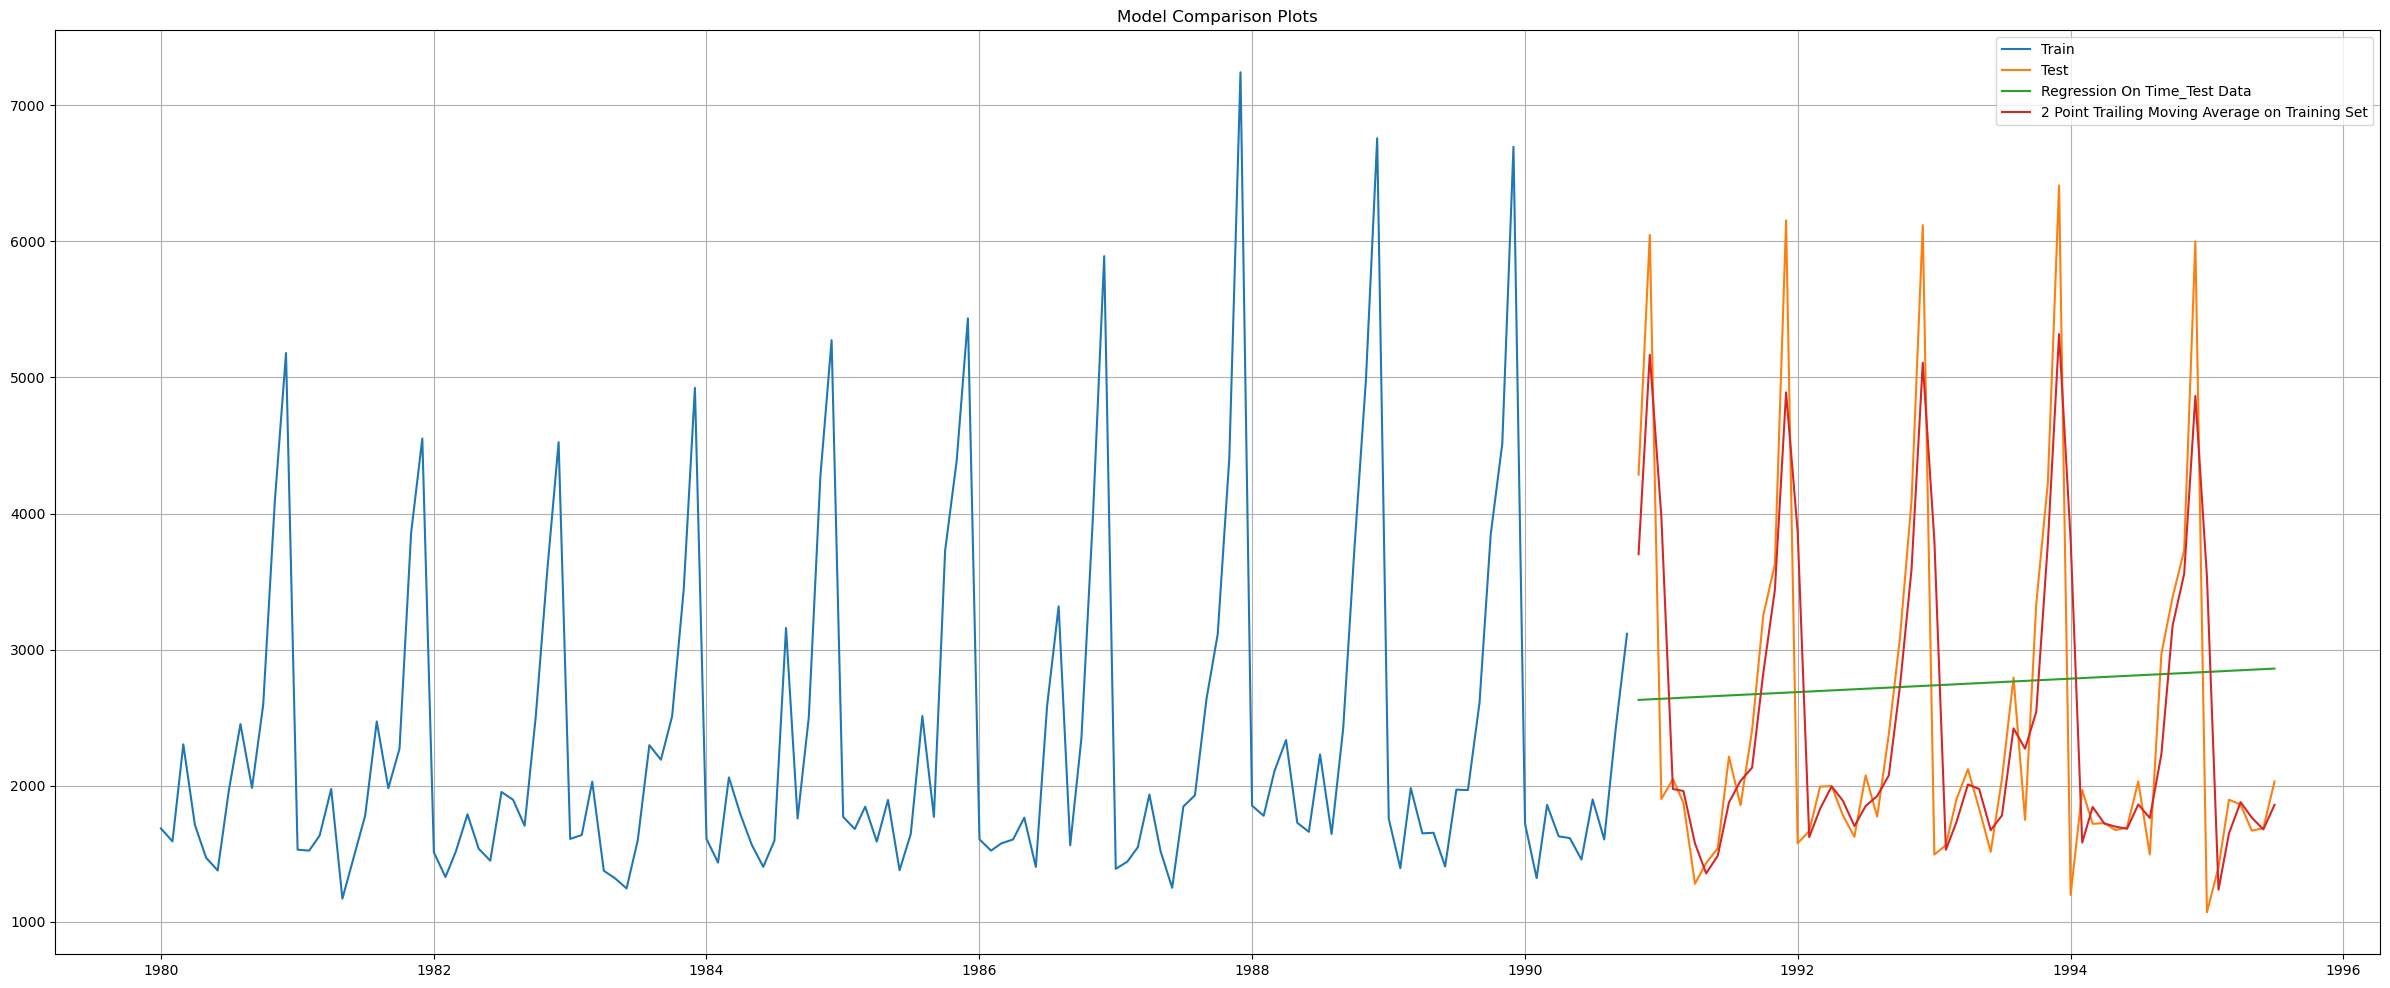

In [46]:
## Plotting on both Training and Test data

plt.figure(figsize=(30,12))
plt.plot(train['Sparkling'], label='Train')
plt.plot(test['Sparkling'], label='Test')

plt.plot(LinearRegression_test['RegOnTime'], label='Regression On Time_Test Data')


plt.plot(trailing_MovingAverage_test['Trailing_2'], label='2 Point Trailing Moving Average on Training Set')


plt.legend(loc='best')
plt.title("Model Comparison Plots")
plt.grid();

### 3.5 Exponential Models (Single, Double, Triple) 

### 3.5.1 Single Exponential Smoothing

In [47]:
from statsmodels.tsa.api import ExponentialSmoothing, SimpleExpSmoothing, Holt

In [48]:
SES_train = train.copy()
SES_test = test.copy()

In [49]:
model_SES = SimpleExpSmoothing(SES_train['Sparkling'])

/Users/srinivasant/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


In [50]:
model_SES_autofit = model_SES.fit(optimized=True)

/Users/srinivasant/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:915: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


In [51]:
model_SES_autofit.params

{'smoothing_level': 0.038003579704776386,
 'smoothing_trend': nan,
 'smoothing_seasonal': nan,
 'damping_trend': nan,
 'initial_level': 2173.2611215945826,
 'initial_trend': nan,
 'initial_seasons': array([], dtype=float64),
 'use_boxcox': False,
 'lamda': None,
 'remove_bias': False}

In [52]:
SES_test['predict'] = model_SES_autofit.forecast(steps=len(test))
SES_test.head()

Sparkling     predict
YearMonth                        
1990-11-01       4286  2468.64942
1990-12-01       6047  2468.64942
1991-01-01       1902  2468.64942
1991-02-01       2049  2468.64942
1991-03-01       1874  2468.64942

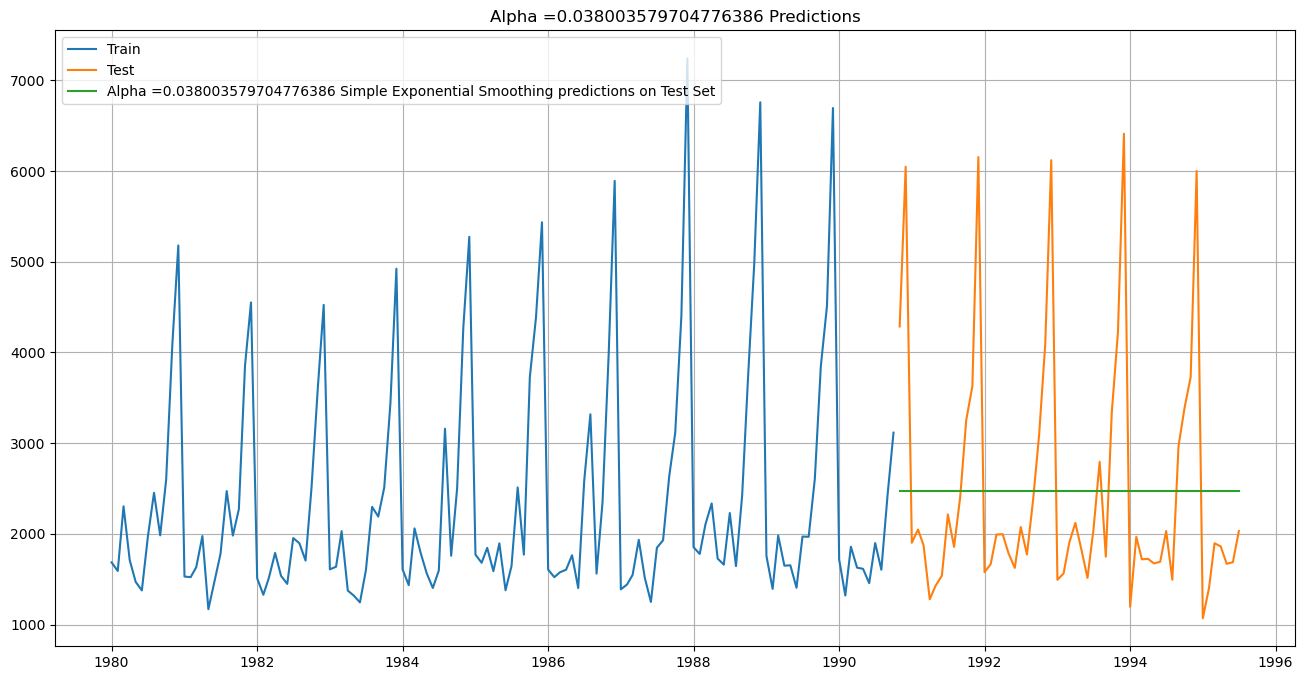

In [53]:
## Plotting on both the Training and Test data

plt.figure(figsize=(16,8))
plt.plot(SES_train['Sparkling'], label='Train')
plt.plot(SES_test['Sparkling'], label='Test')

plt.plot(SES_test['predict'], label='Alpha =0.038003579704776386 Simple Exponential Smoothing predictions on Test Set')

plt.legend(loc='best')
plt.grid()
plt.title('Alpha =0.038003579704776386 Predictions');

Model Evaluation for  𝛼  = 0.038003579704776386 : Simple Exponential Smoothing

In [54]:
## Test Data

rmse_model5_test_1 = metrics.mean_squared_error(SES_test['Sparkling'],SES_test['predict'],squared=False)
print("For Alpha =0.038003579704776386 Simple Exponential Smoothing Model forecast on the Test Data, RMSE is %3.3f" %(rmse_model5_test_1))


For Alpha =0.038003579704776386 Simple Exponential Smoothing Model forecast on the Test Data, RMSE is 1362.356


In [55]:
resultsDf_5 = pd.DataFrame({'Test RMSE': [rmse_model5_test_1]},index=['Alpha=0.038003579704776386,SimpleExponentialSmoothing'])

resultsDf = pd.concat([resultsDf, resultsDf_5])
resultsDf

Test RMSE
RegressionOnTime                                    1392.438305
2pointTrailingMovingAverage                          811.178937
4pointTrailingMovingAverage                         1184.213295
6pointTrailingMovingAverage                         1337.200524
9pointTrailingMovingAverage                         1422.653281
Alpha=0.038003579704776386,SimpleExponentialSmo...  1362.355525

Setting different alpha values.
Remember, the higher the alpha value more weightage is given to the more recent observation. That means, what happened recently will happen again.
We will run a loop with different alpha values to understand which particular value works best for alpha on the test set.

In [56]:
## First we will define an empty dataframe to store our values from the loop

resultsDf_6 = pd.DataFrame({'Alpha Values':[],'Train RMSE':[],'Test RMSE': []})
resultsDf_6

Empty DataFrame
Columns: [Alpha Values, Train RMSE, Test RMSE]
Index: []

In [57]:
for i in np.arange(0.1,1,0.1):
    model_SES_alpha_i = model_SES.fit(smoothing_level=i,optimized=False,use_brute=True)
    SES_train['predict',i] = model_SES_alpha_i.fittedvalues
    SES_test['predict',i] = model_SES_alpha_i.forecast(steps=len(test))
    
    rmse_model5_train_i = metrics.mean_squared_error(SES_train['Sparkling'],SES_train['predict',i],squared=False)
    
    rmse_model5_test_i = metrics.mean_squared_error(SES_test['Sparkling'],SES_test['predict',i],squared=False)
    
    resultsDf_6 = resultsDf_6.append({'Alpha Values':i,'Train RMSE':rmse_model5_train_i 
                                      ,'Test RMSE':rmse_model5_test_i}, ignore_index=True)

/var/folders/v3/w2fxtj257m992bzz44lcb4p00000gn/T/ipykernel_21988/261072743.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  resultsDf_6 = resultsDf_6.append({'Alpha Values':i,'Train RMSE':rmse_model5_train_i
/var/folders/v3/w2fxtj257m992bzz44lcb4p00000gn/T/ipykernel_21988/261072743.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  resultsDf_6 = resultsDf_6.append({'Alpha Values':i,'Train RMSE':rmse_model5_train_i
/var/folders/v3/w2fxtj257m992bzz44lcb4p00000gn/T/ipykernel_21988/261072743.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  resultsDf_6 = resultsDf_6.append({'Alpha Values':i,'Train RMSE':rmse_model5_train_i
/var/folders/v3/w2fxtj257m992bzz44lcb4p00000gn/T/ipykernel_21988/261072743.py:10: FutureWarning: 

Model Evaluation

In [58]:
resultsDf_6.sort_values(by=['Test RMSE'],ascending=True)

Alpha Values   Train RMSE    Test RMSE
3           0.4  1329.814823  1363.037803
4           0.5  1326.403864  1364.863549
0           0.1  1298.211536  1367.395642
2           0.3  1331.102204  1372.323705
1           0.2  1322.658289  1378.320562
5           0.6  1325.588422  1379.988733
6           0.7  1329.257530  1404.659104
7           0.8  1337.879425  1434.578214
8           0.9  1351.645478  1466.179706

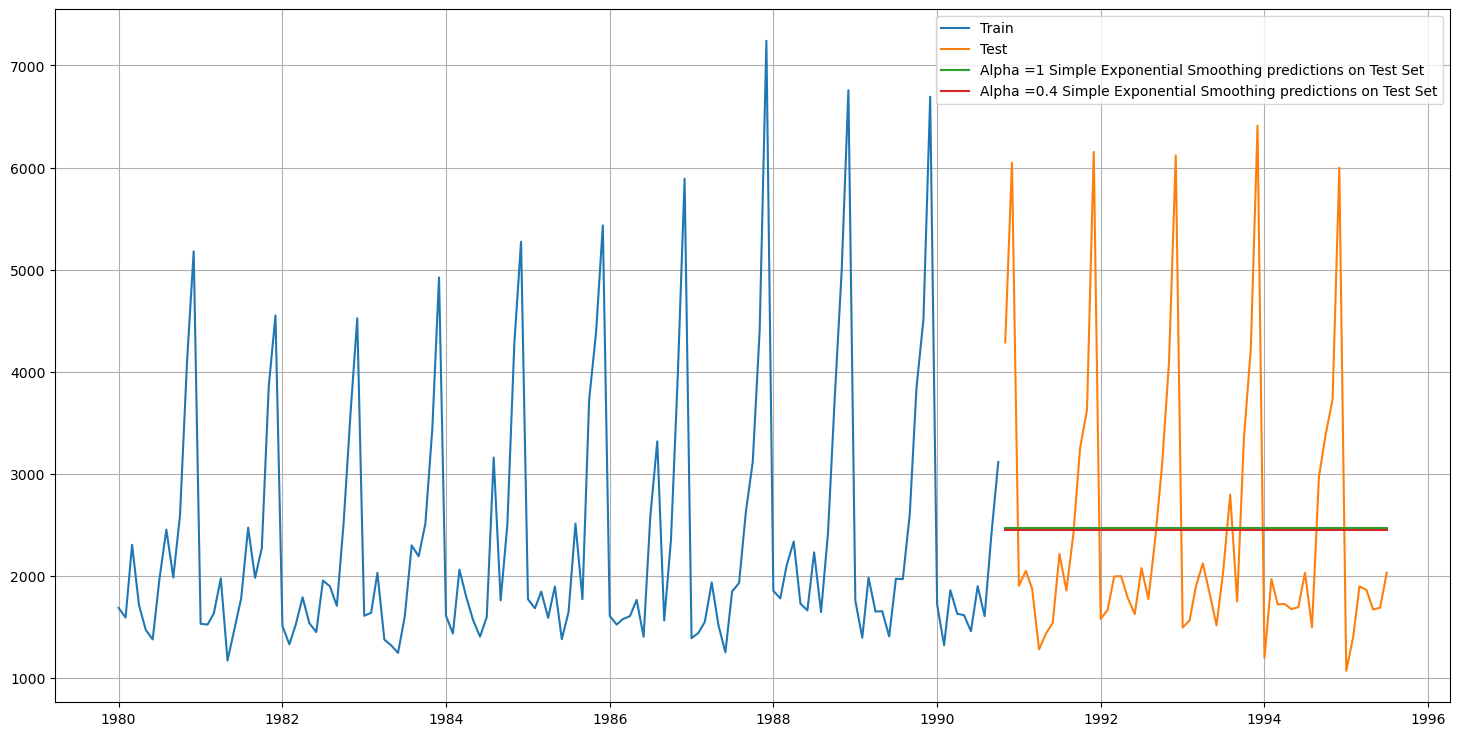

In [59]:
## Plotting on both the Training and Test data

plt.figure(figsize=(18,9))
plt.plot(SES_train['Sparkling'], label='Train')
plt.plot(SES_test['Sparkling'], label='Test')

plt.plot(SES_test['predict'], label='Alpha =1 Simple Exponential Smoothing predictions on Test Set')

plt.plot(SES_test['predict', 0.4], label='Alpha =0.4 Simple Exponential Smoothing predictions on Test Set')



plt.legend(loc='best')
plt.grid();

In [60]:
resultsDf_6_1 = pd.DataFrame({'Test RMSE': [resultsDf_6.sort_values(by=['Test RMSE'],ascending=True).values[0][2]]}
                           ,index=['Alpha=0.4,SimpleExponentialSmoothing'])

resultsDf = pd.concat([resultsDf, resultsDf_6_1])
resultsDf

Test RMSE
RegressionOnTime                                    1392.438305
2pointTrailingMovingAverage                          811.178937
4pointTrailingMovingAverage                         1184.213295
6pointTrailingMovingAverage                         1337.200524
9pointTrailingMovingAverage                         1422.653281
Alpha=0.038003579704776386,SimpleExponentialSmo...  1362.355525
Alpha=0.4,SimpleExponentialSmoothing                1363.037803

### 3.5.2 Double Exponential Smoothing

Two parameters  𝛼  and  𝛽  are estimated in this model. Level and Trend are accounted for in this model.

In [61]:
DES_train = train.copy()
DES_test = test.copy()

In [62]:
model_DES = Holt(DES_train['Sparkling'])

/Users/srinivasant/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


In [63]:
## First we will define an empty dataframe to store our values from the loop

resultsDf_7 = pd.DataFrame({'Alpha Values':[],'Beta Values':[],'Train RMSE':[],'Test RMSE': []})
resultsDf_7

Empty DataFrame
Columns: [Alpha Values, Beta Values, Train RMSE, Test RMSE]
Index: []

In [64]:
for i in np.arange(0.3,1.1,0.1):
    for j in np.arange(0.3,1.1,0.1):
        model_DES_alpha_i_j = model_DES.fit(smoothing_level=i,smoothing_trend=j,optimized=False,use_brute=True)
        DES_train['predict',i,j] = model_DES_alpha_i_j.fittedvalues
        DES_test['predict',i,j] = model_DES_alpha_i_j.forecast(steps=len(test))
        
        rmse_model6_train = metrics.mean_squared_error(DES_train['Sparkling'],DES_train['predict',i,j],squared=False)
        
        rmse_model6_test = metrics.mean_squared_error(DES_test['Sparkling'],DES_test['predict',i,j],squared=False)
        
        resultsDf_7 = resultsDf_7.append({'Alpha Values':i,'Beta Values':j,'Train RMSE':rmse_model6_train
                                          ,'Test RMSE':rmse_model6_test}, ignore_index=True)

/var/folders/v3/w2fxtj257m992bzz44lcb4p00000gn/T/ipykernel_21988/2996784636.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  resultsDf_7 = resultsDf_7.append({'Alpha Values':i,'Beta Values':j,'Train RMSE':rmse_model6_train
/var/folders/v3/w2fxtj257m992bzz44lcb4p00000gn/T/ipykernel_21988/2996784636.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  resultsDf_7 = resultsDf_7.append({'Alpha Values':i,'Beta Values':j,'Train RMSE':rmse_model6_train
/var/folders/v3/w2fxtj257m992bzz44lcb4p00000gn/T/ipykernel_21988/2996784636.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  resultsDf_7 = resultsDf_7.append({'Alpha Values':i,'Beta Values':j,'Train RMSE':rmse_model6_train
/var/folders/v3/w2fxtj257m992bzz44lcb4p00000gn/T/ipy

In [65]:
resultsDf_7

Alpha Values  Beta Values   Train RMSE     Test RMSE
0            0.3          0.3  1567.524066   1597.853999
1            0.3          0.4  1662.549225   4023.672164
2            0.3          0.5  1758.543876   8879.172380
3            0.3          0.6  1843.560670  15645.080035
4            0.3          0.7  1902.735965  23205.442323
..           ...          ...          ...           ...
59           1.0          0.6  1764.658812  20558.025827
60           1.0          0.7  1837.425218  22155.074151
61           1.0          0.8  1915.148280  23241.839479
62           1.0          0.9  1999.362743  23787.747852
63           1.0          1.0  2092.531564  23712.944127

[64 rows x 4 columns]

In [66]:
resultsDf_7.sort_values(by=['Test RMSE']).head()

Alpha Values  Beta Values   Train RMSE    Test RMSE
0            0.3          0.3  1567.524066  1597.853999
1            0.3          0.4  1662.549225  4023.672164
8            0.4          0.3  1556.795694  5049.478887
16           0.5          0.3  1525.615506  7817.569799
2            0.3          0.5  1758.543876  8879.172380

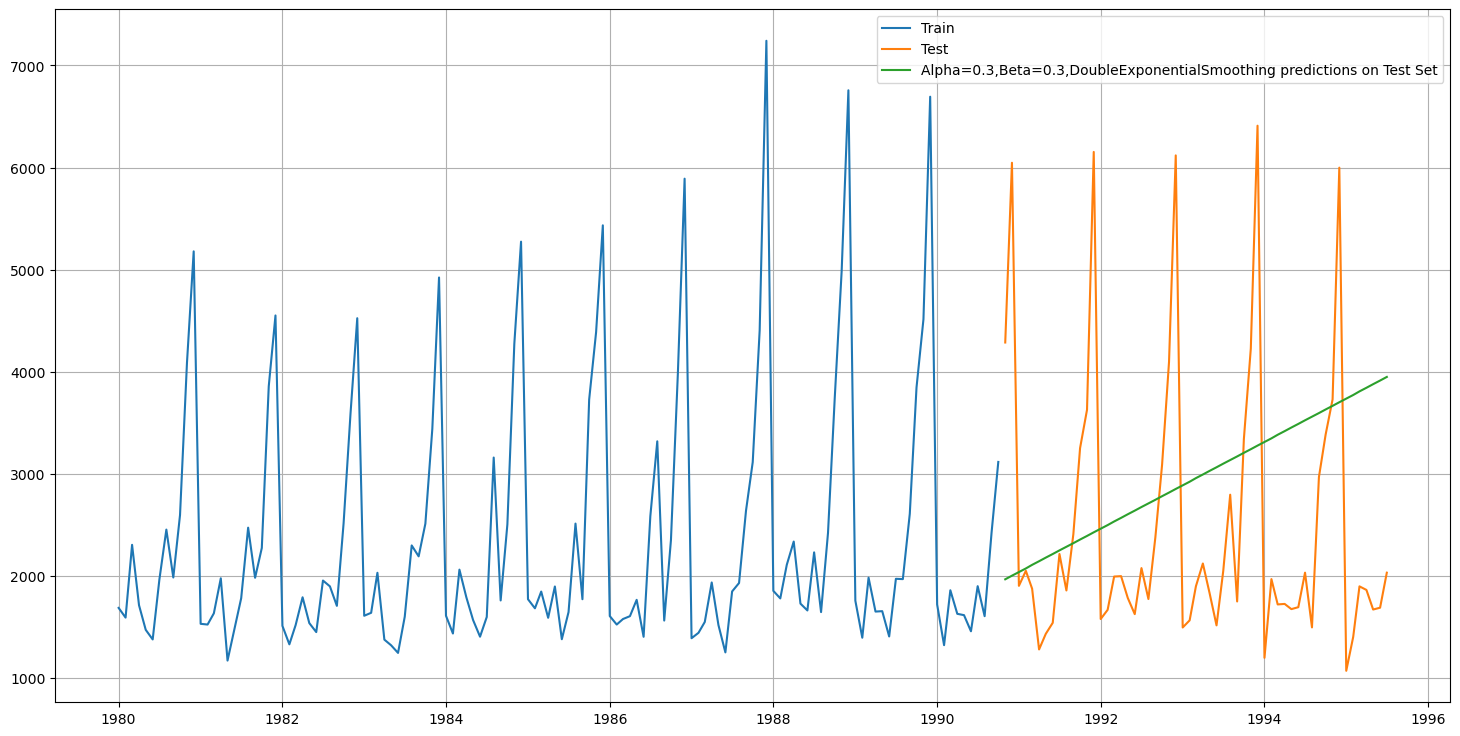

In [67]:
## Plotting on both the Training and Test data

plt.figure(figsize=(18,9))
plt.plot(DES_train['Sparkling'], label='Train')
plt.plot(DES_test['Sparkling'], label='Test')

plt.plot(DES_test['predict', 0.3, 0.3], label='Alpha=0.3,Beta=0.3,DoubleExponentialSmoothing predictions on Test Set')


plt.legend(loc='best')
plt.grid();

In [68]:
resultsDf_7_1 = pd.DataFrame({'Test RMSE': [resultsDf_7.sort_values(by=['Test RMSE']).values[0][3]]}
                           ,index=['Alpha=0.3,Beta=0.3,DoubleExponentialSmoothing'])

resultsDf = pd.concat([resultsDf, resultsDf_7_1])
resultsDf

Test RMSE
RegressionOnTime                                    1392.438305
2pointTrailingMovingAverage                          811.178937
4pointTrailingMovingAverage                         1184.213295
6pointTrailingMovingAverage                         1337.200524
9pointTrailingMovingAverage                         1422.653281
Alpha=0.038003579704776386,SimpleExponentialSmo...  1362.355525
Alpha=0.4,SimpleExponentialSmoothing                1363.037803
Alpha=0.3,Beta=0.3,DoubleExponentialSmoothing       1597.853999

### 3.5.3 Triple Exponential Smoothing

Three parameters  𝛼 ,  𝛽  and  𝛾  are estimated in this model. Level, Trend and Seasonality are accounted for in this model.

In [69]:
TES_train = train.copy()
TES_test = test.copy()

In [70]:
model_TES = ExponentialSmoothing(TES_train['Sparkling'],trend='additive',seasonal='multiplicative')

/Users/srinivasant/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


In [71]:
model_TES_autofit = model_TES.fit()

In [72]:
model_TES_autofit.params

{'smoothing_level': 0.07571445210103464,
 'smoothing_trend': 0.06489808813237438,
 'smoothing_seasonal': 0.3765608370780376,
 'damping_trend': nan,
 'initial_level': 2356.54174944041,
 'initial_trend': -9.180926180482402,
 'initial_seasons': array([0.71186629, 0.67768289, 0.89647955, 0.79722705, 0.64099767,
        0.64026213, 0.86701095, 1.11336214, 0.89797444, 1.18549449,
        1.8343214 , 2.32723166]),
 'use_boxcox': False,
 'lamda': None,
 'remove_bias': False}

In [73]:
## Prediction on the test data

TES_test['auto_predict'] = model_TES_autofit.forecast(steps=len(test))
TES_test.head()

Sparkling  auto_predict
YearMonth                          
1990-11-01       4286   4327.609727
1990-12-01       6047   6208.854280
1991-01-01       1902   1621.601290
1991-02-01       2049   1379.862158
1991-03-01       1874   1791.912018

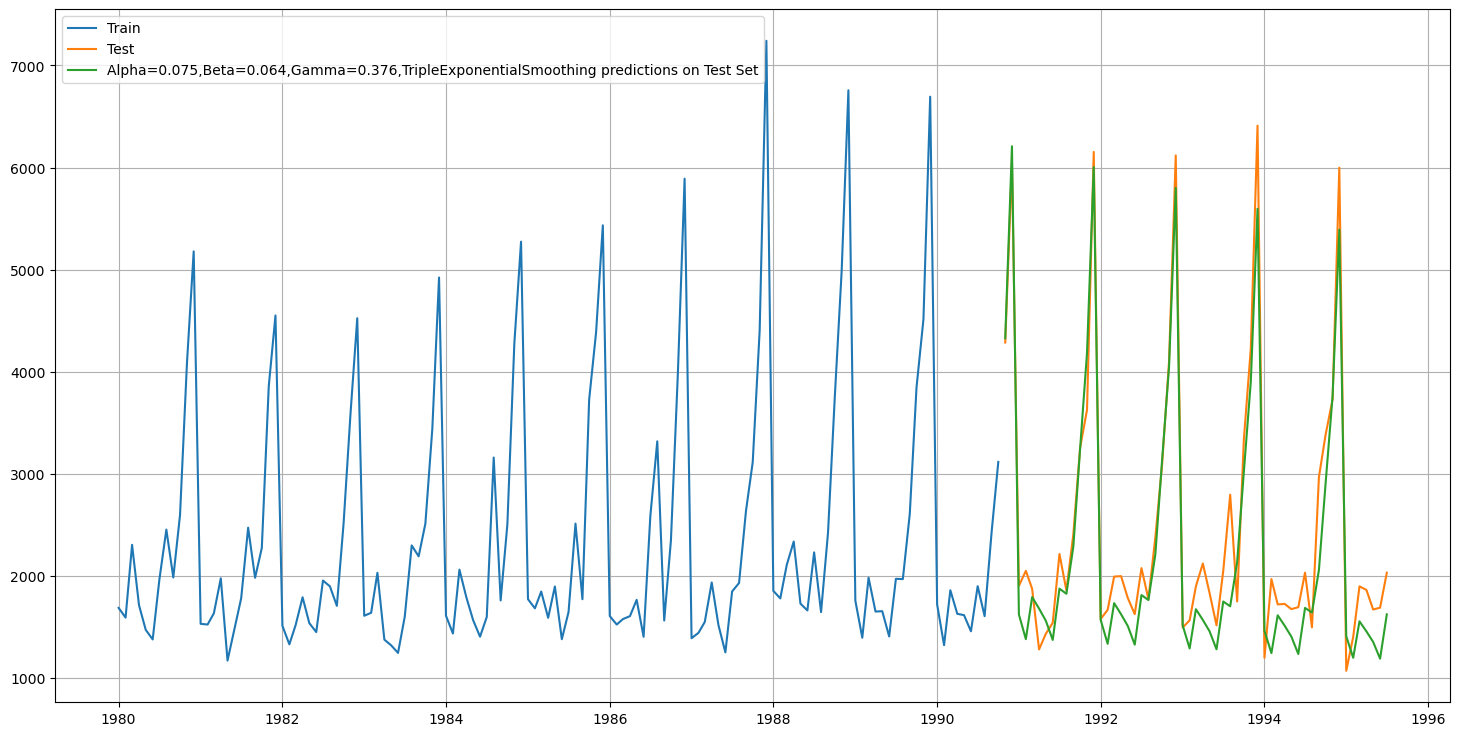

In [74]:
## Plotting on both the Training and Test using autofit

plt.figure(figsize=(18,9))
plt.plot(TES_train['Sparkling'], label='Train')
plt.plot(TES_test['Sparkling'], label='Test')

plt.plot(TES_test['auto_predict'], label='Alpha=0.075,Beta=0.064,Gamma=0.376,TripleExponentialSmoothing predictions on Test Set')


plt.legend(loc='best')
plt.grid();

In [75]:
## Test Data

rmse_model6_test_1 = metrics.mean_squared_error(TES_test['Sparkling'],TES_test['auto_predict'],squared=False)
print("For Alpha=0.075,Beta=0.064,Gamma=0.376, Triple Exponential Smoothing Model forecast on the Test Data,  RMSE is %3.3f" %(rmse_model6_test_1))

For Alpha=0.075,Beta=0.064,Gamma=0.376, Triple Exponential Smoothing Model forecast on the Test Data,  RMSE is 381.657


In [76]:
resultsDf_8_1 = pd.DataFrame({'Test RMSE': [rmse_model6_test_1]}
                           ,index=['Alpha=0.075,Beta=0.064,Gamma=0.376,TripleExponentialSmoothing'])

resultsDf = pd.concat([resultsDf, resultsDf_8_1])
resultsDf

Test RMSE
RegressionOnTime                                    1392.438305
2pointTrailingMovingAverage                          811.178937
4pointTrailingMovingAverage                         1184.213295
6pointTrailingMovingAverage                         1337.200524
9pointTrailingMovingAverage                         1422.653281
Alpha=0.038003579704776386,SimpleExponentialSmo...  1362.355525
Alpha=0.4,SimpleExponentialSmoothing                1363.037803
Alpha=0.3,Beta=0.3,DoubleExponentialSmoothing       1597.853999
Alpha=0.075,Beta=0.064,Gamma=0.376,TripleExpone...   381.657232

In [77]:
## First we will define an empty dataframe to store our values from the loop

resultsDf_8_2 = pd.DataFrame({'Alpha Values':[],'Beta Values':[],'Gamma Values':[],'Train RMSE':[],'Test RMSE': []})
resultsDf_8_2

Empty DataFrame
Columns: [Alpha Values, Beta Values, Gamma Values, Train RMSE, Test RMSE]
Index: []

In [78]:
for i in np.arange(0.1,1.1,0.1):
    for j in np.arange(0.1,1.1,0.1):
        for k in np.arange(0.1,1.1,0.1):
            model_TES_alpha_i_j_k = model_TES.fit(smoothing_level=i,smoothing_trend=j,smoothing_seasonal=k,optimized=False,use_brute=True)
            TES_train['predict',i,j,k] = model_TES_alpha_i_j_k.fittedvalues
            TES_test['predict',i,j,k] = model_TES_alpha_i_j_k.forecast(steps=len(test))
        
            rmse_model8_train = metrics.mean_squared_error(TES_train['Sparkling'],TES_train['predict',i,j,k],squared=False)
            
            rmse_model8_test = metrics.mean_squared_error(TES_test['Sparkling'],TES_test['predict',i,j,k],squared=False)
            
            resultsDf_8_2 = resultsDf_8_2.append({'Alpha Values':i,'Beta Values':j,'Gamma Values':k,
                                                  'Train RMSE':rmse_model8_train,'Test RMSE':rmse_model8_test}
                                                 , ignore_index=True)

/var/folders/v3/w2fxtj257m992bzz44lcb4p00000gn/T/ipykernel_21988/1001274070.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  resultsDf_8_2 = resultsDf_8_2.append({'Alpha Values':i,'Beta Values':j,'Gamma Values':k,
/var/folders/v3/w2fxtj257m992bzz44lcb4p00000gn/T/ipykernel_21988/1001274070.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  resultsDf_8_2 = resultsDf_8_2.append({'Alpha Values':i,'Beta Values':j,'Gamma Values':k,
/var/folders/v3/w2fxtj257m992bzz44lcb4p00000gn/T/ipykernel_21988/1001274070.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  resultsDf_8_2 = resultsDf_8_2.append({'Alpha Values':i,'Beta Values':j,'Gamma Values':k,
/var/folders/v3/w2fxtj257m992bzz44lcb4p00000gn/T/ipykernel_21988/1001274070.py:

In [79]:
resultsDf_8_2

Alpha Values  Beta Values  Gamma Values    Train RMSE     Test RMSE
0             0.1          0.1           0.1  3.809925e+02  7.185399e+02
1             0.1          0.1           0.2  3.693765e+02  6.996973e+02
2             0.1          0.1           0.3  3.638351e+02  6.799473e+02
3             0.1          0.1           0.4  3.633589e+02  6.571580e+02
4             0.1          0.1           0.5  3.671489e+02  6.335335e+02
..            ...          ...           ...           ...           ...
995           1.0          1.0           0.6  1.897409e+05  5.807913e+03
996           1.0          1.0           0.7  2.680381e+05  3.585079e+05
997           1.0          1.0           0.8  1.110365e+06  2.855947e+06
998           1.0          1.0           0.9  7.751842e+04  7.857850e+04
999           1.0          1.0           1.0  2.466982e+04  1.354272e+05

[1000 rows x 5 columns]

In [80]:
resultsDf_8_2.sort_values(by=['Test RMSE']).head()

Alpha Values  Beta Values  Gamma Values  Train RMSE   Test RMSE
801           0.9          0.1           0.2  463.624419  342.322388
500           0.6          0.1           0.1  410.031940  345.280719
611           0.7          0.2           0.2  443.170290  356.766667
901           1.0          0.1           0.2  487.030825  380.676161
128           0.2          0.3           0.9  481.094409  385.715679

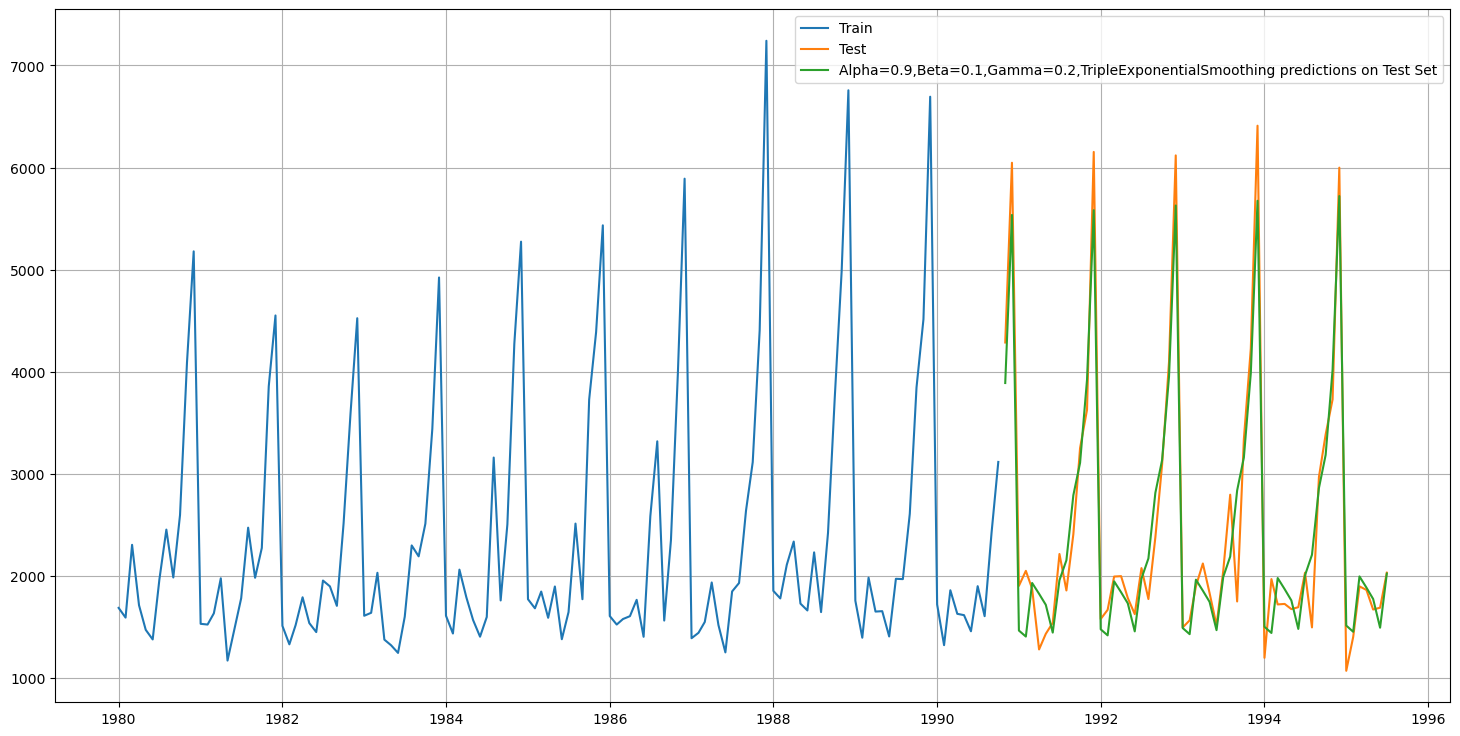

In [81]:
## Plotting on both the Training and Test data using brute force alpha, beta and gamma determination

plt.figure(figsize=(18,9))
plt.plot(TES_train['Sparkling'], label='Train')
plt.plot(TES_test['Sparkling'], label='Test')

#The value of alpha and beta is taken like that by python
plt.plot(TES_test['predict', 0.9, 0.1, 0.2], label='Alpha=0.9,Beta=0.1,Gamma=0.2,TripleExponentialSmoothing predictions on Test Set')


plt.legend(loc='best')
plt.grid();

In [82]:
resultsDf_8_3 = pd.DataFrame({'Test RMSE': [resultsDf_8_2.sort_values(by=['Test RMSE']).values[0][4]]}
                           ,index=['Alpha=0.9,Beta=0.1,Gamma=0.2,TripleExponentialSmoothing'])

resultsDf = pd.concat([resultsDf, resultsDf_8_3])
Model11 = resultsDf

Model11

Test RMSE
RegressionOnTime                                    1392.438305
2pointTrailingMovingAverage                          811.178937
4pointTrailingMovingAverage                         1184.213295
6pointTrailingMovingAverage                         1337.200524
9pointTrailingMovingAverage                         1422.653281
Alpha=0.038003579704776386,SimpleExponentialSmo...  1362.355525
Alpha=0.4,SimpleExponentialSmoothing                1363.037803
Alpha=0.3,Beta=0.3,DoubleExponentialSmoothing       1597.853999
Alpha=0.075,Beta=0.064,Gamma=0.376,TripleExpone...   381.657232
Alpha=0.9,Beta=0.1,Gamma=0.2,TripleExponentialS...   342.322388

In [83]:
print('Sorted by RMSE values on the Test Data:','\n',)
Model11.sort_values(by=['Test RMSE'])

Sorted by RMSE values on the Test Data: 



Test RMSE
Alpha=0.9,Beta=0.1,Gamma=0.2,TripleExponentialS...   342.322388
Alpha=0.075,Beta=0.064,Gamma=0.376,TripleExpone...   381.657232
2pointTrailingMovingAverage                          811.178937
4pointTrailingMovingAverage                         1184.213295
6pointTrailingMovingAverage                         1337.200524
Alpha=0.038003579704776386,SimpleExponentialSmo...  1362.355525
Alpha=0.4,SimpleExponentialSmoothing                1363.037803
RegressionOnTime                                    1392.438305
9pointTrailingMovingAverage                         1422.653281
Alpha=0.3,Beta=0.3,DoubleExponentialSmoothing       1597.853999

For this data, we had both trend and seasonality so by definition Triple Exponential Smoothing is supposed to work better than the Simple Exponential Smoothing as well as the Double Exponential Smoothing. However, since this was a model building exercise we had gone on to build different models on the data and have compared these model with the best RMSE value on the test data.

We see that the best model is the Triple Exponential Smoothing with multiplicative seasonality with the parameters  𝛼  = 0.9,  𝛽  = 0.1 and  𝛾  = 0.2

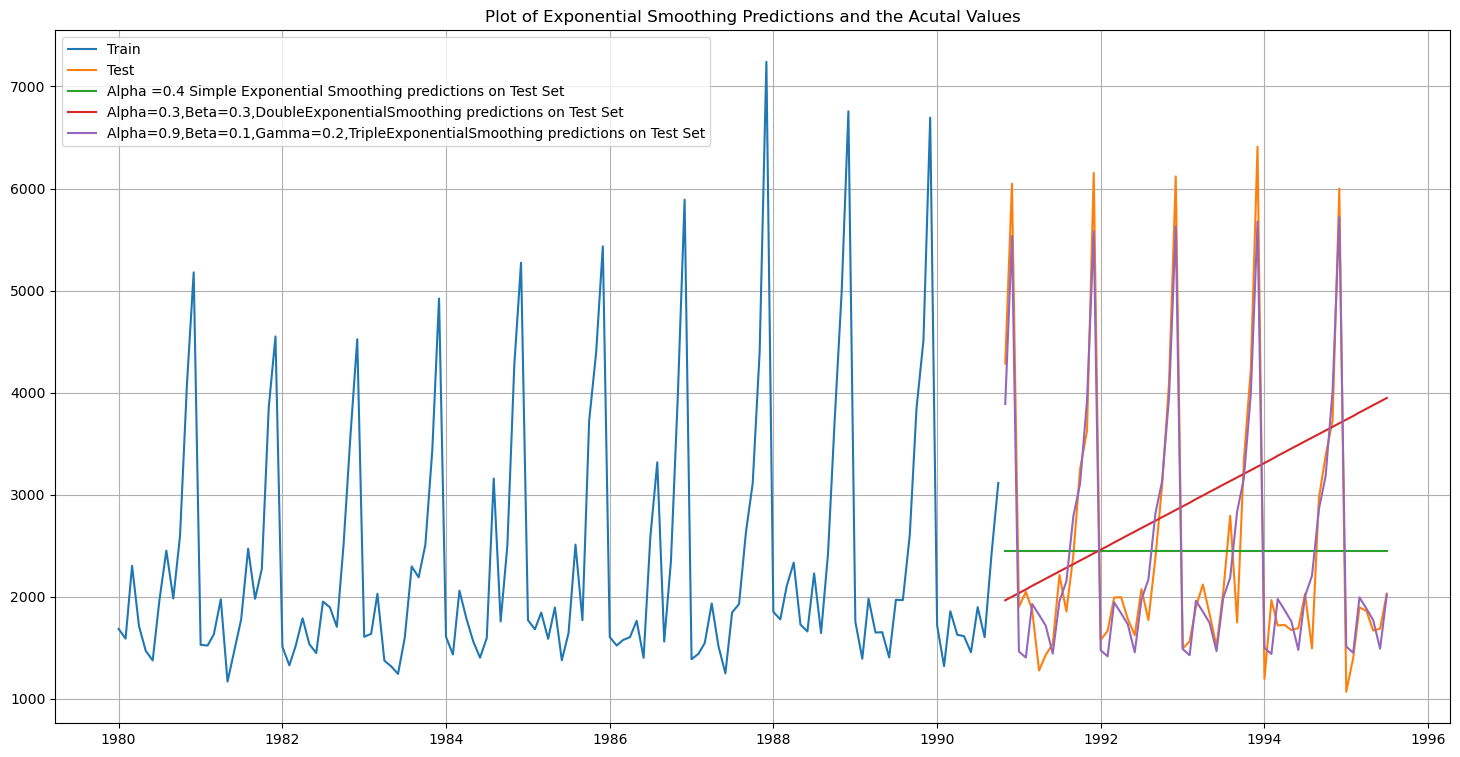

In [84]:
## Plotting on both the Training and Test data

plt.figure(figsize=(18,9))
plt.plot(train['Sparkling'], label='Train')
plt.plot(test['Sparkling'], label='Test')

plt.plot(SES_test['predict', 0.4], label='Alpha =0.4 Simple Exponential Smoothing predictions on Test Set')

plt.plot(DES_test['predict', 0.3, 0.3], label='Alpha=0.3,Beta=0.3,DoubleExponentialSmoothing predictions on Test Set')

plt.plot(TES_test['predict', 0.9, 0.1, 0.2], label='Alpha=0.9,Beta=0.1,Gamma=0.2,TripleExponentialSmoothing predictions on Test Set')

plt.legend(loc='best')
plt.grid();
plt.title('Plot of Exponential Smoothing Predictions and the Acutal Values');

Full Model

In [85]:
fullmodel2 = ExponentialSmoothing(df,
                                  trend='additive',
                                  seasonal='multiplicative').fit(smoothing_level=0.9,
                                                                 smoothing_trend=0.1,
                                                                 smoothing_seasonal=0.2)

/Users/srinivasant/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


In [86]:
RMSE_fullmodel2 = metrics.mean_squared_error(df['Sparkling'],fullmodel2.fittedvalues,squared=False)

print('RMSE:',RMSE_fullmodel2)

RMSE: 479.94081046088826


In [87]:
# Getting the predictions for the same number of times stamps that are present in the test data
prediction_2 = fullmodel2.forecast(steps=len(test))

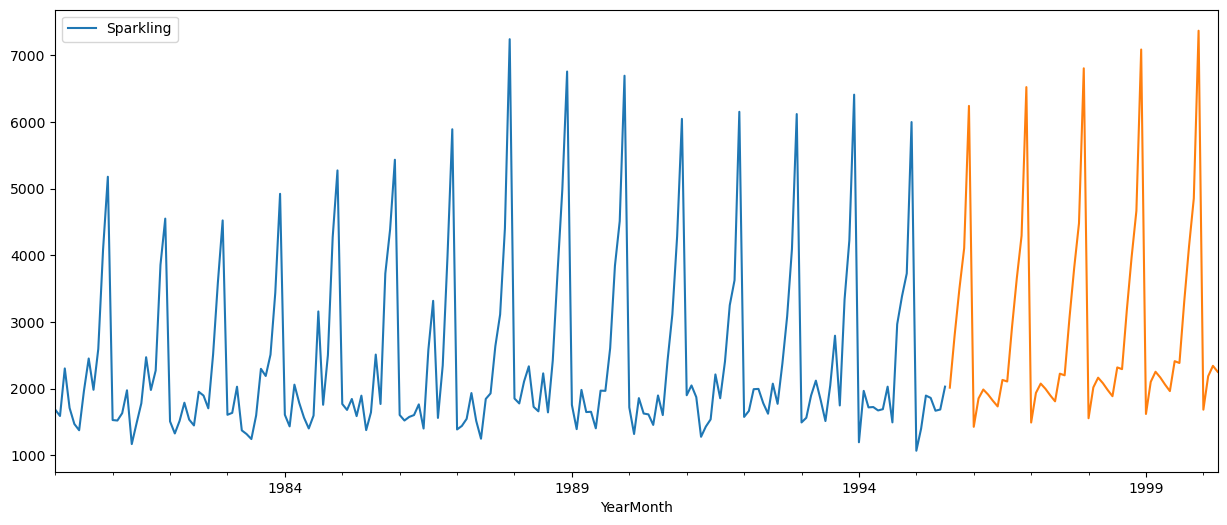

In [88]:
df.plot()
prediction_2.plot();

In [89]:
#In the below code, we have calculated the upper and lower confidence bands at 95% confidence level
#The percentile function under numpy lets us calculate these and adding and subtracting from the predictions
#gives us the necessary confidence bands for the predictions
pred_2_df = pd.DataFrame({'lower_CI':prediction_2 - 1.96*np.std(fullmodel2.resid,ddof=1),
                          'prediction':prediction_2,
                          'upper_ci': prediction_2 + 1.96*np.std(fullmodel2.resid,ddof=1)})
pred_2_df.head()

lower_CI   prediction     upper_ci
1995-08-01  1072.699497  2015.899185  2959.098874
1995-09-01  1852.821704  2796.021393  3739.221081
1995-10-01  2552.622810  3495.822498  4439.022187
1995-11-01  3165.384431  4108.584120  5051.783808
1995-12-01  5298.253285  6241.452973  7184.652661

In [90]:
pred_2_df.tail()

lower_CI   prediction     upper_ci
1999-12-01  6425.807446  7369.007135  8312.206823
2000-01-01   742.501587  1685.701275  2628.900964
2000-02-01  1243.091326  2186.291014  3129.490703
2000-03-01  1399.805964  2343.005652  3286.205341
2000-04-01  1309.705321  2252.905009  3196.104698

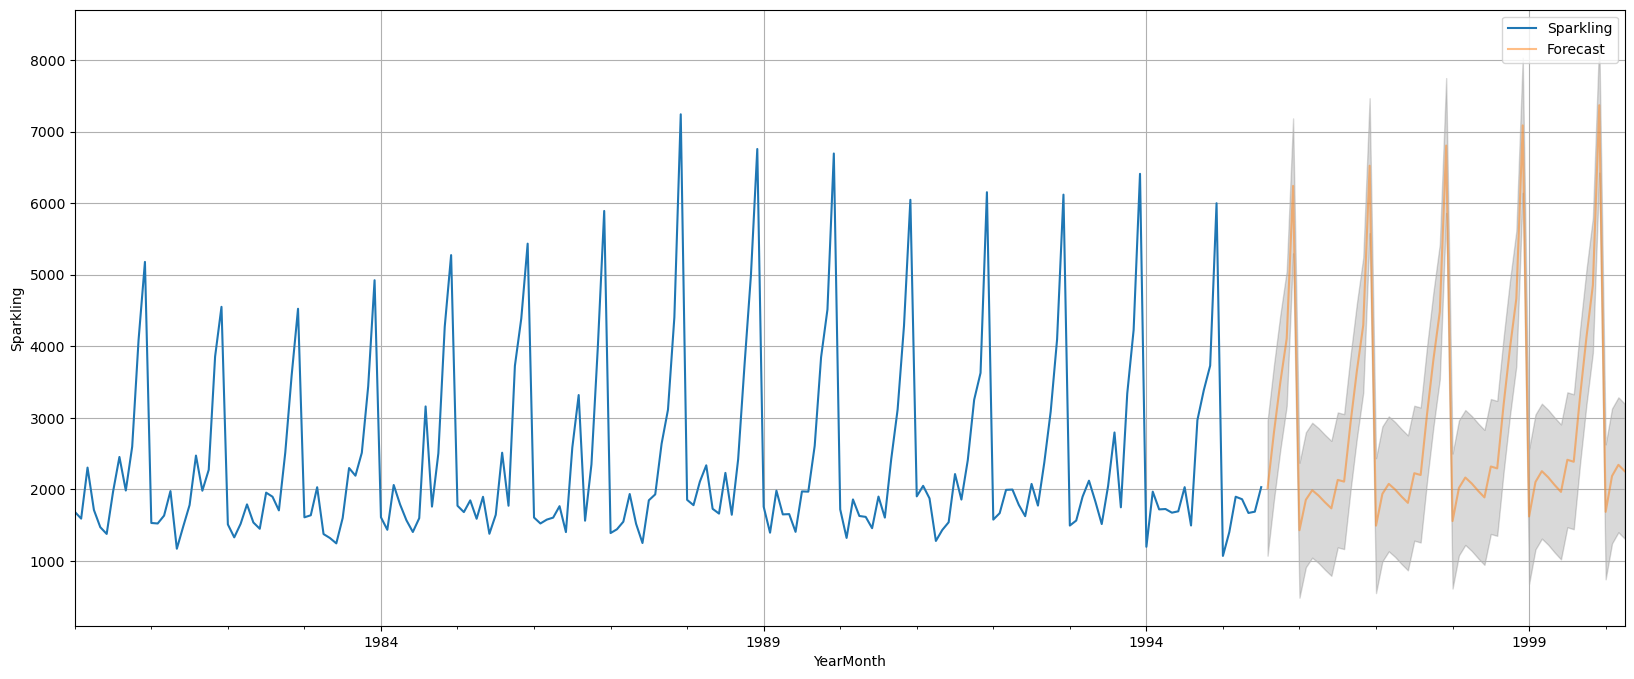

In [91]:
# plot the forecast along with the confidence band

axis = df.plot(label='Actual', figsize=(20,8))
pred_2_df['prediction'].plot(ax=axis, label='Forecast', alpha=0.5)
axis.fill_between(pred_2_df.index, pred_2_df['lower_CI'], pred_2_df['upper_ci'], color='k', alpha=.15)
axis.set_xlabel('YearMonth')
axis.set_ylabel('Sparkling')
plt.legend(loc='best')
plt.grid()
plt.show()

### 3.6 Check the performance of the models built

In [92]:
print('Sorted by RMSE values on the Test Data:','\n',)
Model11.sort_values(by=['Test RMSE'])

Sorted by RMSE values on the Test Data: 



Test RMSE
Alpha=0.9,Beta=0.1,Gamma=0.2,TripleExponentialS...   342.322388
Alpha=0.075,Beta=0.064,Gamma=0.376,TripleExpone...   381.657232
2pointTrailingMovingAverage                          811.178937
4pointTrailingMovingAverage                         1184.213295
6pointTrailingMovingAverage                         1337.200524
Alpha=0.038003579704776386,SimpleExponentialSmo...  1362.355525
Alpha=0.4,SimpleExponentialSmoothing                1363.037803
RegressionOnTime                                    1392.438305
9pointTrailingMovingAverage                         1422.653281
Alpha=0.3,Beta=0.3,DoubleExponentialSmoothing       1597.853999

Across all the models built the TES with best params Alpha – 0.9,  Beta – 0.1 & Gamma – 0.2 value has the lowest RMSE value



## 4. Check for Stationarity

### 4.1 Check for stationarity 

AD Fuller Test
if p value > 0.05 then We fail to reject null hypothesis (H0 is true). 
We go for differencing
if p value < 0.05 then the data is stationary

In [93]:
## Test for stationarity of the series - Dicky Fuller test

from statsmodels.tsa.stattools import adfuller
def test_stationarity(timeseries):
    
    #Determing rolling statistics
    rolmean = timeseries.rolling(window=7).mean() #determining the rolling mean
    rolstd = timeseries.rolling(window=7).std()   #determining the rolling standard deviation

    #Plot rolling statistics:
    orig = plt.plot(timeseries, color='blue',label='Original')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)
    
    #Perform Dickey-Fuller test:
    print ('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print (dfoutput,'\n')

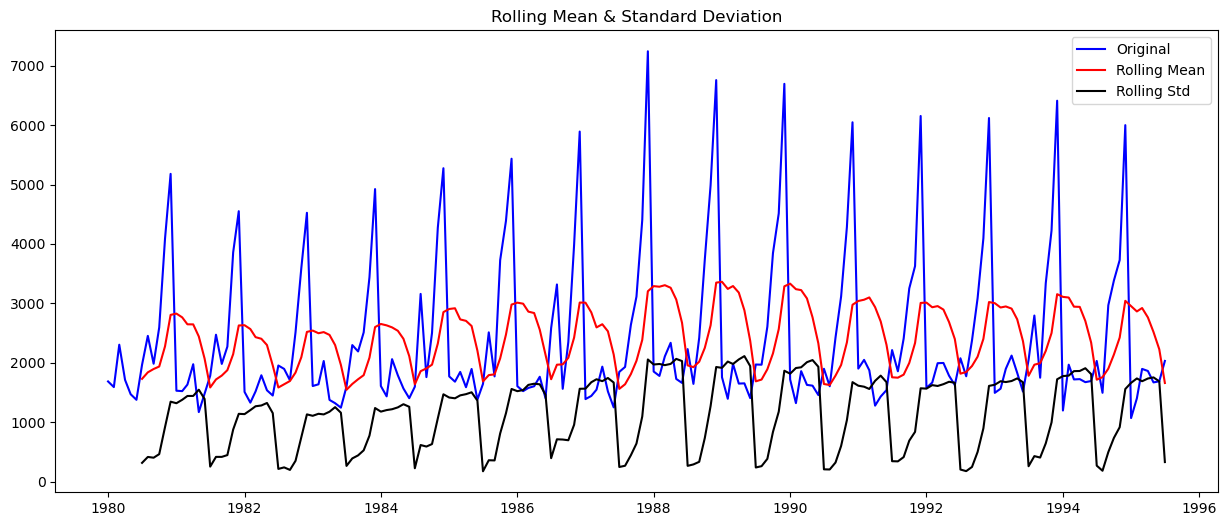

Results of Dickey-Fuller Test:
Test Statistic                  -1.360497
p-value                          0.601061
#Lags Used                      11.000000
Number of Observations Used    175.000000
Critical Value (1%)             -3.468280
Critical Value (5%)             -2.878202
Critical Value (10%)            -2.575653
dtype: float64 



In [94]:
test_stationarity(df['Sparkling'])

We see that at 5% significant level the Time Series is non-stationary.
Let us take a difference of order 1 and check whether the Time Series is stationary or not.

### 4.2 Make the data stationary (if needed)

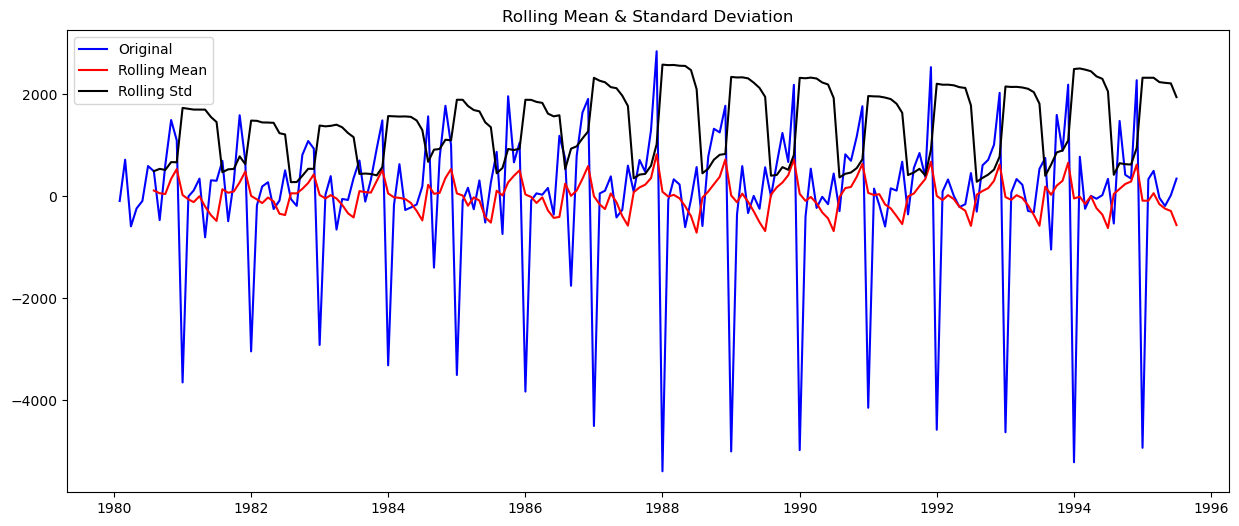

Results of Dickey-Fuller Test:
Test Statistic                 -45.050301
p-value                          0.000000
#Lags Used                      10.000000
Number of Observations Used    175.000000
Critical Value (1%)             -3.468280
Critical Value (5%)             -2.878202
Critical Value (10%)            -2.575653
dtype: float64 



In [95]:
test_stationarity(df['Sparkling'].diff().dropna())

## 5. Model Building - Stationary Data

### 5.1 Generate ACF & PACF Plot and find the AR, MA values. 

In [96]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

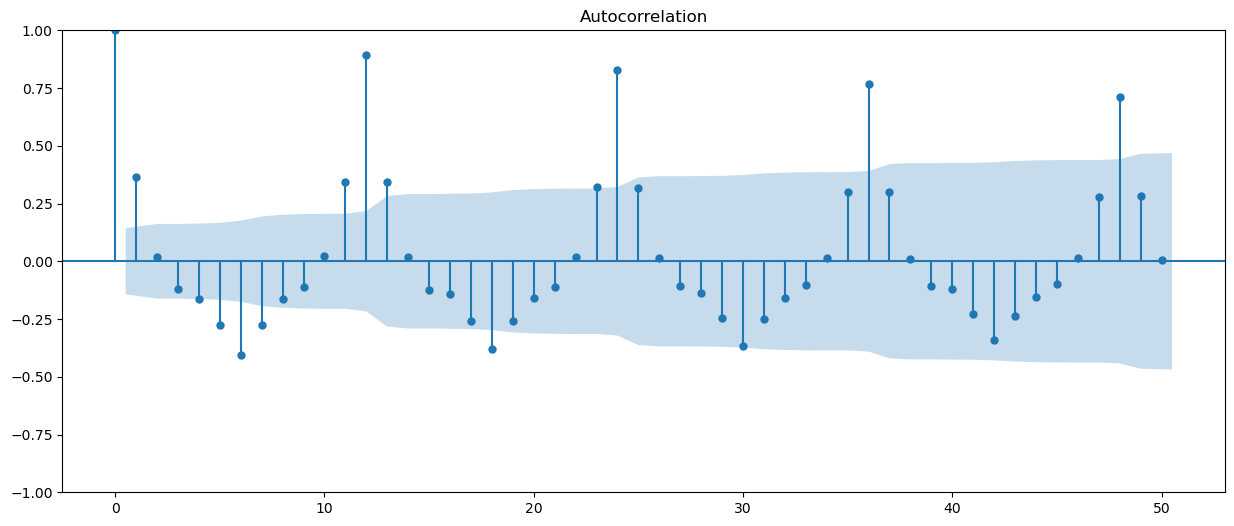

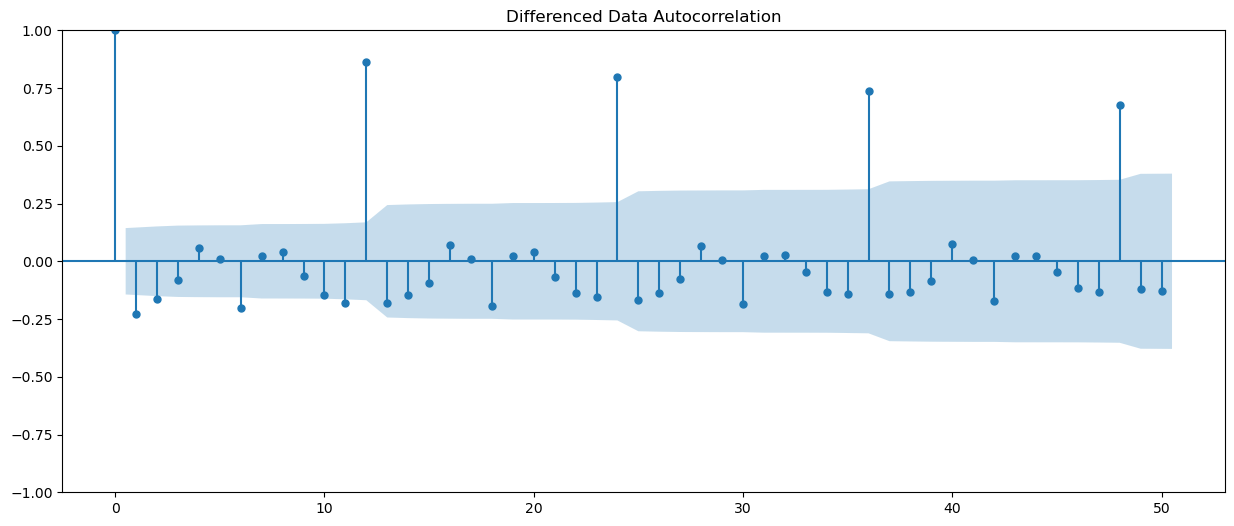

In [97]:
plot_acf(df['Sparkling'],lags=50)
plot_acf(df['Sparkling'].diff().dropna(),lags=50,title='Differenced Data Autocorrelation')
plt.show()

/Users/srinivasant/anaconda3/lib/python3.11/site-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


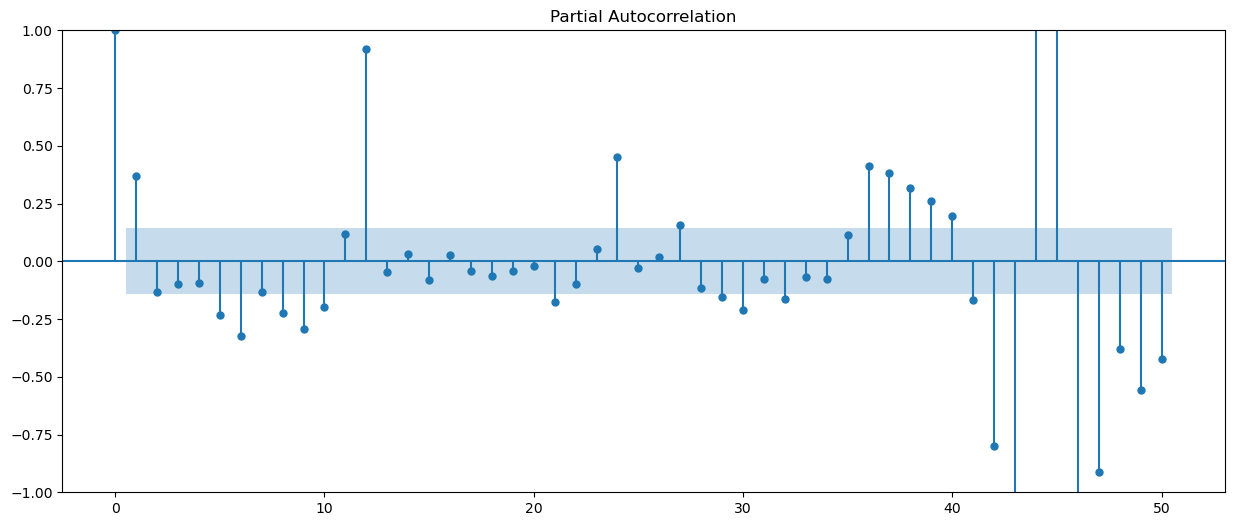

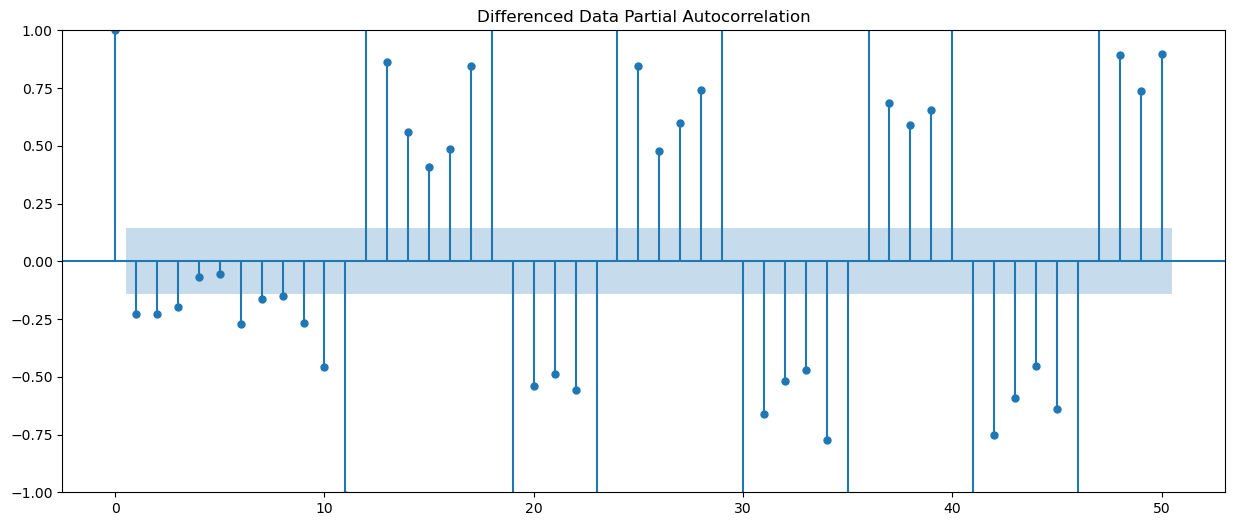

In [98]:
plot_pacf(df['Sparkling'],lags=50)
plot_pacf(df['Sparkling'].diff().dropna(),lags=50,title='Differenced Data Partial Autocorrelation')
plt.show()

### 5.2 Build different ARIMA models

### 5.2.1 Auto ARIMA 

In [99]:
## The following loop helps us in getting a combination of different parameters of p and q in the range of 0 and 2
## We have kept the value of d as 1 as we need to take a difference of the series to make it stationary.

import itertools
p = q = range(0, 3)
d= range(1,2)
pdq = list(itertools.product(p, d, q))
print('Some parameter combinations for the Model...')
for i in range(1,len(pdq)):
    print('Model: {}'.format(pdq[i]))

Some parameter combinations for the Model...
Model: (0, 1, 1)
Model: (0, 1, 2)
Model: (1, 1, 0)
Model: (1, 1, 1)
Model: (1, 1, 2)
Model: (2, 1, 0)
Model: (2, 1, 1)
Model: (2, 1, 2)


In [100]:
# Creating an empty Dataframe with column names only
ARIMA_AIC = pd.DataFrame(columns=['param', 'AIC'])
ARIMA_AIC

Empty DataFrame
Columns: [param, AIC]
Index: []

In [101]:
from statsmodels.tsa.arima.model import ARIMA

for param in pdq:
    ARIMA_model = ARIMA(train['Sparkling'].values,order=param).fit()
    print('ARIMA{} - AIC:{}'.format(param,ARIMA_model.aic))
    ARIMA_AIC = ARIMA_AIC.append({'param':param, 'AIC': ARIMA_model.aic}, ignore_index=True)

ARIMA(0, 1, 0) - AIC:2232.719438106631
ARIMA(0, 1, 1) - AIC:2217.9392170978817


/var/folders/v3/w2fxtj257m992bzz44lcb4p00000gn/T/ipykernel_21988/3609794300.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  ARIMA_AIC = ARIMA_AIC.append({'param':param, 'AIC': ARIMA_model.aic}, ignore_index=True)
/var/folders/v3/w2fxtj257m992bzz44lcb4p00000gn/T/ipykernel_21988/3609794300.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  ARIMA_AIC = ARIMA_AIC.append({'param':param, 'AIC': ARIMA_model.aic}, ignore_index=True)


ARIMA(0, 1, 2) - AIC:2194.034361361608
ARIMA(1, 1, 0) - AIC:2231.137663012458
ARIMA(1, 1, 1) - AIC:2196.0500859900258


/var/folders/v3/w2fxtj257m992bzz44lcb4p00000gn/T/ipykernel_21988/3609794300.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  ARIMA_AIC = ARIMA_AIC.append({'param':param, 'AIC': ARIMA_model.aic}, ignore_index=True)
/var/folders/v3/w2fxtj257m992bzz44lcb4p00000gn/T/ipykernel_21988/3609794300.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  ARIMA_AIC = ARIMA_AIC.append({'param':param, 'AIC': ARIMA_model.aic}, ignore_index=True)
/Users/srinivasant/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/var/folders/v3/w2fxtj257m992bzz44lcb4p00000gn/T/ipykernel_21988/3609794300.py:6: FutureWarning: The frame.append method is deprecated and 

ARIMA(1, 1, 2) - AIC:2194.959653392745
ARIMA(2, 1, 0) - AIC:2223.899470277437
ARIMA(2, 1, 1) - AIC:2193.974962440293


/var/folders/v3/w2fxtj257m992bzz44lcb4p00000gn/T/ipykernel_21988/3609794300.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  ARIMA_AIC = ARIMA_AIC.append({'param':param, 'AIC': ARIMA_model.aic}, ignore_index=True)
/var/folders/v3/w2fxtj257m992bzz44lcb4p00000gn/T/ipykernel_21988/3609794300.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  ARIMA_AIC = ARIMA_AIC.append({'param':param, 'AIC': ARIMA_model.aic}, ignore_index=True)
/var/folders/v3/w2fxtj257m992bzz44lcb4p00000gn/T/ipykernel_21988/3609794300.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  ARIMA_AIC = ARIMA_AIC.append({'param':param, 'AIC': ARIMA_model.aic}, ignore_index=True)


ARIMA(2, 1, 2) - AIC:2178.109740947526


/var/folders/v3/w2fxtj257m992bzz44lcb4p00000gn/T/ipykernel_21988/3609794300.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  ARIMA_AIC = ARIMA_AIC.append({'param':param, 'AIC': ARIMA_model.aic}, ignore_index=True)


In [102]:
## Sort the above AIC values in the ascending order to get the parameters for the minimum AIC value

ARIMA_AIC.sort_values(by='AIC',ascending=True)

param          AIC
8  (2, 1, 2)  2178.109741
7  (2, 1, 1)  2193.974962
2  (0, 1, 2)  2194.034361
5  (1, 1, 2)  2194.959653
4  (1, 1, 1)  2196.050086
1  (0, 1, 1)  2217.939217
6  (2, 1, 0)  2223.899470
3  (1, 1, 0)  2231.137663
0  (0, 1, 0)  2232.719438

In [103]:
auto_ARIMA = ARIMA(train['Sparkling'], order=(2,1,2))

results_auto_ARIMA = auto_ARIMA.fit()

print(results_auto_ARIMA.summary())

/Users/srinivasant/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Users/srinivasant/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Users/srinivasant/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


                               SARIMAX Results                                
Dep. Variable:              Sparkling   No. Observations:                  130
Model:                 ARIMA(2, 1, 2)   Log Likelihood               -1084.055
Date:                Sun, 14 Apr 2024   AIC                           2178.110
Time:                        17:57:18   BIC                           2192.409
Sample:                    01-01-1980   HQIC                          2183.920
                         - 10-01-1990                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.3020      0.046     28.555      0.000       1.213       1.391
ar.L2         -0.5360      0.079     -6.744      0.000      -0.692      -0.380
ma.L1         -1.9915      0.110    -18.146      0.0

Predict on the Test Set using this model and evaluate the model.

In [104]:
predicted_auto_ARIMA = results_auto_ARIMA.forecast(steps=len(test))

In [105]:
predicted_auto_ARIMA.head()

1990-11-01    3752.200234
1990-12-01    3824.775166
1991-01-01    3578.276765
1991-02-01    3218.439812
1991-03-01    2882.053991
Freq: MS, Name: predicted_mean, dtype: float64

In [106]:
from sklearn.metrics import  mean_squared_error

In [107]:
rmse = metrics.mean_squared_error(test['Sparkling'],predicted_auto_ARIMA,squared=False)
print(rmse)

1325.1664117367593


In [108]:
resultsDf = pd.DataFrame({'RMSE': [rmse]}
                           ,index=['ARIMA(2,1,2)'])

resultsDf

RMSE
ARIMA(2,1,2)  1325.166412

### 5.2.2 Manual ARIMA 

/Users/srinivasant/anaconda3/lib/python3.11/site-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


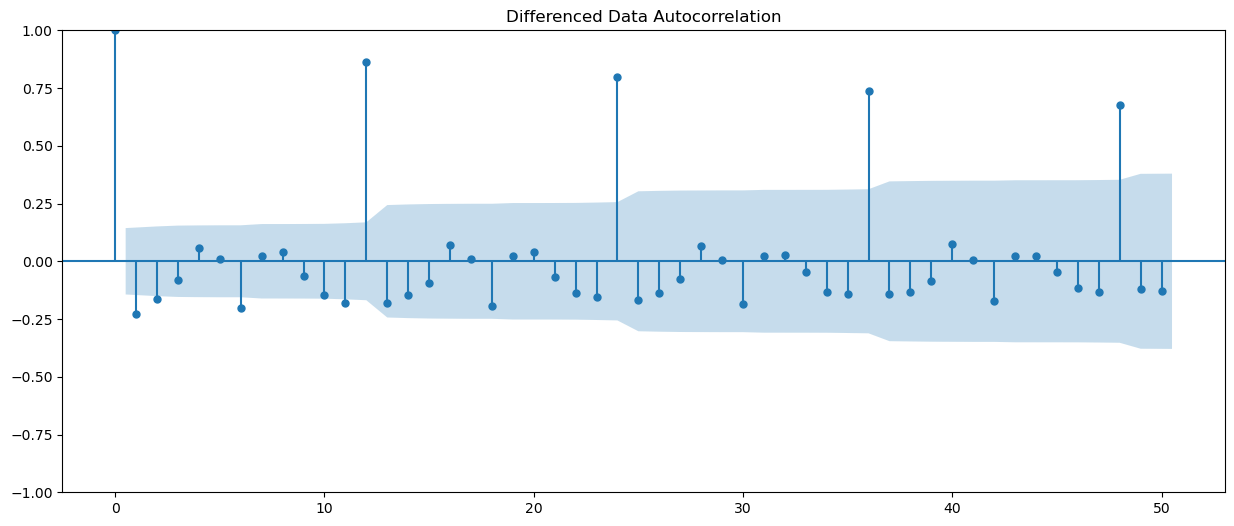

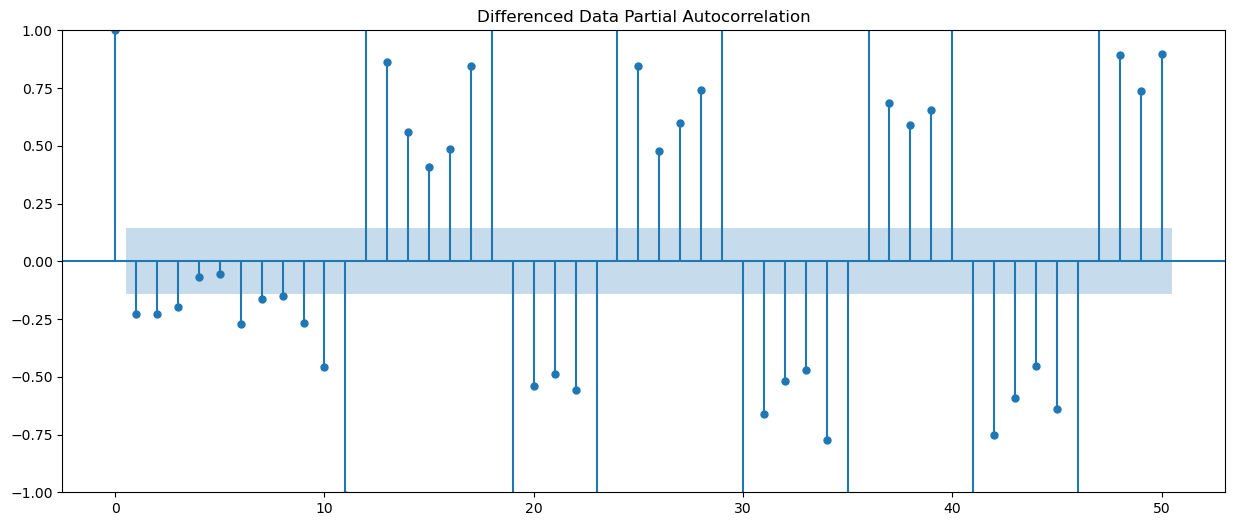

In [109]:
plot_acf(df['Sparkling'].diff().dropna(),lags=50,title='Differenced Data Autocorrelation')
plot_pacf(df['Sparkling'].diff().dropna(),lags=50,title='Differenced Data Partial Autocorrelation')
plt.show()

Here, we have taken alpha=0.05.

The Auto-Regressive parameter in an ARIMA model is 'p' which comes from the significant lag before which the PACF plot cuts-off to 3.

The Moving-Average parameter in an ARIMA model is 'q' which comes from the significant lag before the ACF plot cuts-off to 2.

By looking at the above plots, we can say that both the PACF and ACF plot cuts-off at lag 0.

In [110]:
manual_ARIMA = ARIMA(train['Sparkling'], order=(3,1,2))

results_manual_ARIMA = manual_ARIMA.fit()

print(results_manual_ARIMA.summary())

/Users/srinivasant/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Users/srinivasant/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Users/srinivasant/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Users/srinivasant/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/Users/srinivasant/anaconda3/lib/python3.11/site-packages/statsmodels/t

                               SARIMAX Results                                
Dep. Variable:              Sparkling   No. Observations:                  130
Model:                 ARIMA(3, 1, 2)   Log Likelihood               -1089.814
Date:                Sun, 14 Apr 2024   AIC                           2191.628
Time:                        17:57:19   BIC                           2208.787
Sample:                    01-01-1980   HQIC                          2198.600
                         - 10-01-1990                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.4601      0.099     -4.644      0.000      -0.654      -0.266
ar.L2          0.3090      0.092      3.371      0.001       0.129       0.489
ar.L3         -0.2309      0.148     -1.559      0.1

Predict on the Test Set using this model and evaluate the model.

In [111]:
predicted_manual_ARIMA = results_manual_ARIMA.forecast(steps=len(test))

In [112]:
predicted_manual_ARIMA1 = predicted_manual_ARIMA[0]
predicted_manual_ARIMA1

2460.3634664504725

In [113]:
rmse = mean_squared_error(test['Sparkling'],predicted_manual_ARIMA,squared=False)
print(rmse)

1341.0958953463273


In [114]:
temp_resultsDf = pd.DataFrame({'RMSE': [rmse]}
                           ,index=['ARIMA(3,1,2)'])


resultsDf = pd.concat([resultsDf,temp_resultsDf])

resultsDf

RMSE
ARIMA(2,1,2)  1325.166412
ARIMA(3,1,2)  1341.095895

### 5.3 Build different SARIMA models 

### 5.3.1 Auto SARIMA  

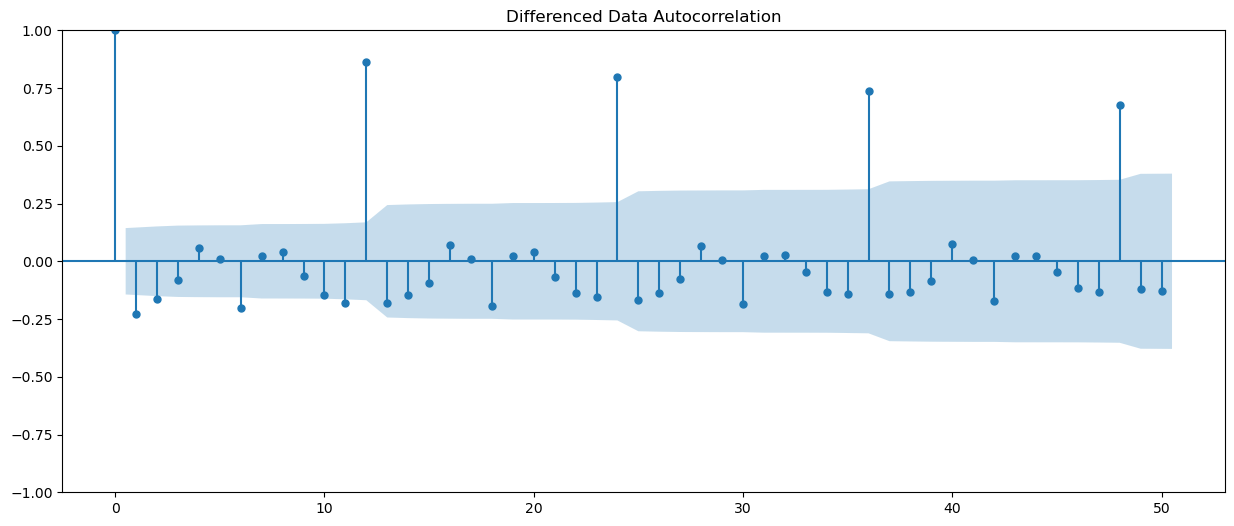

In [115]:
plot_acf(df['Sparkling'].diff().dropna(),lags=50,title='Differenced Data Autocorrelation')
plt.show()

We see that there can be a seasonality of 6 as well as 12
. We will run our auto SARIMA models by setting seasonality both as 6 and 12.

Setting the seasonality as 6
for the first iteration of the auto SARIMA model

In [116]:
import itertools
p = q = range(0, 3)
d= range(1,2)
D = range(0,1)
pdq = list(itertools.product(p, d, q))
model_pdq = [(x[0], x[1], x[2], 6) for x in list(itertools.product(p, D, q))]
print('Examples of some parameter combinations for Model...')
for i in range(1,len(pdq)):
    print('Model: {}{}'.format(pdq[i], model_pdq[i]))

Examples of some parameter combinations for Model...
Model: (0, 1, 1)(0, 0, 1, 6)
Model: (0, 1, 2)(0, 0, 2, 6)
Model: (1, 1, 0)(1, 0, 0, 6)
Model: (1, 1, 1)(1, 0, 1, 6)
Model: (1, 1, 2)(1, 0, 2, 6)
Model: (2, 1, 0)(2, 0, 0, 6)
Model: (2, 1, 1)(2, 0, 1, 6)
Model: (2, 1, 2)(2, 0, 2, 6)


In [117]:
SARIMA_AIC = pd.DataFrame(columns=['param','seasonal', 'AIC'])
SARIMA_AIC

Empty DataFrame
Columns: [param, seasonal, AIC]
Index: []

In [118]:
import statsmodels.api as sm

for param in pdq:
    for param_seasonal in model_pdq:
        SARIMA_model = sm.tsa.statespace.SARIMAX(train['Sparkling'].values,
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)
            
        results_SARIMA = SARIMA_model.fit(maxiter=1000)
        print('SARIMA{}x{} - AIC:{}'.format(param, param_seasonal, results_SARIMA.aic))
        SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            1     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  8.51704D+00    |proj g|=  1.11934D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    1      1      3      1     0     0   5.882D-06   8.517D+00
  F =   8.5169957771113900     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
SARIMA(0, 1, 0)x(0, 0, 0, 6) - AIC:2216.4189020489616
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           10

At X0         0 variables

 This problem is unconstrained.
/var/folders/v3/w2fxtj257m992bzz44lcb4p00000gn/T/ipykernel_21988/3271564440.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
 This problem is unconstrained.
/var/folders/v3/w2fxtj257m992bzz44lcb4p00000gn/T/ipykernel_21988/3271564440.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
 This problem is unconstrained.
/var/folders/v3/w2fxtj257m992bzz44lcb4p00000gn/T/ipykernel_21988/3271564440.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC

At iterate    5    f=  7.93349D+00    |proj g|=  2.88068D-02

At iterate   10    f=  7.93326D+00    |proj g|=  1.19456D-03

At iterate   15    f=  7.93303D+00    |proj g|=  2.39040D-02

At iterate   20    f=  7.92105D+00    |proj g|=  1.44827D-01

At iterate   25    f=  7.85207D+00    |proj g|=  6.61193D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     28     42      1     0     0   2.170D-05   7.852D+00
  F =   7.8519749641263328     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
SARIMA(0, 1, 0)x(1, 0, 1, 6) - AIC:2047.5134906728465
RUNNING THE L-BFGS-B CODE

           * * *

Machine precisi

/var/folders/v3/w2fxtj257m992bzz44lcb4p00000gn/T/ipykernel_21988/3271564440.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
 This problem is unconstrained.



At iterate   15    f=  7.44996D+00    |proj g|=  2.41595D-03

At iterate   20    f=  7.44973D+00    |proj g|=  3.30073D-02

At iterate   25    f=  7.41930D+00    |proj g|=  2.04512D-01

At iterate   30    f=  7.36268D+00    |proj g|=  6.78142D-02

At iterate   35    f=  7.31596D+00    |proj g|=  3.34680D-01

At iterate   40    f=  7.26402D+00    |proj g|=  1.08533D-01

At iterate   45    f=  7.25905D+00    |proj g|=  1.19382D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     47     68      1     0     0   9.584D-05   7.259D+00
  F =   7.2590543947512778     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH   

/var/folders/v3/w2fxtj257m992bzz44lcb4p00000gn/T/ipykernel_21988/3271564440.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
 This problem is unconstrained.

   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
/var/folders/v3/w2fxtj257m992bzz44lcb4p00000gn/T/ipykernel_21988/3271564440.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
 This problem is unconstrained.
/var/folders/v3/w2fxtj257m992bzz44lcb4p00000gn/T/ipykernel_21988/3271564440.py:13: FutureWarning: The frame.append method is deprecated and will be remov


At iterate   20    f=  6.82280D+00    |proj g|=  3.02781D-02

At iterate   25    f=  6.81733D+00    |proj g|=  2.21146D-01

At iterate   30    f=  6.81372D+00    |proj g|=  1.64370D-03

At iterate   35    f=  6.81371D+00    |proj g|=  1.24155D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     35     38      1     0     0   1.242D-04   6.814D+00
  F =   6.8137126401684878     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
SARIMA(0, 1, 0)x(2, 0, 2, 6) - AIC:1781.5652864438068
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           10

At X0 

/var/folders/v3/w2fxtj257m992bzz44lcb4p00000gn/T/ipykernel_21988/3271564440.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
 This problem is unconstrained.
/var/folders/v3/w2fxtj257m992bzz44lcb4p00000gn/T/ipykernel_21988/3271564440.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
 This problem is unconstrained.
/var/folders/v3/w2fxtj257m992bzz44lcb4p00000gn/T/ipykernel_21988/3271564440.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':pa


At iterate    5    f=  7.36955D+00    |proj g|=  3.90093D-02

At iterate   10    f=  7.36819D+00    |proj g|=  4.06647D-04

At iterate   15    f=  7.36811D+00    |proj g|=  1.09481D-02

At iterate   20    f=  7.35789D+00    |proj g|=  1.13620D-01

At iterate   25    f=  7.20810D+00    |proj g|=  1.52187D-02

At iterate   30    f=  7.20786D+00    |proj g|=  1.41520D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     32     44      1     0     0   7.180D-06   7.208D+00
  F =   7.2078606972449499     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
SARIMA(0, 1, 1)x(0, 0, 2, 6) - AIC:1882.04378128368

/var/folders/v3/w2fxtj257m992bzz44lcb4p00000gn/T/ipykernel_21988/3271564440.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
 This problem is unconstrained.
/var/folders/v3/w2fxtj257m992bzz44lcb4p00000gn/T/ipykernel_21988/3271564440.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
 This problem is unconstrained.


SARIMA(0, 1, 1)x(1, 0, 0, 6) - AIC:2100.552756905956
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  8.02821D+00    |proj g|=  3.63133D-01

At iterate    5    f=  7.76631D+00    |proj g|=  1.34013D-01

At iterate   10    f=  7.75710D+00    |proj g|=  6.06496D-03

At iterate   15    f=  7.75709D+00    |proj g|=  2.22625D-03

At iterate   20    f=  7.75704D+00    |proj g|=  3.29327D-02

At iterate   25    f=  7.75102D+00    |proj g|=  3.05362D-01

At iterate   30    f=  7.61172D+00    |proj g|=  1.18694D+00

At iterate   35    f=  7.56413D+00    |proj g|=  8.16066D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of

/var/folders/v3/w2fxtj257m992bzz44lcb4p00000gn/T/ipykernel_21988/3271564440.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  7.39152D+00    |proj g|=  8.23261D-02

At iterate    5    f=  7.33607D+00    |proj g|=  4.49702D-02

At iterate   10    f=  7.30411D+00    |proj g|=  2.81769D-02

At iterate   15    f=  7.30314D+00    |proj g|=  1.00066D-03

At iterate   20    f=  7.30313D+00    |proj g|=  4.01966D-03

At iterate   25    f=  7.30226D+00    |proj g|=  6.03938D-02

At iterate   30    f=  7.13508D+00    |proj g|=  7.50737D-01

At iterate   35    f=  6.99887D+00    |proj g|=  1.13985D-01

At iterate   40    f=  6.98230D+00    |proj g|=  1.32541D-01

At iterate   45    f=  6.98153D+00    |proj g|=  2.07850D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = nu

/var/folders/v3/w2fxtj257m992bzz44lcb4p00000gn/T/ipykernel_21988/3271564440.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
 This problem is unconstrained.
/var/folders/v3/w2fxtj257m992bzz44lcb4p00000gn/T/ipykernel_21988/3271564440.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
 This problem is unconstrained.



At iterate    5    f=  7.37592D+00    |proj g|=  5.79595D-04

At iterate   10    f=  7.37525D+00    |proj g|=  7.30349D-03

At iterate   15    f=  7.31404D+00    |proj g|=  3.55686D-01

At iterate   20    f=  6.81409D+00    |proj g|=  4.93929D-01

At iterate   25    f=  6.77640D+00    |proj g|=  2.71250D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     29     40      1     0     0   5.835D-05   6.776D+00
  F =   6.7762070164273061     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
SARIMA(0, 1, 1)x(2, 0, 0, 6) - AIC:1769.8138242710995
RUNNING THE L-BFGS-B CODE

           * * *

Machine precis

/var/folders/v3/w2fxtj257m992bzz44lcb4p00000gn/T/ipykernel_21988/3271564440.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
 This problem is unconstrained.



At iterate   20    f=  7.22052D+00    |proj g|=  3.43901D-02

At iterate   25    f=  7.17720D+00    |proj g|=  3.78317D-01

At iterate   30    f=  6.89548D+00    |proj g|=  2.50858D-01

At iterate   35    f=  6.58227D+00    |proj g|=  8.47243D-01

At iterate   40    f=  6.52433D+00    |proj g|=  1.09336D-01

At iterate   45    f=  6.52356D+00    |proj g|=  9.88594D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     48     67      1     0     0   3.179D-04   6.524D+00
  F =   6.5235606406684319     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
SARIMA(0, 1, 1)x(2, 0, 2, 6) - AIC:1708.12576657379

/var/folders/v3/w2fxtj257m992bzz44lcb4p00000gn/T/ipykernel_21988/3271564440.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
 This problem is unconstrained.
/var/folders/v3/w2fxtj257m992bzz44lcb4p00000gn/T/ipykernel_21988/3271564440.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
 This problem is unconstrained.



At iterate   10    f=  7.84838D+00    |proj g|=  1.63261D-04

At iterate   15    f=  7.84838D+00    |proj g|=  3.11268D-03

At iterate   20    f=  7.84806D+00    |proj g|=  2.74814D-02

At iterate   25    f=  7.83730D+00    |proj g|=  8.61253D-02

At iterate   30    f=  7.83279D+00    |proj g|=  1.61936D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     31     38      1     0     0   2.564D-05   7.833D+00
  F =   7.8327858457970141     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
SARIMA(0, 1, 2)x(0, 0, 1, 6) - AIC:2044.5243199072236
RUNNING THE L-BFGS-B CODE

           * * *

Machine precis

/var/folders/v3/w2fxtj257m992bzz44lcb4p00000gn/T/ipykernel_21988/3271564440.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
 This problem is unconstrained.



At iterate   15    f=  7.27284D+00    |proj g|=  1.15564D-02

At iterate   20    f=  7.22831D+00    |proj g|=  1.88185D-01

At iterate   25    f=  7.08258D+00    |proj g|=  2.32114D-02

At iterate   30    f=  7.08177D+00    |proj g|=  2.33453D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     33     45      1     0     0   2.577D-05   7.082D+00
  F =   7.0817712474456433     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
SARIMA(0, 1, 2)x(0, 0, 2, 6) - AIC:1851.2605243358673
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0 

/var/folders/v3/w2fxtj257m992bzz44lcb4p00000gn/T/ipykernel_21988/3271564440.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
 This problem is unconstrained.
/var/folders/v3/w2fxtj257m992bzz44lcb4p00000gn/T/ipykernel_21988/3271564440.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
 This problem is unconstrained.



At iterate   20    f=  7.99323D+00    |proj g|=  9.29050D-02

At iterate   25    f=  7.98616D+00    |proj g|=  4.86081D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     26     36      1     0     0   6.351D-06   7.986D+00
  F =   7.9861593941998725     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
SARIMA(0, 1, 2)x(1, 0, 0, 6) - AIC:2084.401442491967
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  7.91397D+00    |proj g|=  3.58572D-01

At iterate    5 

/var/folders/v3/w2fxtj257m992bzz44lcb4p00000gn/T/ipykernel_21988/3271564440.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
 This problem is unconstrained.



At iterate    5    f=  7.26039D+00    |proj g|=  2.63985D-02

At iterate   10    f=  7.24457D+00    |proj g|=  9.12848D-02

At iterate   15    f=  7.22598D+00    |proj g|=  5.18566D-02

At iterate   20    f=  7.22416D+00    |proj g|=  1.10981D-03

At iterate   25    f=  7.22415D+00    |proj g|=  1.47033D-03

At iterate   30    f=  7.22337D+00    |proj g|=  6.10045D-02

At iterate   35    f=  7.11635D+00    |proj g|=  1.68269D-01

At iterate   40    f=  7.07737D+00    |proj g|=  8.13343D-03

At iterate   45    f=  7.07717D+00    |proj g|=  6.34556D-03

At iterate   50    f=  7.07711D+00    |proj g|=  9.83119D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tn

/var/folders/v3/w2fxtj257m992bzz44lcb4p00000gn/T/ipykernel_21988/3271564440.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
 This problem is unconstrained.
/var/folders/v3/w2fxtj257m992bzz44lcb4p00000gn/T/ipykernel_21988/3271564440.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)



At iterate    5    f=  7.35718D+00    |proj g|=  5.95504D-04

At iterate   10    f=  7.35699D+00    |proj g|=  3.62763D-03

At iterate   15    f=  7.34070D+00    |proj g|=  1.58401D-01

At iterate   20    f=  6.87385D+00    |proj g|=  4.94795D-01

At iterate   25    f=  6.74042D+00    |proj g|=  4.42842D-02

At iterate   30    f=  6.74008D+00    |proj g|=  1.63639D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     30     37      1     0     0   1.636D-05   6.740D+00
  F =   6.7400797549703508     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
SARIMA(0, 1, 2)x(2, 0, 0, 6) - AIC:1762.42073629229

 This problem is unconstrained.



At iterate    5    f=  7.35719D+00    |proj g|=  1.42509D-03

At iterate   10    f=  7.35715D+00    |proj g|=  9.84567D-04

At iterate   15    f=  7.35644D+00    |proj g|=  1.92193D-02

At iterate   20    f=  7.29849D+00    |proj g|=  2.42255D-01

At iterate   25    f=  7.20462D+00    |proj g|=  2.10997D-01

At iterate   30    f=  7.05482D+00    |proj g|=  3.17745D+00

At iterate   35    f=  6.84434D+00    |proj g|=  7.88616D-01

At iterate   40    f=  6.77824D+00    |proj g|=  5.99454D-01

At iterate   45    f=  6.75546D+00    |proj g|=  7.87881D-02

At iterate   50    f=  6.74764D+00    |proj g|=  6.08222D-02

At iterate   55    f=  6.74359D+00    |proj g|=  2.64426D-02

At iterate   60    f=  6.74197D+00    |proj g|=  1.50292D-02

At iterate   65    f=  6.74119D+00    |proj g|=  3.35067D-02

At iterate   70    f=  6.74077D+00    |proj g|=  1.29151D-02

At iterate   75    f=  6.74048D+00    |proj g|=  6.94953D-03

At iterate   80    f=  6.74025D+00    |proj g|=  6.15225D-03

At iter

/var/folders/v3/w2fxtj257m992bzz44lcb4p00000gn/T/ipykernel_21988/3271564440.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
 This problem is unconstrained.



At iterate   10    f=  7.15517D+00    |proj g|=  2.31027D-02

At iterate   15    f=  7.15496D+00    |proj g|=  1.09958D-03

At iterate   20    f=  7.15483D+00    |proj g|=  1.04332D-02

At iterate   25    f=  7.13043D+00    |proj g|=  2.19815D-01

At iterate   30    f=  6.84654D+00    |proj g|=  7.68570D-01

At iterate   35    f=  6.53974D+00    |proj g|=  2.00553D+00

At iterate   40    f=  6.46952D+00    |proj g|=  1.15575D-01

At iterate   45    f=  6.46744D+00    |proj g|=  1.30920D-01

At iterate   50    f=  6.46484D+00    |proj g|=  3.13306D-02

At iterate   55    f=  6.46477D+00    |proj g|=  3.70434D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tn

/var/folders/v3/w2fxtj257m992bzz44lcb4p00000gn/T/ipykernel_21988/3271564440.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
 This problem is unconstrained.
/var/folders/v3/w2fxtj257m992bzz44lcb4p00000gn/T/ipykernel_21988/3271564440.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
 This problem is unconstrained.
/var/folders/v3/w2fxtj257m992bzz44lcb4p00000gn/T/ipykernel_21988/3271564440.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':pa


At iterate    5    f=  7.91179D+00    |proj g|=  5.00229D-02

At iterate   10    f=  7.91037D+00    |proj g|=  5.70929D-04

At iterate   15    f=  7.90974D+00    |proj g|=  2.28208D-02

At iterate   20    f=  7.88481D+00    |proj g|=  2.45726D-01

At iterate   25    f=  7.82523D+00    |proj g|=  4.31992D-01

At iterate   30    f=  7.82220D+00    |proj g|=  1.12006D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     30     43      1     0     0   1.120D-04   7.822D+00
  F =   7.8222007310117396     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
SARIMA(1, 1, 0)x(1, 0, 1, 6) - AIC:2041.77219006305

/var/folders/v3/w2fxtj257m992bzz44lcb4p00000gn/T/ipykernel_21988/3271564440.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
 This problem is unconstrained.



At iterate   10    f=  7.41741D+00    |proj g|=  2.28729D-02

At iterate   15    f=  7.41695D+00    |proj g|=  6.13938D-04

At iterate   20    f=  7.41675D+00    |proj g|=  2.79982D-02

At iterate   25    f=  7.39111D+00    |proj g|=  3.18555D-01

At iterate   30    f=  7.28078D+00    |proj g|=  1.36939D-01

At iterate   35    f=  7.21895D+00    |proj g|=  4.11232D-02

At iterate   40    f=  7.21794D+00    |proj g|=  2.80292D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     41     56      1     0     0   5.834D-05   7.218D+00
  F =   7.2179351246673686     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH   

/var/folders/v3/w2fxtj257m992bzz44lcb4p00000gn/T/ipykernel_21988/3271564440.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
 This problem is unconstrained.
/var/folders/v3/w2fxtj257m992bzz44lcb4p00000gn/T/ipykernel_21988/3271564440.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
 This problem is unconstrained.



At iterate   20    f=  7.14776D+00    |proj g|=  6.48704D-01

At iterate   25    f=  6.86321D+00    |proj g|=  4.28631D-01

At iterate   30    f=  6.82940D+00    |proj g|=  5.62329D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     34     40      1     0     0   1.742D-05   6.829D+00
  F =   6.8293906991338345     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
SARIMA(1, 1, 0)x(2, 0, 1, 6) - AIC:1785.641581774797
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0 

/var/folders/v3/w2fxtj257m992bzz44lcb4p00000gn/T/ipykernel_21988/3271564440.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
 This problem is unconstrained.



At iterate   20    f=  7.31004D+00    |proj g|=  9.28087D-02

At iterate   25    f=  7.15658D+00    |proj g|=  2.60075D-01

At iterate   30    f=  6.87249D+00    |proj g|=  2.77923D-01

At iterate   35    f=  6.73602D+00    |proj g|=  2.88865D-01

At iterate   40    f=  6.73059D+00    |proj g|=  1.16898D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     44     55      1     0     0   5.955D-06   6.731D+00
  F =   6.7305824497291802     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
SARIMA(1, 1, 0)x(2, 0, 2, 6) - AIC:1761.9514369295869
RUNNING THE L-BFGS-B CODE

           * * *

Machine precis

/var/folders/v3/w2fxtj257m992bzz44lcb4p00000gn/T/ipykernel_21988/3271564440.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
 This problem is unconstrained.
/var/folders/v3/w2fxtj257m992bzz44lcb4p00000gn/T/ipykernel_21988/3271564440.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
 This problem is unconstrained.
/var/folders/v3/w2fxtj257m992bzz44lcb4p00000gn/T/ipykernel_21988/3271564440.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':pa


At iterate   15    f=  7.33460D+00    |proj g|=  4.78728D-03

At iterate   20    f=  7.33414D+00    |proj g|=  2.80943D-02

At iterate   25    f=  7.27067D+00    |proj g|=  2.09216D-01

At iterate   30    f=  7.18089D+00    |proj g|=  2.82320D-01

At iterate   35    f=  7.15870D+00    |proj g|=  7.66149D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     38     47      1     0     0   5.461D-05   7.159D+00
  F =   7.1586850335484664     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
SARIMA(1, 1, 1)x(0, 0, 2, 6) - AIC:1871.2581087226013
RUNNING THE L-BFGS-B CODE

           * * *

Machine precis

/var/folders/v3/w2fxtj257m992bzz44lcb4p00000gn/T/ipykernel_21988/3271564440.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
 This problem is unconstrained.
/var/folders/v3/w2fxtj257m992bzz44lcb4p00000gn/T/ipykernel_21988/3271564440.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
 This problem is unconstrained.



At iterate    5    f=  7.95311D+00    |proj g|=  1.95738D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4      9     13      1     0     0   1.892D-04   7.953D+00
  F =   7.9527630739518269     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
SARIMA(1, 1, 1)x(1, 0, 0, 6) - AIC:2075.718399227475
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  7.97328D+00    |proj g|=  3.11757D-01

At iterate    5    f=  7.83111D+00    |proj g|=  1.29764D-01

At iterate   10 

/var/folders/v3/w2fxtj257m992bzz44lcb4p00000gn/T/ipykernel_21988/3271564440.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
 This problem is unconstrained.



At iterate   10    f=  7.29990D+00    |proj g|=  1.40221D-01

At iterate   15    f=  7.28053D+00    |proj g|=  6.67766D-03

At iterate   20    f=  7.28045D+00    |proj g|=  5.09797D-04

At iterate   25    f=  7.28042D+00    |proj g|=  6.60843D-03

At iterate   30    f=  7.27799D+00    |proj g|=  6.82098D-02

At iterate   35    f=  7.18690D+00    |proj g|=  2.49762D-01

At iterate   40    f=  7.15203D+00    |proj g|=  5.68217D-02

At iterate   45    f=  6.98982D+00    |proj g|=  3.58271D-01

At iterate   50    f=  6.97901D+00    |proj g|=  3.79998D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     53     74   

/var/folders/v3/w2fxtj257m992bzz44lcb4p00000gn/T/ipykernel_21988/3271564440.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
 This problem is unconstrained.



At iterate    5    f=  7.27952D+00    |proj g|=  1.70636D-02

At iterate   10    f=  7.27865D+00    |proj g|=  6.55957D-04

At iterate   15    f=  7.27811D+00    |proj g|=  1.30512D-02

At iterate   20    f=  7.26430D+00    |proj g|=  1.36459D-01

At iterate   25    f=  7.23904D+00    |proj g|=  3.23336D-02

At iterate   30    f=  6.94195D+00    |proj g|=  6.46353D-01

At iterate   35    f=  6.74516D+00    |proj g|=  4.24032D-01

At iterate   40    f=  6.68513D+00    |proj g|=  2.87985D-02

At iterate   45    f=  6.68413D+00    |proj g|=  7.43594D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     48     70   

/var/folders/v3/w2fxtj257m992bzz44lcb4p00000gn/T/ipykernel_21988/3271564440.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
 This problem is unconstrained.



At iterate   10    f=  7.27851D+00    |proj g|=  1.31072D-03

At iterate   15    f=  7.27842D+00    |proj g|=  4.21040D-03

At iterate   20    f=  7.26900D+00    |proj g|=  1.15554D-01

At iterate   25    f=  7.06295D+00    |proj g|=  3.77673D-01

At iterate   30    f=  6.69453D+00    |proj g|=  2.35260D-01

At iterate   35    f=  6.68373D+00    |proj g|=  1.02732D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     38     53      1     0     0   1.630D-05   6.684D+00
  F =   6.6837319457362758     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
SARIMA(1, 1, 1)x(2, 0, 1, 6) - AIC:1749.77030589143

/var/folders/v3/w2fxtj257m992bzz44lcb4p00000gn/T/ipykernel_21988/3271564440.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
 This problem is unconstrained.



At iterate   20    f=  7.20708D+00    |proj g|=  5.71779D-03

At iterate   25    f=  7.12221D+00    |proj g|=  9.15866D-01

At iterate   30    f=  6.79160D+00    |proj g|=  4.05030D-01

At iterate   35    f=  6.52976D+00    |proj g|=  2.75255D-01

At iterate   40    f=  6.52339D+00    |proj g|=  3.47640D-02

At iterate   45    f=  6.52325D+00    |proj g|=  3.07942D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     46     67      1     0     0   3.012D-05   6.523D+00
  F =   6.5232520903900424     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
SARIMA(1, 1, 1)x(2, 0, 2, 6) - AIC:1710.04554350141

/var/folders/v3/w2fxtj257m992bzz44lcb4p00000gn/T/ipykernel_21988/3271564440.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
 This problem is unconstrained.
/var/folders/v3/w2fxtj257m992bzz44lcb4p00000gn/T/ipykernel_21988/3271564440.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
 This problem is unconstrained.



At iterate   15    f=  8.23682D+00    |proj g|=  1.19988D-02

At iterate   20    f=  8.23460D+00    |proj g|=  1.22017D-01

At iterate   25    f=  8.22010D+00    |proj g|=  2.38616D-02

At iterate   30    f=  8.21960D+00    |proj g|=  4.86597D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     30     40      1     0     0   4.866D-06   8.220D+00
  F =   8.2196037561259274     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
SARIMA(1, 1, 2)x(0, 0, 0, 6) - AIC:2145.096976592741
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0  

/var/folders/v3/w2fxtj257m992bzz44lcb4p00000gn/T/ipykernel_21988/3271564440.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
 This problem is unconstrained.



At iterate   20    f=  7.27179D+00    |proj g|=  2.18627D-02

At iterate   25    f=  7.16338D+00    |proj g|=  2.28616D-01

At iterate   30    f=  7.08302D+00    |proj g|=  4.09401D-02

At iterate   35    f=  7.08166D+00    |proj g|=  3.41178D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     38     54      1     0     0   1.303D-05   7.082D+00
  F =   7.0816591121489045     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
SARIMA(1, 1, 2)x(0, 0, 2, 6) - AIC:1853.231369158715
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0  

/var/folders/v3/w2fxtj257m992bzz44lcb4p00000gn/T/ipykernel_21988/3271564440.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
 This problem is unconstrained.
/var/folders/v3/w2fxtj257m992bzz44lcb4p00000gn/T/ipykernel_21988/3271564440.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  7.90932D+00    |proj g|=  3.57414D-01

At iterate    5    f=  7.78661D+00    |proj g|=  1.29235D-01

At iterate   10    f=  7.67769D+00    |proj g|=  1.78140D-02

At iterate   15    f=  7.67707D+00    |proj g|=  2.40221D-03


 This problem is unconstrained.



At iterate   20    f=  7.67697D+00    |proj g|=  7.77465D-03

At iterate   25    f=  7.67695D+00    |proj g|=  4.37354D-04

At iterate   30    f=  7.67695D+00    |proj g|=  5.77245D-03

At iterate   35    f=  7.67643D+00    |proj g|=  3.35395D-02

At iterate   40    f=  7.67378D+00    |proj g|=  4.59294D-02

At iterate   45    f=  7.64534D+00    |proj g|=  5.92682D-01

At iterate   50    f=  7.48895D+00    |proj g|=  4.00907D-01

At iterate   55    f=  7.48597D+00    |proj g|=  1.94546D-03

At iterate   60    f=  7.48597D+00    |proj g|=  5.56788D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     60     72   

/var/folders/v3/w2fxtj257m992bzz44lcb4p00000gn/T/ipykernel_21988/3271564440.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
 This problem is unconstrained.



At iterate   15    f=  7.22368D+00    |proj g|=  4.90632D-03

At iterate   20    f=  7.22365D+00    |proj g|=  8.11134D-04

At iterate   25    f=  7.22359D+00    |proj g|=  7.00587D-04

At iterate   30    f=  7.22352D+00    |proj g|=  1.24470D-02

At iterate   35    f=  7.21958D+00    |proj g|=  6.04138D-02

At iterate   40    f=  7.10489D+00    |proj g|=  3.91312D-01

At iterate   45    f=  6.98514D+00    |proj g|=  1.50895D-01

At iterate   50    f=  6.91556D+00    |proj g|=  5.49578D-02

At iterate   55    f=  6.91486D+00    |proj g|=  4.75749D-03

At iterate   60    f=  6.91484D+00    |proj g|=  1.96293D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tn

/var/folders/v3/w2fxtj257m992bzz44lcb4p00000gn/T/ipykernel_21988/3271564440.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
 This problem is unconstrained.



At iterate    5    f=  7.28957D+00    |proj g|=  1.61779D-03

At iterate   10    f=  7.28851D+00    |proj g|=  7.40039D-03

At iterate   15    f=  7.28844D+00    |proj g|=  5.99352D-04

At iterate   20    f=  7.28692D+00    |proj g|=  1.48970D-02

At iterate   25    f=  7.16051D+00    |proj g|=  2.56801D-01

At iterate   30    f=  6.74014D+00    |proj g|=  9.12568D-01

At iterate   35    f=  6.67482D+00    |proj g|=  1.99108D-02

At iterate   40    f=  6.66200D+00    |proj g|=  3.45922D-02

At iterate   45    f=  6.66009D+00    |proj g|=  8.63230D-03

At iterate   50    f=  6.66005D+00    |proj g|=  1.32426D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tn

/var/folders/v3/w2fxtj257m992bzz44lcb4p00000gn/T/ipykernel_21988/3271564440.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
 This problem is unconstrained.



At iterate    5    f=  7.28955D+00    |proj g|=  1.87738D-03

At iterate   10    f=  7.28857D+00    |proj g|=  4.80713D-03

At iterate   15    f=  7.28831D+00    |proj g|=  5.99474D-04

At iterate   20    f=  7.28795D+00    |proj g|=  7.28252D-03

At iterate   25    f=  7.27175D+00    |proj g|=  8.83772D-02

At iterate   30    f=  7.21222D+00    |proj g|=  1.02375D-01

At iterate   35    f=  7.04792D+00    |proj g|=  3.19020D-01

At iterate   40    f=  6.78095D+00    |proj g|=  6.72384D-01

At iterate   45    f=  6.69028D+00    |proj g|=  5.06506D-01

At iterate   50    f=  6.67475D+00    |proj g|=  2.46526D-02

At iterate   55    f=  6.67122D+00    |proj g|=  3.91341D-02

At iterate   60    f=  6.66508D+00    |proj g|=  4.50903D-02

At iterate   65    f=  6.66173D+00    |proj g|=  3.32988D-02

At iterate   70    f=  6.66024D+00    |proj g|=  6.58392D-03

At iterate   75    f=  6.65954D+00    |proj g|=  1.55865D-02

At iterate   80    f=  6.65920D+00    |proj g|=  1.25132D-02

At iter

/var/folders/v3/w2fxtj257m992bzz44lcb4p00000gn/T/ipykernel_21988/3271564440.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
 This problem is unconstrained.



At iterate   15    f=  7.15416D+00    |proj g|=  5.92254D-03

At iterate   20    f=  7.15380D+00    |proj g|=  6.01789D-04

At iterate   25    f=  7.15355D+00    |proj g|=  1.58951D-02

At iterate   30    f=  7.14409D+00    |proj g|=  7.66596D-02

At iterate   35    f=  7.03181D+00    |proj g|=  4.90172D-01

At iterate   40    f=  6.90532D+00    |proj g|=  1.43298D+00

At iterate   45    f=  6.55180D+00    |proj g|=  3.33740D-01

At iterate   50    f=  6.47300D+00    |proj g|=  9.41027D-02

At iterate   55    f=  6.45626D+00    |proj g|=  5.67681D-02

At iterate   60    f=  6.45518D+00    |proj g|=  2.96176D-03

At iterate   65    f=  6.45517D+00    |proj g|=  3.11929D-03

At iterate   70    f=  6.45517D+00    |proj g|=  1.81542D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized 

/var/folders/v3/w2fxtj257m992bzz44lcb4p00000gn/T/ipykernel_21988/3271564440.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
 This problem is unconstrained.
/var/folders/v3/w2fxtj257m992bzz44lcb4p00000gn/T/ipykernel_21988/3271564440.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
 This problem is unconstrained.
/var/folders/v3/w2fxtj257m992bzz44lcb4p00000gn/T/ipykernel_21988/3271564440.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':pa

SARIMA(2, 1, 0)x(0, 0, 1, 6) - AIC:2108.878143774031
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  7.44005D+00    |proj g|=  5.36680D-02

At iterate    5    f=  7.43623D+00    |proj g|=  4.33556D-04

At iterate   10    f=  7.43619D+00    |proj g|=  4.07005D-03

At iterate   15    f=  7.43143D+00    |proj g|=  5.24475D-02

At iterate   20    f=  7.32760D+00    |proj g|=  7.67199D-02

At iterate   25    f=  7.31470D+00    |proj g|=  5.60514D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Pro

/var/folders/v3/w2fxtj257m992bzz44lcb4p00000gn/T/ipykernel_21988/3271564440.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
 This problem is unconstrained.
/var/folders/v3/w2fxtj257m992bzz44lcb4p00000gn/T/ipykernel_21988/3271564440.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  8.00231D+00    |proj g|=  2.89861D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4      3      5      1     0     0   9.436D-06   8.002D+00
  F =   8.0017884658949754     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
SARIMA(2, 1, 0)x(1, 0, 0, 6) - AIC:2088.4650011326935
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables

/var/folders/v3/w2fxtj257m992bzz44lcb4p00000gn/T/ipykernel_21988/3271564440.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
 This problem is unconstrained.



At iterate   15    f=  7.39153D+00    |proj g|=  4.43987D-04

At iterate   20    f=  7.39148D+00    |proj g|=  7.58546D-03

At iterate   25    f=  7.38639D+00    |proj g|=  1.05481D-01

At iterate   30    f=  7.26273D+00    |proj g|=  6.31353D-01

At iterate   35    f=  7.20303D+00    |proj g|=  1.91000D-02

At iterate   40    f=  7.20292D+00    |proj g|=  1.25600D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     43     55      1     0     0   3.012D-05   7.203D+00
  F =   7.2029208215944172     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
SARIMA(2, 1, 0)x(1, 0, 2, 6) - AIC:1884.75941361454

/var/folders/v3/w2fxtj257m992bzz44lcb4p00000gn/T/ipykernel_21988/3271564440.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
 This problem is unconstrained.
/var/folders/v3/w2fxtj257m992bzz44lcb4p00000gn/T/ipykernel_21988/3271564440.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
 This problem is unconstrained.



At iterate    5    f=  7.22394D+00    |proj g|=  1.47082D-03

At iterate   10    f=  7.22384D+00    |proj g|=  2.16132D-03

At iterate   15    f=  7.21477D+00    |proj g|=  4.18312D-02

At iterate   20    f=  6.85246D+00    |proj g|=  1.73483D-01

At iterate   25    f=  6.73180D+00    |proj g|=  2.97973D-01

At iterate   30    f=  6.69712D+00    |proj g|=  2.67142D-02

At iterate   35    f=  6.69691D+00    |proj g|=  5.19193D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     37     51      1     0     0   1.160D-05   6.697D+00
  F =   6.6969074188350453     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH   

/var/folders/v3/w2fxtj257m992bzz44lcb4p00000gn/T/ipykernel_21988/3271564440.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
 This problem is unconstrained.



At iterate   20    f=  7.21446D+00    |proj g|=  3.48179D-02

At iterate   25    f=  7.12647D+00    |proj g|=  1.62864D-01

At iterate   30    f=  6.72655D+00    |proj g|=  6.49592D-01

At iterate   35    f=  6.59794D+00    |proj g|=  3.98384D-01

At iterate   40    f=  6.59629D+00    |proj g|=  6.61003D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     43     55      1     0     0   4.350D-05   6.596D+00
  F =   6.5962906607479201     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
SARIMA(2, 1, 0)x(2, 0, 2, 6) - AIC:1729.0355717944592
RUNNING THE L-BFGS-B CODE

           * * *

Machine precis

/var/folders/v3/w2fxtj257m992bzz44lcb4p00000gn/T/ipykernel_21988/3271564440.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
 This problem is unconstrained.
/var/folders/v3/w2fxtj257m992bzz44lcb4p00000gn/T/ipykernel_21988/3271564440.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
 This problem is unconstrained.



At iterate   15    f=  7.90062D+00    |proj g|=  3.76199D-03

At iterate   20    f=  7.90042D+00    |proj g|=  4.14693D-02

At iterate   25    f=  7.89115D+00    |proj g|=  1.29369D-01

At iterate   30    f=  7.88694D+00    |proj g|=  3.31927D-03

At iterate   35    f=  7.88693D+00    |proj g|=  1.29988D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     35     39      1     0     0   1.300D-05   7.887D+00
  F =   7.8869341167119922     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
SARIMA(2, 1, 1)x(0, 0, 1, 6) - AIC:2060.602870345118
RUNNING THE L-BFGS-B CODE

           * * *

Machine precisi

/var/folders/v3/w2fxtj257m992bzz44lcb4p00000gn/T/ipykernel_21988/3271564440.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
 This problem is unconstrained.



At iterate    5    f=  7.32422D+00    |proj g|=  2.58905D-02

At iterate   10    f=  7.32325D+00    |proj g|=  2.83832D-03

At iterate   15    f=  7.32324D+00    |proj g|=  7.35995D-04

At iterate   20    f=  7.32227D+00    |proj g|=  2.14640D-02

At iterate   25    f=  7.24824D+00    |proj g|=  3.42565D-01

At iterate   30    f=  7.14370D+00    |proj g|=  6.50661D-02

At iterate   35    f=  7.13983D+00    |proj g|=  7.60413D-03

At iterate   40    f=  7.13978D+00    |proj g|=  2.19599D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     42     57      1     0     0   3.931D-06   7.140D+00
  F =   7.13977760778

/var/folders/v3/w2fxtj257m992bzz44lcb4p00000gn/T/ipykernel_21988/3271564440.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
 This problem is unconstrained.
/var/folders/v3/w2fxtj257m992bzz44lcb4p00000gn/T/ipykernel_21988/3271564440.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
 This problem is unconstrained.



At iterate   20    f=  7.86686D+00    |proj g|=  7.07039D-02

At iterate   25    f=  7.84815D+00    |proj g|=  6.65880D-02

At iterate   30    f=  7.84369D+00    |proj g|=  1.09129D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     31     35      1     0     0   3.348D-06   7.844D+00
  F =   7.8436888424732745     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
SARIMA(2, 1, 1)x(1, 0, 0, 6) - AIC:2049.359099043051
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0 

/var/folders/v3/w2fxtj257m992bzz44lcb4p00000gn/T/ipykernel_21988/3271564440.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
 This problem is unconstrained.



At iterate    5    f=  7.30924D+00    |proj g|=  5.41665D-02

At iterate   10    f=  7.27789D+00    |proj g|=  5.40854D-02

At iterate   15    f=  7.26767D+00    |proj g|=  3.39508D-03

At iterate   20    f=  7.26763D+00    |proj g|=  5.90596D-04

At iterate   25    f=  7.26759D+00    |proj g|=  9.56726D-03

At iterate   30    f=  7.26418D+00    |proj g|=  6.08386D-02

At iterate   35    f=  7.15270D+00    |proj g|=  6.24311D-01

At iterate   40    f=  6.97156D+00    |proj g|=  2.24396D-01

At iterate   45    f=  6.95933D+00    |proj g|=  2.27113D-02

At iterate   50    f=  6.95915D+00    |proj g|=  6.87152D-03

At iterate   55    f=  6.95915D+00    |proj g|=  1.36855D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F   

/var/folders/v3/w2fxtj257m992bzz44lcb4p00000gn/T/ipykernel_21988/3271564440.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
 This problem is unconstrained.



At iterate   25    f=  7.15387D+00    |proj g|=  6.51344D-02

At iterate   30    f=  6.88157D+00    |proj g|=  3.80424D-01

At iterate   35    f=  6.65852D+00    |proj g|=  1.01926D-01

At iterate   40    f=  6.61493D+00    |proj g|=  1.90206D-02

At iterate   45    f=  6.61467D+00    |proj g|=  1.59948D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     45     61      1     0     0   1.599D-05   6.615D+00
  F =   6.6146681280942445     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
SARIMA(2, 1, 1)x(2, 0, 0, 6) - AIC:1731.8137133045036


/var/folders/v3/w2fxtj257m992bzz44lcb4p00000gn/T/ipykernel_21988/3271564440.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  7.21403D+00    |proj g|=  4.20639D-02

At iterate    5    f=  7.20589D+00    |proj g|=  4.45986D-03

At iterate   10    f=  7.20562D+00    |proj g|=  1.17633D-03

At iterate   15    f=  7.20518D+00    |proj g|=  5.98371D-03

At iterate   20    f=  7.17218D+00    |proj g|=  9.76779D-02

At iterate   25    f=  6.81204D+00    |proj g|=  3.52428D-01

At iterate   30    f=  6.61471D+00    |proj g|=  4.62071D-02

At iterate   35    f=  6.61427D+00    |proj g|=  3.06683D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function 

/var/folders/v3/w2fxtj257m992bzz44lcb4p00000gn/T/ipykernel_21988/3271564440.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
 This problem is unconstrained.



At iterate   15    f=  7.19905D+00    |proj g|=  3.86626D-03

At iterate   20    f=  7.19391D+00    |proj g|=  3.14370D-02

At iterate   25    f=  7.18188D+00    |proj g|=  3.94459D-02

At iterate   30    f=  7.16765D+00    |proj g|=  6.58009D-02

At iterate   35    f=  6.87835D+00    |proj g|=  2.10626D-01

At iterate   40    f=  6.55737D+00    |proj g|=  4.51081D-01

At iterate   45    f=  6.52060D+00    |proj g|=  2.26022D-01

At iterate   50    f=  6.51739D+00    |proj g|=  1.31778D-02

At iterate   55    f=  6.51735D+00    |proj g|=  3.63800D-03

At iterate   60    f=  6.51735D+00    |proj g|=  1.12497D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tn

/var/folders/v3/w2fxtj257m992bzz44lcb4p00000gn/T/ipykernel_21988/3271564440.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
 This problem is unconstrained.
/var/folders/v3/w2fxtj257m992bzz44lcb4p00000gn/T/ipykernel_21988/3271564440.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
 This problem is unconstrained.



At iterate   10    f=  8.21530D+00    |proj g|=  3.69390D-01

At iterate   15    f=  8.19777D+00    |proj g|=  8.34468D-02

At iterate   20    f=  8.19512D+00    |proj g|=  5.04392D-02

At iterate   25    f=  8.19488D+00    |proj g|=  2.54201D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     25     48      1     0     0   2.542D-04   8.195D+00
  F =   8.1948822912863157     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
SARIMA(2, 1, 2)x(0, 0, 0, 6) - AIC:2140.669395734442
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0  

/var/folders/v3/w2fxtj257m992bzz44lcb4p00000gn/T/ipykernel_21988/3271564440.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
 This problem is unconstrained.



At iterate   10    f=  7.27235D+00    |proj g|=  1.52273D-03

At iterate   15    f=  7.27224D+00    |proj g|=  1.18564D-03

At iterate   20    f=  7.27221D+00    |proj g|=  2.37725D-03

At iterate   25    f=  7.26856D+00    |proj g|=  7.64678D-02

At iterate   30    f=  7.23796D+00    |proj g|=  2.76355D-01

At iterate   35    f=  7.19504D+00    |proj g|=  7.39055D-01

At iterate   40    f=  7.10306D+00    |proj g|=  7.76335D-01

At iterate   45    f=  7.06995D+00    |proj g|=  2.24894D-01

At iterate   50    f=  7.06575D+00    |proj g|=  7.95056D-02

At iterate   55    f=  7.06572D+00    |proj g|=  4.29131D-04

At iterate   60    f=  7.06572D+00    |proj g|=  1.47470D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F   

/var/folders/v3/w2fxtj257m992bzz44lcb4p00000gn/T/ipykernel_21988/3271564440.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
 This problem is unconstrained.



At iterate   15    f=  7.86290D+00    |proj g|=  2.04515D-01

At iterate   20    f=  7.84343D+00    |proj g|=  3.28990D-02

At iterate   25    f=  7.84300D+00    |proj g|=  2.45972D-02

At iterate   30    f=  7.84253D+00    |proj g|=  2.90287D-03

At iterate   35    f=  7.84253D+00    |proj g|=  3.91818D-04

At iterate   40    f=  7.84250D+00    |proj g|=  1.21411D-02

At iterate   45    f=  7.84213D+00    |proj g|=  3.04172D-02

At iterate   50    f=  7.81510D+00    |proj g|=  1.56793D-01

At iterate   55    f=  7.79429D+00    |proj g|=  2.16382D-02

At iterate   60    f=  7.79426D+00    |proj g|=  5.09795D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tn

/var/folders/v3/w2fxtj257m992bzz44lcb4p00000gn/T/ipykernel_21988/3271564440.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
 This problem is unconstrained.



At iterate   15    f=  7.66454D+00    |proj g|=  4.11996D-02

At iterate   20    f=  7.64441D+00    |proj g|=  1.89837D-01

At iterate   25    f=  7.63323D+00    |proj g|=  3.97175D-02

At iterate   30    f=  7.63257D+00    |proj g|=  5.00076D-04

At iterate   35    f=  7.63252D+00    |proj g|=  1.38159D-02

At iterate   40    f=  7.63004D+00    |proj g|=  1.12102D-01

At iterate   45    f=  7.57979D+00    |proj g|=  1.48915D-01

At iterate   50    f=  7.47224D+00    |proj g|=  5.04850D-01

At iterate   55    f=  7.38406D+00    |proj g|=  7.58510D-01

At iterate   60    f=  7.36289D+00    |proj g|=  8.51235D-02

At iterate   65    f=  7.36037D+00    |proj g|=  5.26537D-03

At iterate   70    f=  7.36036D+00    |proj g|=  1.44147D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized 

/var/folders/v3/w2fxtj257m992bzz44lcb4p00000gn/T/ipykernel_21988/3271564440.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
 This problem is unconstrained.



At iterate   15    f=  7.22158D+00    |proj g|=  1.14660D-01

At iterate   20    f=  7.22012D+00    |proj g|=  6.31674D-03

At iterate   25    f=  7.21733D+00    |proj g|=  3.67836D-02

At iterate   30    f=  7.21143D+00    |proj g|=  1.41974D-02

At iterate   35    f=  7.21137D+00    |proj g|=  5.25447D-04

At iterate   40    f=  7.21136D+00    |proj g|=  4.58222D-03

At iterate   45    f=  7.21101D+00    |proj g|=  1.03597D-02

At iterate   50    f=  7.18858D+00    |proj g|=  2.03695D-01

At iterate   55    f=  7.05149D+00    |proj g|=  7.23237D-01

At iterate   60    f=  6.90403D+00    |proj g|=  1.76130D+00

At iterate   65    f=  6.86924D+00    |proj g|=  4.10063D-01

At iterate   70    f=  6.85321D+00    |proj g|=  1.92009D-01

At iterate   75    f=  6.84830D+00    |proj g|=  1.61293D-01

At iterate   80    f=  6.84756D+00    |proj g|=  1.40578D-02

At iterate   85    f=  6.84747D+00    |proj g|=  1.70764D-03

At iterate   90    f=  6.84747D+00    |proj g|=  9.28114D-05

       

/var/folders/v3/w2fxtj257m992bzz44lcb4p00000gn/T/ipykernel_21988/3271564440.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
 This problem is unconstrained.



At iterate   20    f=  7.21682D+00    |proj g|=  1.03234D-02

At iterate   25    f=  7.21523D+00    |proj g|=  9.99699D-03

At iterate   30    f=  7.11261D+00    |proj g|=  2.42921D-01

At iterate   35    f=  6.60928D+00    |proj g|=  2.71200D-01

At iterate   40    f=  6.59762D+00    |proj g|=  7.38121D-03

At iterate   45    f=  6.59761D+00    |proj g|=  7.66353D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     48     69      1     0     0   3.278D-05   6.598D+00
  F =   6.5976053004923623     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
SARIMA(2, 1, 2)x(2, 0, 0, 6) - AIC:1729.37737812801

/var/folders/v3/w2fxtj257m992bzz44lcb4p00000gn/T/ipykernel_21988/3271564440.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
 This problem is unconstrained.



At iterate   15    f=  7.22149D+00    |proj g|=  4.51503D-03

At iterate   20    f=  7.21762D+00    |proj g|=  7.27481D-03

At iterate   25    f=  7.21505D+00    |proj g|=  1.78633D-02

At iterate   30    f=  6.93620D+00    |proj g|=  4.99734D-01

At iterate   35    f=  6.70751D+00    |proj g|=  4.00225D-01

At iterate   40    f=  6.60952D+00    |proj g|=  2.75935D-01

At iterate   45    f=  6.59833D+00    |proj g|=  5.38585D-02

At iterate   50    f=  6.59686D+00    |proj g|=  1.66628D-03

At iterate   55    f=  6.59685D+00    |proj g|=  6.49132D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    8     56     87   

/var/folders/v3/w2fxtj257m992bzz44lcb4p00000gn/T/ipykernel_21988/3271564440.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
 This problem is unconstrained.



At iterate    5    f=  7.15308D+00    |proj g|=  4.70571D-03

At iterate   10    f=  7.15298D+00    |proj g|=  8.00323D-04

At iterate   15    f=  7.15272D+00    |proj g|=  1.42044D-02

At iterate   20    f=  7.15246D+00    |proj g|=  5.41725D-03

At iterate   25    f=  7.15241D+00    |proj g|=  8.71963D-04

At iterate   30    f=  7.15187D+00    |proj g|=  3.53746D-03

At iterate   35    f=  7.14515D+00    |proj g|=  1.12135D-02

At iterate   40    f=  7.07902D+00    |proj g|=  1.86605D-01

At iterate   45    f=  6.89715D+00    |proj g|=  2.27077D-01

At iterate   50    f=  6.77097D+00    |proj g|=  9.74356D-01

At iterate   55    f=  6.60320D+00    |proj g|=  1.47564D+00

At iterate   60    f=  6.52275D+00    |proj g|=  1.10367D+00

At iterate   65    f=  6.48392D+00    |proj g|=  1.74115D-01

At iterate   70    f=  6.47269D+00    |proj g|=  2.57003D-02

At iterate   75    f=  6.47002D+00    |proj g|=  5.97874D-02

At iterate   80    f=  6.46236D+00    |proj g|=  3.77677D-02

At iter

/var/folders/v3/w2fxtj257m992bzz44lcb4p00000gn/T/ipykernel_21988/3271564440.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


In [119]:
SARIMA_AIC.sort_values(by=['AIC']).head()

param      seasonal          AIC
53  (1, 1, 2)  (2, 0, 2, 6)  1694.342838
26  (0, 1, 2)  (2, 0, 2, 6)  1694.839211
80  (2, 1, 2)  (2, 0, 2, 6)  1695.565323
17  (0, 1, 1)  (2, 0, 2, 6)  1708.125767
44  (1, 1, 1)  (2, 0, 2, 6)  1710.045544

In [120]:
import statsmodels.api as sm

auto_SARIMA_6 = sm.tsa.statespace.SARIMAX(train['Sparkling'].values,
                                order=(1, 1, 2),
                                seasonal_order=(2, 0, 2, 6),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results_auto_SARIMA_6 = auto_SARIMA_6.fit(maxiter=1000)
print(results_auto_SARIMA_6.summary())

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            8     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  7.16273D+00    |proj g|=  5.49498D-02

At iterate    5    f=  7.15491D+00    |proj g|=  2.58911D-02


 This problem is unconstrained.



At iterate   10    f=  7.15443D+00    |proj g|=  1.46396D-03

At iterate   15    f=  7.15416D+00    |proj g|=  5.92254D-03

At iterate   20    f=  7.15380D+00    |proj g|=  6.01789D-04

At iterate   25    f=  7.15355D+00    |proj g|=  1.58951D-02

At iterate   30    f=  7.14409D+00    |proj g|=  7.66596D-02

At iterate   35    f=  7.03181D+00    |proj g|=  4.90172D-01

At iterate   40    f=  6.90532D+00    |proj g|=  1.43298D+00

At iterate   45    f=  6.55180D+00    |proj g|=  3.33740D-01

At iterate   50    f=  6.47300D+00    |proj g|=  9.41027D-02

At iterate   55    f=  6.45626D+00    |proj g|=  5.67681D-02

At iterate   60    f=  6.45518D+00    |proj g|=  2.96176D-03

At iterate   65    f=  6.45517D+00    |proj g|=  3.11929D-03

At iterate   70    f=  6.45517D+00    |proj g|=  1.81542D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates

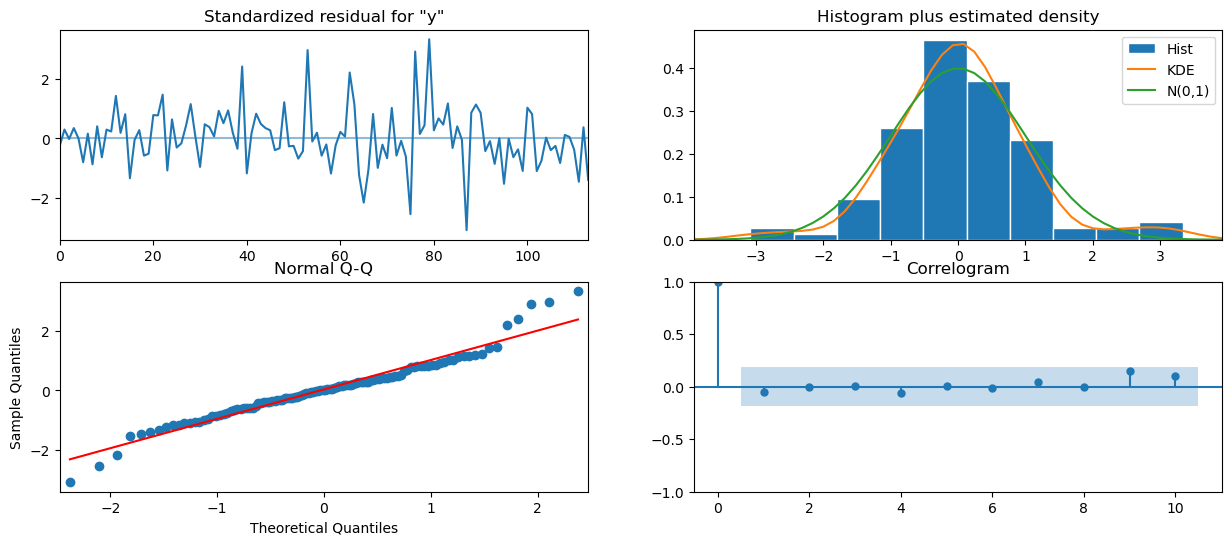

In [121]:
results_auto_SARIMA_6.plot_diagnostics()
plt.show()

From the model diagnostics plot, we can see that all the individual diagnostics plots almost follow the theoretical numbers and thus we cannot develop any pattern from these plots.

Predict on the Test Set using this model and evaluate the model.

In [122]:
predicted_auto_SARIMA_6 = results_auto_SARIMA_6.get_forecast(steps=len(test))

In [123]:
predicted_auto_SARIMA_6.summary_frame(alpha=0.05).head()

y         mean     mean_se  mean_ci_lower  mean_ci_upper
0  4672.717101  373.045100    3941.562141    5403.872062
1  7093.584066  381.551723    6345.756431    7841.411701
2  1539.812232  381.553795     791.980535    2287.643929
3  1257.084753  385.165282     502.174673    2011.994833
4  1806.805787  385.639395    1050.966461    2562.645112

In [124]:
rmse = mean_squared_error(test['Sparkling'],predicted_auto_SARIMA_6.predicted_mean,squared=False)
print(rmse)

642.8292787212359


In [125]:
temp_resultsDf = pd.DataFrame({'RMSE': [rmse]}
                           ,index=['SARIMA(1,1,2)(2,0,2,6)'])


resultsDf = pd.concat([resultsDf,temp_resultsDf])

resultsDf

RMSE
ARIMA(2,1,2)            1325.166412
ARIMA(3,1,2)            1341.095895
SARIMA(1,1,2)(2,0,2,6)   642.829279

Setting the seasonality as 12 for the second iteration of the auto SARIMA model.

In [126]:
import itertools
p = q = range(0, 3)
d= range(1,2)
D = range(0,1)
pdq = list(itertools.product(p, d, q))
model_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, D, q))]
print('Examples of some parameter combinations for Model...')
for i in range(1,len(pdq)):
    print('Model: {}{}'.format(pdq[i], model_pdq[i]))

Examples of some parameter combinations for Model...
Model: (0, 1, 1)(0, 0, 1, 12)
Model: (0, 1, 2)(0, 0, 2, 12)
Model: (1, 1, 0)(1, 0, 0, 12)
Model: (1, 1, 1)(1, 0, 1, 12)
Model: (1, 1, 2)(1, 0, 2, 12)
Model: (2, 1, 0)(2, 0, 0, 12)
Model: (2, 1, 1)(2, 0, 1, 12)
Model: (2, 1, 2)(2, 0, 2, 12)


In [127]:
SARIMA_AIC = pd.DataFrame(columns=['param','seasonal', 'AIC'])
SARIMA_AIC

Empty DataFrame
Columns: [param, seasonal, AIC]
Index: []

In [128]:
import statsmodels.api as sm

for param in pdq:
    for param_seasonal in model_pdq:
        SARIMA_model = sm.tsa.statespace.SARIMAX(train['Sparkling'].values,
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)
            
        results_SARIMA = SARIMA_model.fit(maxiter=1000)
        print('SARIMA{}x{} - AIC:{}'.format(param, param_seasonal, results_SARIMA.aic))
        SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            1     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  8.51704D+00    |proj g|=  1.11934D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    1      1      3      1     0     0   5.882D-06   8.517D+00
  F =   8.5169957771113900     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
SARIMA(0, 1, 0)x(0, 0, 0, 12) - AIC:2216.4189020489616
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           10

At X0         0 variable

 This problem is unconstrained.
/var/folders/v3/w2fxtj257m992bzz44lcb4p00000gn/T/ipykernel_21988/3271564440.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
 This problem is unconstrained.
/var/folders/v3/w2fxtj257m992bzz44lcb4p00000gn/T/ipykernel_21988/3271564440.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
 This problem is unconstrained.



At iterate    5    f=  6.73011D+00    |proj g|=  3.73221D-04

At iterate   10    f=  6.73003D+00    |proj g|=  6.71815D-03

At iterate   15    f=  6.71639D+00    |proj g|=  1.21521D-01

At iterate   20    f=  6.48355D+00    |proj g|=  2.69655D-02

At iterate   25    f=  6.48271D+00    |proj g|=  3.33662D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     25     28      1     0     0   3.337D-06   6.483D+00
  F =   6.4827111605041896     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
SARIMA(0, 1, 0)x(0, 0, 2, 12) - AIC:1691.5049017310894
RUNNING THE L-BFGS-B CODE

           * * *

Machine preci

/var/folders/v3/w2fxtj257m992bzz44lcb4p00000gn/T/ipykernel_21988/3271564440.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
 This problem is unconstrained.

   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
/var/folders/v3/w2fxtj257m992bzz44lcb4p00000gn/T/ipykernel_21988/3271564440.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
 This problem is unconstrained.
/var/folders/v3/w2fxtj257m992bzz44lcb4p00000gn/T/ipykernel_21988/3271564440.py:13: FutureWarning: The frame.append method is deprecated and will be remov

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  6.16567D+00    |proj g|=  8.32561D-01

At iterate    5    f=  6.13498D+00    |proj g|=  1.16969D-02

At iterate   10    f=  6.13490D+00    |proj g|=  2.46648D-04

At iterate   15    f=  6.13490D+00    |proj g|=  6.47993D-03

At iterate   20    f=  6.13429D+00    |proj g|=  7.64144D-02

At iterate   25    f=  6.12814D+00    |proj g|=  4.60951D-02

At iterate   30    f=  6.12801D+00    |proj g|=  4.25095D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nac

/var/folders/v3/w2fxtj257m992bzz44lcb4p00000gn/T/ipykernel_21988/3271564440.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
 This problem is unconstrained.
/var/folders/v3/w2fxtj257m992bzz44lcb4p00000gn/T/ipykernel_21988/3271564440.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  6.19828D+00    |proj g|=  2.21412D-02

At iterate    5    f=  6.19619D+00    |proj g|=  9.36854D-02

At iterate   10    f=  6.19379D+00    |proj g|=  1.58806D-04

At iterate   15    f=  6.19378D+00    |proj g|=  4.82155D-03

At iterate   20    f=  6.19309D+00    |proj g|=  6.05071D-02

At iterate   25    f=  6.19126D+00    |proj g|=  7.15202D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     27     42      1     0     0   


   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
/var/folders/v3/w2fxtj257m992bzz44lcb4p00000gn/T/ipykernel_21988/3271564440.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
 This problem is unconstrained.


SARIMA(0, 1, 0)x(2, 0, 1, 12) - AIC:1617.726854733075
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  6.14592D+00    |proj g|=  4.38098D-01

At iterate    5    f=  6.12337D+00    |proj g|=  1.24495D-02

At iterate   10    f=  6.12334D+00    |proj g|=  1.26937D-02

At iterate   15    f=  6.12332D+00    |proj g|=  1.67786D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     16     19      1     0     0   1.678D-04   6.123D+00
  F =   6.1233167921489180     

CONVERGENCE: RE

/var/folders/v3/w2fxtj257m992bzz44lcb4p00000gn/T/ipykernel_21988/3271564440.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
 This problem is unconstrained.
/var/folders/v3/w2fxtj257m992bzz44lcb4p00000gn/T/ipykernel_21988/3271564440.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
 This problem is unconstrained.



At iterate    5    f=  7.39511D+00    |proj g|=  3.61045D-04

At iterate   10    f=  7.37714D+00    |proj g|=  2.85686D-02
  ys=-1.286E-02  -gs= 1.698E-03 BFGS update SKIPPED

At iterate   15    f=  7.37352D+00    |proj g|=  6.23255D-02

At iterate   20    f=  7.25327D+00    |proj g|=  1.12339D-01

At iterate   25    f=  7.24074D+00    |proj g|=  9.33802D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     29     47      1     1     0   5.274D-07   7.241D+00
  F =   7.2407187669264097     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
SARIMA(0, 1, 1)x(0, 0, 1, 12) - AIC:1888.5868794008666
RUNNIN

/var/folders/v3/w2fxtj257m992bzz44lcb4p00000gn/T/ipykernel_21988/3271564440.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
 This problem is unconstrained.



At iterate    5    f=  6.56685D+00    |proj g|=  2.76610D-02
  ys=-3.386E-03  -gs= 2.644E-03 BFGS update SKIPPED

At iterate   10    f=  6.56601D+00    |proj g|=  4.16285D-04

At iterate   15    f=  6.56595D+00    |proj g|=  5.49933D-03

At iterate   20    f=  6.55406D+00    |proj g|=  1.76469D-01

At iterate   25    f=  6.35985D+00    |proj g|=  3.38461D-02

At iterate   30    f=  6.34939D+00    |proj g|=  1.12229D-02

At iterate   35    f=  6.34907D+00    |proj g|=  1.70857D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     38     68      1     1     0   5.759D-07   6.349D+00
  F =   6.3490677152234687     

/var/folders/v3/w2fxtj257m992bzz44lcb4p00000gn/T/ipykernel_21988/3271564440.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
 This problem is unconstrained.
/var/folders/v3/w2fxtj257m992bzz44lcb4p00000gn/T/ipykernel_21988/3271564440.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
 This problem is unconstrained.



At iterate   20    f=  6.79679D+00    |proj g|=  2.58526D-01

At iterate   25    f=  6.77752D+00    |proj g|=  3.15747D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     27     39      1     0     0   7.127D-06   6.778D+00
  F =   6.7775207881336810     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
SARIMA(0, 1, 1)x(1, 0, 0, 12) - AIC:1768.1554049147571
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  7.24350D+00    |proj g|=  4.71462D-02

At iterate    

/var/folders/v3/w2fxtj257m992bzz44lcb4p00000gn/T/ipykernel_21988/3271564440.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
 This problem is unconstrained.



At iterate    5    f=  6.48754D+00    |proj g|=  2.24617D-02

At iterate   10    f=  6.48096D+00    |proj g|=  3.61626D-03

At iterate   15    f=  6.48091D+00    |proj g|=  6.41360D-04

At iterate   20    f=  6.48067D+00    |proj g|=  1.49192D-02

At iterate   25    f=  6.46771D+00    |proj g|=  1.36551D-01

At iterate   30    f=  6.07794D+00    |proj g|=  7.11946D-01

At iterate   35    f=  5.91453D+00    |proj g|=  2.45452D-01

At iterate   40    f=  5.87048D+00    |proj g|=  2.10781D-02

At iterate   45    f=  5.87046D+00    |proj g|=  1.34117D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     47     60   

/var/folders/v3/w2fxtj257m992bzz44lcb4p00000gn/T/ipykernel_21988/3271564440.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
 This problem is unconstrained.



At iterate   15    f=  6.56210D+00    |proj g|=  2.69284D-01

At iterate   20    f=  6.06786D+00    |proj g|=  6.79821D-01

At iterate   25    f=  6.02792D+00    |proj g|=  5.17637D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     28     38      1     0     0   3.286D-06   6.028D+00
  F =   6.0278834367683656     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
SARIMA(0, 1, 1)x(2, 0, 0, 12) - AIC:1575.249693559775
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0

/var/folders/v3/w2fxtj257m992bzz44lcb4p00000gn/T/ipykernel_21988/3271564440.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
 This problem is unconstrained.



At iterate    5    f=  6.60446D+00    |proj g|=  1.26030D-02

At iterate   10    f=  6.60434D+00    |proj g|=  5.42387D-04

At iterate   15    f=  6.60359D+00    |proj g|=  1.42445D-02

At iterate   20    f=  6.53394D+00    |proj g|=  2.10799D-01

At iterate   25    f=  6.02777D+00    |proj g|=  3.50894D-01

At iterate   30    f=  5.98054D+00    |proj g|=  2.33883D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     34     44      1     0     0   8.353D-06   5.980D+00
  F =   5.9804420696370340     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
SARIMA(0, 1, 1)x(2, 0, 1, 12) - AIC:1564.9149381056

/var/folders/v3/w2fxtj257m992bzz44lcb4p00000gn/T/ipykernel_21988/3271564440.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
 This problem is unconstrained.



At iterate    5    f=  6.48484D+00    |proj g|=  2.32246D-02

At iterate   10    f=  6.47726D+00    |proj g|=  3.18229D-03

At iterate   15    f=  6.47723D+00    |proj g|=  3.41651D-03

At iterate   20    f=  6.47716D+00    |proj g|=  5.26321D-03

At iterate   25    f=  6.47286D+00    |proj g|=  5.23312D-02

At iterate   30    f=  6.18162D+00    |proj g|=  5.11047D-01

At iterate   35    f=  5.93914D+00    |proj g|=  8.97212D-01

At iterate   40    f=  5.87242D+00    |proj g|=  8.48378D-02

At iterate   45    f=  5.86333D+00    |proj g|=  6.57786D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     49     57   

/var/folders/v3/w2fxtj257m992bzz44lcb4p00000gn/T/ipykernel_21988/3271564440.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
 This problem is unconstrained.
/var/folders/v3/w2fxtj257m992bzz44lcb4p00000gn/T/ipykernel_21988/3271564440.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
 This problem is unconstrained.



At iterate   20    f=  7.23958D+00    |proj g|=  1.22215D-01

At iterate   25    f=  7.16449D+00    |proj g|=  1.85361D-01

At iterate   30    f=  7.09875D+00    |proj g|=  2.64700D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     33     50      1     0     0   3.304D-06   7.099D+00
  F =   7.0987489093795526     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
SARIMA(0, 1, 2)x(0, 0, 1, 12) - AIC:1853.6747164386836
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    

/var/folders/v3/w2fxtj257m992bzz44lcb4p00000gn/T/ipykernel_21988/3271564440.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
 This problem is unconstrained.



At iterate   10    f=  6.47590D+00    |proj g|=  8.14447D-04

At iterate   15    f=  6.47586D+00    |proj g|=  2.88038D-03

At iterate   20    f=  6.47249D+00    |proj g|=  3.22020D-02

At iterate   25    f=  6.30473D+00    |proj g|=  2.83907D-01

At iterate   30    f=  6.24234D+00    |proj g|=  9.95161D-02

At iterate   35    f=  6.21061D+00    |proj g|=  3.56637D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     37     48      1     0     0   2.007D-04   6.211D+00
  F =   6.2106050407871241     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
SARIMA(0, 1, 2)x(0, 0, 2, 12) - AIC:1624.7573106046

/var/folders/v3/w2fxtj257m992bzz44lcb4p00000gn/T/ipykernel_21988/3271564440.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
 This problem is unconstrained.
/var/folders/v3/w2fxtj257m992bzz44lcb4p00000gn/T/ipykernel_21988/3271564440.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
 This problem is unconstrained.



At iterate    5    f=  7.35738D+00    |proj g|=  5.95237D-04

At iterate   10    f=  7.35696D+00    |proj g|=  6.08585D-03

At iterate   15    f=  7.32372D+00    |proj g|=  8.50227D-02

At iterate   20    f=  6.92535D+00    |proj g|=  3.74980D-01

At iterate   25    f=  6.74167D+00    |proj g|=  4.46307D-02

At iterate   30    f=  6.74124D+00    |proj g|=  1.42029D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     30     42      1     0     0   1.420D-06   6.741D+00
  F =   6.7412371442436081     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
SARIMA(0, 1, 2)x(1, 0, 0, 12) - AIC:1760.7216575033

/var/folders/v3/w2fxtj257m992bzz44lcb4p00000gn/T/ipykernel_21988/3271564440.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
 This problem is unconstrained.



At iterate   15    f=  6.40543D+00    |proj g|=  9.39543D-04

At iterate   20    f=  6.40436D+00    |proj g|=  1.76754D-02

At iterate   25    f=  6.34032D+00    |proj g|=  1.15731D+00

At iterate   30    f=  5.88715D+00    |proj g|=  3.64758D-01

At iterate   35    f=  5.85567D+00    |proj g|=  1.08899D-01

At iterate   40    f=  5.83644D+00    |proj g|=  1.98152D-01

At iterate   45    f=  5.83156D+00    |proj g|=  1.63352D-02

At iterate   50    f=  5.82887D+00    |proj g|=  9.61236D-03

At iterate   55    f=  5.82513D+00    |proj g|=  1.01503D-01

At iterate   60    f=  5.82317D+00    |proj g|=  6.79947D-02

At iterate   65    f=  5.82150D+00    |proj g|=  1.74931D-02

At iterate   70    f=  5.82085D+00    |proj g|=  1.88287D-02

At iterate   75    f=  5.82010D+00    |proj g|=  3.31609D-02

At iterate   80    f=  5.81941D+00    |proj g|=  5.41894D-02

At iterate   85    f=  5.81907D+00    |proj g|=  1.80378D-02

At iterate   90    f=  5.81894D+00    |proj g|=  1.63930D-02

At iter

/var/folders/v3/w2fxtj257m992bzz44lcb4p00000gn/T/ipykernel_21988/3271564440.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
 This problem is unconstrained.



At iterate   10    f=  6.59277D+00    |proj g|=  6.52750D-04

At iterate   15    f=  6.59242D+00    |proj g|=  4.02610D-03

At iterate   20    f=  6.55501D+00    |proj g|=  1.19233D-01

At iterate   25    f=  6.10470D+00    |proj g|=  9.04511D-01

At iterate   30    f=  6.01251D+00    |proj g|=  6.37589D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     34     44      1     0     0   1.739D-05   6.012D+00
  F =   6.0124379802468448     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
SARIMA(0, 1, 2)x(2, 0, 0, 12) - AIC:1573.2338748641796
RUNNING THE L-BFGS-B CODE

           * * *

Machine preci

/var/folders/v3/w2fxtj257m992bzz44lcb4p00000gn/T/ipykernel_21988/3271564440.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
 This problem is unconstrained.



At iterate    5    f=  6.59249D+00    |proj g|=  9.13491D-03

At iterate   10    f=  6.59127D+00    |proj g|=  9.77180D-04

At iterate   15    f=  6.59120D+00    |proj g|=  2.91122D-03

At iterate   20    f=  6.58698D+00    |proj g|=  4.98238D-02

At iterate   25    f=  6.50489D+00    |proj g|=  1.73606D-01

At iterate   30    f=  6.16341D+00    |proj g|=  1.56388D-01

At iterate   35    f=  6.06928D+00    |proj g|=  1.53751D-01

At iterate   40    f=  5.98058D+00    |proj g|=  6.77029D-02

At iterate   45    f=  5.97981D+00    |proj g|=  1.37175D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     46     58   

/var/folders/v3/w2fxtj257m992bzz44lcb4p00000gn/T/ipykernel_21988/3271564440.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  6.43089D+00    |proj g|=  1.71722D-01

At iterate    5    f=  6.40529D+00    |proj g|=  1.73483D-02

At iterate   10    f=  6.40218D+00    |proj g|=  7.13388D-03

At iterate   15    f=  6.40213D+00    |proj g|=  1.96075D-03

At iterate   20    f=  6.40206D+00    |proj g|=  1.25277D-03

At iterate   25    f=  6.40032D+00    |proj g|=  2.67714D-02

At iterate   30    f=  6.36890D+00    |proj g|=  7.18623D-02

At iterate   35    f=  6.13146D+00    |proj g|=  3.55565D-01

At iterate   40    f=  5.84790D+00    |proj g|=  4.35238D-01

At iterate   45    f=  5.81749D+00    |proj g|=  7.98644D-02

At iterate   50    f=  5.80735D+00    |proj g|=  9.50658D-02

At iterate   55    f=  5.80666D+00    |proj g|=  2.86962D-02

At iterate   60    f=  5.80657D+00    |proj g|=  1.08180D-03

At iterate   65    f=  5.8

/var/folders/v3/w2fxtj257m992bzz44lcb4p00000gn/T/ipykernel_21988/3271564440.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
 This problem is unconstrained.
/var/folders/v3/w2fxtj257m992bzz44lcb4p00000gn/T/ipykernel_21988/3271564440.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  7.47211D+00    |proj g|=  2.09291D-02

At iterate    5    f=  7.47169D+00    |proj g|=  3.36734D-03

At iterate   10    f=  7.46465D+00    |proj g|=  7.13611D-02

At iterate   15    f=  7.37394D+00    |proj g|=  1.02438D-01

At iterate   20    f=  7.35830D+00    |proj g|=  8.78922D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     22     30      1     0     0   1.201D-06   7.358D+00
  F =   7.3583001872330618     

CONVERG

/var/folders/v3/w2fxtj257m992bzz44lcb4p00000gn/T/ipykernel_21988/3271564440.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
 This problem is unconstrained.



At iterate    5    f=  6.65339D+00    |proj g|=  3.88234D-04

At iterate   10    f=  6.65333D+00    |proj g|=  4.05197D-03

At iterate   15    f=  6.64546D+00    |proj g|=  5.69181D-02

At iterate   20    f=  6.48238D+00    |proj g|=  9.08273D-02

At iterate   25    f=  6.46880D+00    |proj g|=  9.83645D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     26     29      1     0     0   1.638D-06   6.469D+00
  F =   6.4688000455988330     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
SARIMA(1, 1, 0)x(0, 0, 2, 12) - AIC:1689.8880118556965


/var/folders/v3/w2fxtj257m992bzz44lcb4p00000gn/T/ipykernel_21988/3271564440.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  7.32444D+00    |proj g|=  2.20777D-02

At iterate    5    f=  7.32265D+00    |proj g|=  1.55311D-03

At iterate   10    f=  7.31940D+00    |proj g|=  2.89077D-02

At iterate   15    f=  7.13278D+00    |proj g|=  5.40778D-01

At iterate   20    f=  6.83097D+00    |proj g|=  1.41779D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     23     30      1     0     0   1.016D-05   6.831D+00
  F =   6.8308625005319934     

CONVERG

/var/folders/v3/w2fxtj257m992bzz44lcb4p00000gn/T/ipykernel_21988/3271564440.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  7.31706D+00    |proj g|=  4.34134D-02

At iterate    5    f=  7.31395D+00    |proj g|=  7.59897D-04

At iterate   10    f=  7.31393D+00    |proj g|=  1.77759D-03

At iterate   15    f=  7.31289D+00    |proj g|=  4.87491D-02

At iterate   20    f=  7.21995D+00    |proj g|=  2.72500D-01

At iterate   25    f=  6.79324D+00    |proj g|=  2.74193D-01

At iterate   30    f=  6.73595D+00    |proj g|=  6.22734D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nac

/var/folders/v3/w2fxtj257m992bzz44lcb4p00000gn/T/ipykernel_21988/3271564440.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
 This problem is unconstrained.



At iterate    5    f=  6.56184D+00    |proj g|=  1.08053D-02

At iterate   10    f=  6.56084D+00    |proj g|=  6.94236D-04

At iterate   15    f=  6.56083D+00    |proj g|=  2.72378D-03

At iterate   20    f=  6.55890D+00    |proj g|=  3.03068D-02

At iterate   25    f=  6.47797D+00    |proj g|=  1.76897D-01

At iterate   30    f=  6.13502D+00    |proj g|=  9.46794D-01

At iterate   35    f=  6.06640D+00    |proj g|=  1.92475D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     39     56      1     0     0   5.669D-06   6.066D+00
  F =   6.0663567828843235     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL  

/var/folders/v3/w2fxtj257m992bzz44lcb4p00000gn/T/ipykernel_21988/3271564440.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
 This problem is unconstrained.



At iterate   15    f=  6.51502D+00    |proj g|=  1.16378D-01

At iterate   20    f=  6.12382D+00    |proj g|=  2.65759D-01

At iterate   25    f=  6.09621D+00    |proj g|=  2.11173D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     28     38      1     0     0   1.978D-06   6.096D+00
  F =   6.0962120161067475     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
SARIMA(1, 1, 0)x(2, 0, 0, 12) - AIC:1593.0151241877543


/var/folders/v3/w2fxtj257m992bzz44lcb4p00000gn/T/ipykernel_21988/3271564440.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  6.56221D+00    |proj g|=  2.28672D-02

At iterate    5    f=  6.55932D+00    |proj g|=  8.92433D-04

At iterate   10    f=  6.55928D+00    |proj g|=  5.13525D-04

At iterate   15    f=  6.55916D+00    |proj g|=  1.31099D-02

At iterate   20    f=  6.54838D+00    |proj g|=  3.49439D-02

At iterate   25    f=  6.26759D+00    |proj g|=  7.24593D-01

At iterate   30    f=  6.06921D+00    |proj g|=  4.49982D-02

At iterate   35    f=  6.06839D+00    |proj g|=  2.03653D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function 

/var/folders/v3/w2fxtj257m992bzz44lcb4p00000gn/T/ipykernel_21988/3271564440.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
 This problem is unconstrained.



At iterate   10    f=  6.55783D+00    |proj g|=  5.15856D-04

At iterate   15    f=  6.55774D+00    |proj g|=  1.47065D-03

At iterate   20    f=  6.55415D+00    |proj g|=  3.47552D-02

At iterate   25    f=  6.40833D+00    |proj g|=  2.12901D-01

At iterate   30    f=  6.17202D+00    |proj g|=  5.18959D-01

At iterate   35    f=  6.08852D+00    |proj g|=  6.01929D-02

At iterate   40    f=  6.05800D+00    |proj g|=  3.05591D-02

At iterate   45    f=  6.05789D+00    |proj g|=  4.45845D-03

At iterate   50    f=  6.05787D+00    |proj g|=  5.61323D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     50     63   

/var/folders/v3/w2fxtj257m992bzz44lcb4p00000gn/T/ipykernel_21988/3271564440.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
 This problem is unconstrained.
/var/folders/v3/w2fxtj257m992bzz44lcb4p00000gn/T/ipykernel_21988/3271564440.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
 This problem is unconstrained.



At iterate   25    f=  7.22254D+00    |proj g|=  3.50623D-01

At iterate   30    f=  7.17276D+00    |proj g|=  7.93400D-02

At iterate   35    f=  7.17002D+00    |proj g|=  2.68401D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     37     47      1     0     0   2.856D-05   7.170D+00
  F =   7.1700220350481700     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
SARIMA(1, 1, 1)x(0, 0, 1, 12) - AIC:1872.2057291125243
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    

/var/folders/v3/w2fxtj257m992bzz44lcb4p00000gn/T/ipykernel_21988/3271564440.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
 This problem is unconstrained.



At iterate    5    f=  6.53796D+00    |proj g|=  5.87857D-02

At iterate   10    f=  6.53606D+00    |proj g|=  5.09301D-03

At iterate   15    f=  6.53599D+00    |proj g|=  9.18618D-04

At iterate   20    f=  6.53595D+00    |proj g|=  1.37179D-02

At iterate   25    f=  6.53168D+00    |proj g|=  1.28625D-01

At iterate   30    f=  6.37457D+00    |proj g|=  3.93106D-01

At iterate   35    f=  6.29051D+00    |proj g|=  4.12283D-02

At iterate   40    f=  6.28892D+00    |proj g|=  1.85311D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     42     52      1     0     0   2.780D-05   6.289D+00
  F =   6.28891936618

/var/folders/v3/w2fxtj257m992bzz44lcb4p00000gn/T/ipykernel_21988/3271564440.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
 This problem is unconstrained.



At iterate   20    f=  7.23105D+00    |proj g|=  3.71999D-02

At iterate   25    f=  7.02566D+00    |proj g|=  4.02142D-01

At iterate   30    f=  6.84763D+00    |proj g|=  5.96036D-02

At iterate   35    f=  6.68479D+00    |proj g|=  5.28830D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     39     63      1     0     0   9.146D-06   6.685D+00
  F =   6.6847737704622805     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
SARIMA(1, 1, 1)x(1, 0, 0, 12) - AIC:1746.041180320193
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0 

/var/folders/v3/w2fxtj257m992bzz44lcb4p00000gn/T/ipykernel_21988/3271564440.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
 This problem is unconstrained.



At iterate   10    f=  7.20764D+00    |proj g|=  6.11865D-04

At iterate   15    f=  7.20758D+00    |proj g|=  3.57397D-03

At iterate   20    f=  7.20186D+00    |proj g|=  1.90885D-02

At iterate   25    f=  7.14826D+00    |proj g|=  5.06661D-02

At iterate   30    f=  6.82610D+00    |proj g|=  5.79367D-01

At iterate   35    f=  6.53135D+00    |proj g|=  2.00894D-01

At iterate   40    f=  6.52575D+00    |proj g|=  1.41809D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     41     55      1     0     0   2.199D-04   6.526D+00
  F =   6.5257465307830618     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH   

/var/folders/v3/w2fxtj257m992bzz44lcb4p00000gn/T/ipykernel_21988/3271564440.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
 This problem is unconstrained.



At iterate   10    f=  6.45925D+00    |proj g|=  2.34453D-03

At iterate   15    f=  6.45920D+00    |proj g|=  1.90845D-03

At iterate   20    f=  6.45750D+00    |proj g|=  3.24370D-02

At iterate   25    f=  6.36701D+00    |proj g|=  4.51763D-01

At iterate   30    f=  5.93231D+00    |proj g|=  1.53626D-01

At iterate   35    f=  5.86994D+00    |proj g|=  6.01474D-02

At iterate   40    f=  5.86894D+00    |proj g|=  4.42420D-04



   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
/var/folders/v3/w2fxtj257m992bzz44lcb4p00000gn/T/ipykernel_21988/3271564440.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
 This problem is unconstrained.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     44     61      1     0     0   1.047D-04   5.869D+00
  F =   5.8689435926825659     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
SARIMA(1, 1, 1)x(1, 0, 2, 12) - AIC:1537.9253340974672
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  6.55065D+00    |proj g|=  5.37354D-01

At iterate    5    f=  6.52391D+00    |proj g|=  2.15841D-02

At iterate   10    f=  6.52108D+00    |proj g|=  5.46918D-04

At iterate   1

/var/folders/v3/w2fxtj257m992bzz44lcb4p00000gn/T/ipykernel_21988/3271564440.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
 This problem is unconstrained.



At iterate   10    f=  6.51949D+00    |proj g|=  5.49732D-04

At iterate   15    f=  6.51941D+00    |proj g|=  2.35508D-03

At iterate   20    f=  6.51580D+00    |proj g|=  3.42522D-02

At iterate   25    f=  6.31116D+00    |proj g|=  4.82071D-01

At iterate   30    f=  6.09878D+00    |proj g|=  1.16942D-01

At iterate   35    f=  5.95123D+00    |proj g|=  7.47232D-01

At iterate   40    f=  5.92438D+00    |proj g|=  4.35289D-02

At iterate   45    f=  5.92400D+00    |proj g|=  2.76516D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     46     62      1     0     0   1.942D-06   5.924D+00
  F =   5.92400151424

/var/folders/v3/w2fxtj257m992bzz44lcb4p00000gn/T/ipykernel_21988/3271564440.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
 This problem is unconstrained.



At iterate   10    f=  6.45552D+00    |proj g|=  8.73153D-04

At iterate   15    f=  6.45548D+00    |proj g|=  1.03062D-03

At iterate   20    f=  6.45530D+00    |proj g|=  4.94261D-03

At iterate   25    f=  6.43683D+00    |proj g|=  5.73612D-02

At iterate   30    f=  6.34941D+00    |proj g|=  7.94773D-02

At iterate   35    f=  6.27517D+00    |proj g|=  1.24325D-01

At iterate   40    f=  5.93597D+00    |proj g|=  5.59410D-01

At iterate   45    f=  5.86515D+00    |proj g|=  6.98011D-02

At iterate   50    f=  5.86173D+00    |proj g|=  1.69202D-03

At iterate   55    f=  5.86172D+00    |proj g|=  2.96852D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tn

/var/folders/v3/w2fxtj257m992bzz44lcb4p00000gn/T/ipykernel_21988/3271564440.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
 This problem is unconstrained.
/var/folders/v3/w2fxtj257m992bzz44lcb4p00000gn/T/ipykernel_21988/3271564440.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
 This problem is unconstrained.



At iterate    5    f=  7.27764D+00    |proj g|=  3.15143D-03

At iterate   10    f=  7.27759D+00    |proj g|=  6.44326D-03

At iterate   15    f=  7.27757D+00    |proj g|=  1.07657D-03

At iterate   20    f=  7.27689D+00    |proj g|=  3.46633D-02

At iterate   25    f=  7.23387D+00    |proj g|=  1.38060D-01

At iterate   30    f=  7.09930D+00    |proj g|=  2.67101D-02

At iterate   35    f=  7.09823D+00    |proj g|=  2.07518D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     36     52      1     0     0   1.170D-06   7.098D+00
  F =   7.0982345775167461     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL  

/var/folders/v3/w2fxtj257m992bzz44lcb4p00000gn/T/ipykernel_21988/3271564440.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
 This problem is unconstrained.



At iterate   10    f=  6.47570D+00    |proj g|=  2.36379D-03

At iterate   15    f=  6.47563D+00    |proj g|=  3.48919D-03

At iterate   20    f=  6.47561D+00    |proj g|=  1.77548D-03

At iterate   25    f=  6.47487D+00    |proj g|=  3.48936D-02

At iterate   30    f=  6.43312D+00    |proj g|=  3.00160D-01

At iterate   35    f=  6.28482D+00    |proj g|=  1.10312D-01

At iterate   40    f=  6.21137D+00    |proj g|=  5.25471D-02

At iterate   45    f=  6.21003D+00    |proj g|=  5.94796D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     47     59      1     0     0   5.010D-06   6.210D+00
  F =   6.21002624011

/var/folders/v3/w2fxtj257m992bzz44lcb4p00000gn/T/ipykernel_21988/3271564440.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
 This problem is unconstrained.



At iterate   25    f=  7.24985D+00    |proj g|=  8.12747D-02

At iterate   30    f=  7.15636D+00    |proj g|=  1.26054D-01

At iterate   35    f=  6.94703D+00    |proj g|=  3.54612D-01

At iterate   40    f=  6.69110D+00    |proj g|=  7.44263D-02

At iterate   45    f=  6.67648D+00    |proj g|=  7.75423D-03

At iterate   50    f=  6.66132D+00    |proj g|=  6.32713D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     54     86      1     0     0   1.072D-05   6.661D+00
  F =   6.6613065688500619     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
SARIMA(1, 1, 2)x(1, 0, 0, 12) - AIC:1741.9397079010

/var/folders/v3/w2fxtj257m992bzz44lcb4p00000gn/T/ipykernel_21988/3271564440.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
 This problem is unconstrained.



At iterate   25    f=  7.14132D+00    |proj g|=  1.06958D-01

At iterate   30    f=  6.95712D+00    |proj g|=  2.16319D-01

At iterate   35    f=  6.73815D+00    |proj g|=  9.00013D-01

At iterate   40    f=  6.49335D+00    |proj g|=  1.81910D-01

At iterate   45    f=  6.46803D+00    |proj g|=  2.10891D-02

At iterate   50    f=  6.46484D+00    |proj g|=  3.24295D-02

At iterate   55    f=  6.45780D+00    |proj g|=  2.24820D-01

At iterate   60    f=  6.45675D+00    |proj g|=  3.91323D-03

At iterate   65    f=  6.45674D+00    |proj g|=  1.00247D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     68    103   

/var/folders/v3/w2fxtj257m992bzz44lcb4p00000gn/T/ipykernel_21988/3271564440.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
 This problem is unconstrained.



At iterate   10    f=  6.40463D+00    |proj g|=  1.36861D-03

At iterate   15    f=  6.40402D+00    |proj g|=  7.03712D-03

At iterate   20    f=  6.40364D+00    |proj g|=  5.33377D-04

At iterate   25    f=  6.40317D+00    |proj g|=  1.02982D-02

At iterate   30    f=  6.39248D+00    |proj g|=  1.44880D-01

At iterate   35    f=  6.38404D+00    |proj g|=  1.94351D-02

At iterate   40    f=  6.26980D+00    |proj g|=  9.13174D-01

At iterate   45    f=  5.88905D+00    |proj g|=  3.30588D-01

At iterate   50    f=  5.81180D+00    |proj g|=  3.81098D-01

At iterate   55    f=  5.79995D+00    |proj g|=  2.54346D-02

At iterate   60    f=  5.79981D+00    |proj g|=  7.59452D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F   

/var/folders/v3/w2fxtj257m992bzz44lcb4p00000gn/T/ipykernel_21988/3271564440.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  6.53617D+00    |proj g|=  3.03641D-02

At iterate    5    f=  6.52919D+00    |proj g|=  2.19214D-03

At iterate   10    f=  6.52832D+00    |proj g|=  5.11415D-03

At iterate   15    f=  6.52794D+00    |proj g|=  5.56489D-04

At iterate   20    f=  6.52776D+00    |proj g|=  8.61341D-03

At iterate   25    f=  6.50651D+00    |proj g|=  1.45580D-01

At iterate   30    f=  6.36796D+00    |proj g|=  1.91507D-01

At iterate   35    f=  6.26665D+00    |proj g|=  1.85734D+00

At iterate   40    f=  6.11539D+00    |proj g|=  4.16941D-01

At iterate   45    f=  6.02021D+00    |proj g|=  5.38917D-01

At iterate   50    f=  5.97937D+00    |proj g|=  3.06736D-02

At iterate   55    f=  5.97478D+00    |proj g|=  5.98526D-02

At iterate   60    f=  5.97136D+00    |proj g|=  7.16397D-02

At iterate   65    f=  5.9

/var/folders/v3/w2fxtj257m992bzz44lcb4p00000gn/T/ipykernel_21988/3271564440.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
 This problem is unconstrained.



At iterate   10    f=  6.52742D+00    |proj g|=  9.95980D-03

At iterate   15    f=  6.52694D+00    |proj g|=  2.53398D-03

At iterate   20    f=  6.52684D+00    |proj g|=  5.46246D-04

At iterate   25    f=  6.52190D+00    |proj g|=  3.58999D-02

At iterate   30    f=  6.28151D+00    |proj g|=  3.89068D-01

At iterate   35    f=  6.08409D+00    |proj g|=  2.97989D-01

At iterate   40    f=  6.04043D+00    |proj g|=  1.32375D-01

At iterate   45    f=  6.00001D+00    |proj g|=  6.60631D-02

At iterate   50    f=  5.97793D+00    |proj g|=  6.55865D-02

At iterate   55    f=  5.96463D+00    |proj g|=  3.97277D-02

At iterate   60    f=  5.95856D+00    |proj g|=  2.52550D-02

At iterate   65    f=  5.95586D+00    |proj g|=  1.85959D-02

At iterate   70    f=  5.95278D+00    |proj g|=  1.55130D-02

At iterate   75    f=  5.95122D+00    |proj g|=  9.66575D-03

At iterate   80    f=  5.94999D+00    |proj g|=  1.76809D-02

At iterate   85    f=  5.94882D+00    |proj g|=  6.83863D-03

At iter

/var/folders/v3/w2fxtj257m992bzz44lcb4p00000gn/T/ipykernel_21988/3271564440.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
 This problem is unconstrained.



At iterate   10    f=  6.40136D+00    |proj g|=  1.30690D-03

At iterate   15    f=  6.40091D+00    |proj g|=  5.22932D-03

At iterate   20    f=  6.40042D+00    |proj g|=  8.54113D-04

At iterate   25    f=  6.40021D+00    |proj g|=  6.36532D-03

At iterate   30    f=  6.38227D+00    |proj g|=  6.45998D-02

At iterate   35    f=  6.15972D+00    |proj g|=  1.77504D+00

At iterate   40    f=  5.91392D+00    |proj g|=  3.21959D-01

At iterate   45    f=  5.80039D+00    |proj g|=  6.50943D-02

At iterate   50    f=  5.79791D+00    |proj g|=  1.49636D-02

At iterate   55    f=  5.79540D+00    |proj g|=  4.68920D-02

At iterate   60    f=  5.79165D+00    |proj g|=  2.42323D-02

At iterate   65    f=  5.79131D+00    |proj g|=  2.94476D-03

At iterate   70    f=  5.79130D+00    |proj g|=  8.22732D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates

/var/folders/v3/w2fxtj257m992bzz44lcb4p00000gn/T/ipykernel_21988/3271564440.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
 This problem is unconstrained.
/var/folders/v3/w2fxtj257m992bzz44lcb4p00000gn/T/ipykernel_21988/3271564440.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
 This problem is unconstrained.
/var/folders/v3/w2fxtj257m992bzz44lcb4p00000gn/T/ipykernel_21988/3271564440.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':pa


At iterate    5    f=  6.62069D+00    |proj g|=  4.11903D-04

At iterate   10    f=  6.62066D+00    |proj g|=  3.43159D-03

At iterate   15    f=  6.61659D+00    |proj g|=  4.54083D-02

At iterate   20    f=  6.46179D+00    |proj g|=  2.72876D-01

At iterate   25    f=  6.41790D+00    |proj g|=  3.02016D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     29     36      1     0     0   2.209D-05   6.418D+00
  F =   6.4178888351278092     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
SARIMA(2, 1, 0)x(0, 0, 2, 12) - AIC:1678.6510971332305
RUNNING THE L-BFGS-B CODE

           * * *

Machine preci

/var/folders/v3/w2fxtj257m992bzz44lcb4p00000gn/T/ipykernel_21988/3271564440.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
 This problem is unconstrained.
/var/folders/v3/w2fxtj257m992bzz44lcb4p00000gn/T/ipykernel_21988/3271564440.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
 This problem is unconstrained.



At iterate    5    f=  7.21594D+00    |proj g|=  5.44809D-03

At iterate   10    f=  7.21584D+00    |proj g|=  2.14940D-03

At iterate   15    f=  7.21542D+00    |proj g|=  2.56984D-02

At iterate   20    f=  7.17135D+00    |proj g|=  1.28830D-01

At iterate   25    f=  6.71221D+00    |proj g|=  9.03683D-01

At iterate   30    f=  6.60131D+00    |proj g|=  1.18226D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     34     44      1     0     0   3.304D-05   6.601D+00
  F =   6.6013005150006583     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
SARIMA(2, 1, 0)x(1, 0, 1, 12) - AIC:1726.3381339001

/var/folders/v3/w2fxtj257m992bzz44lcb4p00000gn/T/ipykernel_21988/3271564440.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
 This problem is unconstrained.



At iterate   15    f=  6.52804D+00    |proj g|=  5.39317D-03

At iterate   20    f=  6.49633D+00    |proj g|=  1.94821D-01

At iterate   25    f=  6.09988D+00    |proj g|=  2.16485D-01

At iterate   30    f=  6.00178D+00    |proj g|=  4.07418D-01

At iterate   35    f=  5.99326D+00    |proj g|=  3.68086D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     39     45      1     0     0   1.364D-05   5.993D+00
  F =   5.9932559369459257     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
SARIMA(2, 1, 0)x(1, 0, 2, 12) - AIC:1570.2465436059406
RUNNING THE L-BFGS-B CODE

           * * *

Machine preci

/var/folders/v3/w2fxtj257m992bzz44lcb4p00000gn/T/ipykernel_21988/3271564440.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
 This problem is unconstrained.



At iterate   20    f=  6.00084D+00    |proj g|=  3.64937D-01

At iterate   25    f=  5.97390D+00    |proj g|=  8.84476D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     28     41      1     0     0   5.174D-06   5.974D+00
  F =   5.9738725283994496     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
SARIMA(2, 1, 0)x(2, 0, 0, 12) - AIC:1563.206857383857
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  6.46999D+00    |proj g|=  3.09930D-02


/var/folders/v3/w2fxtj257m992bzz44lcb4p00000gn/T/ipykernel_21988/3271564440.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
 This problem is unconstrained.



At iterate    5    f=  6.46424D+00    |proj g|=  9.99283D-03

At iterate   10    f=  6.46418D+00    |proj g|=  7.39762D-04

At iterate   15    f=  6.46309D+00    |proj g|=  7.58768D-03

At iterate   20    f=  6.39982D+00    |proj g|=  6.88776D-02

At iterate   25    f=  6.00484D+00    |proj g|=  3.05728D-01

At iterate   30    f=  5.94376D+00    |proj g|=  1.95722D-01

At iterate   35    f=  5.94003D+00    |proj g|=  6.80981D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     37     48      1     0     0   5.912D-05   5.940D+00
  F =   5.9400301731454883     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH   

/var/folders/v3/w2fxtj257m992bzz44lcb4p00000gn/T/ipykernel_21988/3271564440.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
 This problem is unconstrained.



At iterate    5    f=  6.46529D+00    |proj g|=  1.92875D-02

At iterate   10    f=  6.46258D+00    |proj g|=  6.24479D-04

At iterate   15    f=  6.46253D+00    |proj g|=  1.05057D-03

At iterate   20    f=  6.46194D+00    |proj g|=  2.84165D-02

At iterate   25    f=  6.40731D+00    |proj g|=  2.19743D-01

At iterate   30    f=  6.09816D+00    |proj g|=  2.59750D-01

At iterate   35    f=  5.92898D+00    |proj g|=  9.85869D-02

At iterate   40    f=  5.92674D+00    |proj g|=  2.96252D-03

At iterate   45    f=  5.92674D+00    |proj g|=  2.02622D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     46     52   

/var/folders/v3/w2fxtj257m992bzz44lcb4p00000gn/T/ipykernel_21988/3271564440.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
 This problem is unconstrained.
/var/folders/v3/w2fxtj257m992bzz44lcb4p00000gn/T/ipykernel_21988/3271564440.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
 This problem is unconstrained.



At iterate   10    f=  7.32881D+00    |proj g|=  7.19655D-04

At iterate   15    f=  7.32869D+00    |proj g|=  1.21265D-02

At iterate   20    f=  7.31275D+00    |proj g|=  1.48548D-01

At iterate   25    f=  7.16848D+00    |proj g|=  3.14293D-01

At iterate   30    f=  7.15766D+00    |proj g|=  6.42698D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     33     42      1     0     0   7.196D-07   7.158D+00
  F =   7.1576626659162539     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
SARIMA(2, 1, 1)x(0, 0, 1, 12) - AIC:1870.992293138226
RUNNING THE L-BFGS-B CODE

           * * *

Machine precis

/var/folders/v3/w2fxtj257m992bzz44lcb4p00000gn/T/ipykernel_21988/3271564440.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
 This problem is unconstrained.



At iterate    5    f=  6.52759D+00    |proj g|=  2.94772D-02

At iterate   10    f=  6.52701D+00    |proj g|=  4.45558D-04

At iterate   15    f=  6.52690D+00    |proj g|=  8.58251D-03

At iterate   20    f=  6.51845D+00    |proj g|=  3.91114D-02

At iterate   25    f=  6.36620D+00    |proj g|=  2.30399D-01

At iterate   30    f=  6.28137D+00    |proj g|=  9.80748D-02

At iterate   35    f=  6.27122D+00    |proj g|=  3.67333D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     36     51      1     0     0   4.808D-06   6.271D+00
  F =   6.2712218012836605     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL  

/var/folders/v3/w2fxtj257m992bzz44lcb4p00000gn/T/ipykernel_21988/3271564440.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
 This problem is unconstrained.



At iterate   15    f=  7.20293D+00    |proj g|=  2.58070D-02

At iterate   20    f=  7.17848D+00    |proj g|=  5.55215D-02

At iterate   25    f=  7.15106D+00    |proj g|=  6.23093D-02

At iterate   30    f=  6.77101D+00    |proj g|=  1.02655D+00

At iterate   35    f=  6.62620D+00    |proj g|=  1.30399D-01

At iterate   40    f=  6.61624D+00    |proj g|=  4.03725D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     43     62      1     0     0   6.422D-05   6.616D+00
  F =   6.6162378369016492     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
SARIMA(2, 1, 1)x(1, 0, 0, 12) - AIC:1730.2218375944

/var/folders/v3/w2fxtj257m992bzz44lcb4p00000gn/T/ipykernel_21988/3271564440.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
 This problem is unconstrained.



At iterate   20    f=  7.18815D+00    |proj g|=  2.16980D-02

At iterate   25    f=  7.14315D+00    |proj g|=  7.53845D-02

At iterate   30    f=  7.00834D+00    |proj g|=  3.39461D-01

At iterate   35    f=  6.56798D+00    |proj g|=  1.40525D-01

At iterate   40    f=  6.51905D+00    |proj g|=  5.00579D-02

At iterate   45    f=  6.51828D+00    |proj g|=  1.51032D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     46     75      1     0     0   1.058D-04   6.518D+00
  F =   6.5182828939986068     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
SARIMA(2, 1, 1)x(1, 0, 1, 12) - AIC:1706.7535524396

/var/folders/v3/w2fxtj257m992bzz44lcb4p00000gn/T/ipykernel_21988/3271564440.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
 This problem is unconstrained.



At iterate    5    f=  6.45332D+00    |proj g|=  1.56046D-02

At iterate   10    f=  6.45091D+00    |proj g|=  1.44000D-03

At iterate   15    f=  6.45087D+00    |proj g|=  5.92658D-03

At iterate   20    f=  6.44725D+00    |proj g|=  3.15190D-02

At iterate   25    f=  6.24235D+00    |proj g|=  1.28210D-01

At iterate   30    f=  5.99706D+00    |proj g|=  2.51766D-01

At iterate   35    f=  5.86674D+00    |proj g|=  7.16510D-02

At iterate   40    f=  5.86289D+00    |proj g|=  7.73899D-03

At iterate   45    f=  5.86287D+00    |proj g|=  2.26473D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     45     55   

/var/folders/v3/w2fxtj257m992bzz44lcb4p00000gn/T/ipykernel_21988/3271564440.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
 This problem is unconstrained.



At iterate    5    f=  6.45113D+00    |proj g|=  6.89653D-03

At iterate   10    f=  6.45039D+00    |proj g|=  5.46556D-04

At iterate   15    f=  6.45004D+00    |proj g|=  4.81268D-03

At iterate   20    f=  6.41026D+00    |proj g|=  1.02460D-01

At iterate   25    f=  6.06094D+00    |proj g|=  4.80794D-01

At iterate   30    f=  5.90454D+00    |proj g|=  3.12523D-02

At iterate   35    f=  5.90280D+00    |proj g|=  1.96278D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     37     51      1     0     0   6.710D-06   5.903D+00
  F =   5.9028041130036364     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL  

/var/folders/v3/w2fxtj257m992bzz44lcb4p00000gn/T/ipykernel_21988/3271564440.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  6.45880D+00    |proj g|=  3.81407D-02

At iterate    5    f=  6.44968D+00    |proj g|=  4.95053D-03

At iterate   10    f=  6.44897D+00    |proj g|=  8.15578D-04

At iterate   15    f=  6.44875D+00    |proj g|=  5.81451D-03

At iterate   20    f=  6.44597D+00    |proj g|=  1.39927D-02

At iterate   25    f=  6.34415D+00    |proj g|=  3.15280D-01

At iterate   30    f=  6.27076D+00    |proj g|=  1.55445D-01

At iterate   35    f=  6.07126D+00    |proj g|=  3.45388D-01

At iterate   40    f=  5.97066D+00    |proj g|=  8.70461D-02

At iterate   45    f=  5.94830D+00    |proj g|=  6.16865D-01

At iterate   50    f=  5.90187D+00    |proj g|=  2.74852D-01

At iterate   55    f=  5.87821D+00    |proj g|=  2.17476D-01

At iterate   60    f=  5.87530D+00    |proj g|=  1.11872D-01

At iterate   65    f=  5.8


   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     78    111      1     0     0   6.435D-05   5.864D+00
  F =   5.8643347960267462     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
SARIMA(2, 1, 1)x(2, 0, 1, 12) - AIC:1538.727046966954
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            8     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  6.48046D+00    |proj g|=  1.74887D-01


/var/folders/v3/w2fxtj257m992bzz44lcb4p00000gn/T/ipykernel_21988/3271564440.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
 This problem is unconstrained.



At iterate    5    f=  6.45099D+00    |proj g|=  1.76678D-02

At iterate   10    f=  6.44740D+00    |proj g|=  5.51759D-04

At iterate   15    f=  6.44735D+00    |proj g|=  5.51828D-04

At iterate   20    f=  6.44678D+00    |proj g|=  6.97336D-03

At iterate   25    f=  6.40208D+00    |proj g|=  6.08727D-02

At iterate   30    f=  6.17821D+00    |proj g|=  3.57919D-01

At iterate   35    f=  6.03577D+00    |proj g|=  3.25989D-01

At iterate   40    f=  5.96554D+00    |proj g|=  3.33022D-01

At iterate   45    f=  5.94808D+00    |proj g|=  8.59101D-02

At iterate   50    f=  5.88534D+00    |proj g|=  1.79369D-01

At iterate   55    f=  5.85708D+00    |proj g|=  4.50632D-02

At iterate   60    f=  5.85487D+00    |proj g|=  6.47216D-04

At iterate   65    f=  5.85487D+00    |proj g|=  6.18841D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates

/var/folders/v3/w2fxtj257m992bzz44lcb4p00000gn/T/ipykernel_21988/3271564440.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
 This problem is unconstrained.



At iterate    5    f=  8.23553D+00    |proj g|=  3.57886D-03

At iterate   10    f=  8.21530D+00    |proj g|=  3.69390D-01

At iterate   15    f=  8.19777D+00    |proj g|=  8.34468D-02

At iterate   20    f=  8.19512D+00    |proj g|=  5.04392D-02

At iterate   25    f=  8.19488D+00    |proj g|=  2.54201D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     25     48      1     0     0   2.542D-04   8.195D+00
  F =   8.1948822912863157     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
SARIMA(2, 1, 2)x(0, 0, 0, 12) - AIC:2140.669395734442
RUNNING THE L-BFGS-B CODE

           * * *

Machine precis

/var/folders/v3/w2fxtj257m992bzz44lcb4p00000gn/T/ipykernel_21988/3271564440.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
 This problem is unconstrained.



At iterate    5    f=  7.27739D+00    |proj g|=  1.53893D-02

At iterate   10    f=  7.27721D+00    |proj g|=  1.83597D-03

At iterate   15    f=  7.27696D+00    |proj g|=  2.39828D-03

At iterate   20    f=  7.27695D+00    |proj g|=  4.24916D-04

At iterate   25    f=  7.27676D+00    |proj g|=  2.33298D-02

At iterate   30    f=  7.25071D+00    |proj g|=  3.04422D-01

At iterate   35    f=  7.11360D+00    |proj g|=  4.41516D-01

At iterate   40    f=  7.10005D+00    |proj g|=  2.89548D-03

At iterate   45    f=  7.09997D+00    |proj g|=  6.73944D-02

At iterate   50    f=  7.09798D+00    |proj g|=  7.08965D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tn

/var/folders/v3/w2fxtj257m992bzz44lcb4p00000gn/T/ipykernel_21988/3271564440.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
 This problem is unconstrained.



At iterate    5    f=  6.47584D+00    |proj g|=  9.67239D-03

At iterate   10    f=  6.47534D+00    |proj g|=  5.05829D-03

At iterate   15    f=  6.47500D+00    |proj g|=  3.43553D-03

At iterate   20    f=  6.47498D+00    |proj g|=  7.30113D-04

At iterate   25    f=  6.47409D+00    |proj g|=  1.30615D-02

At iterate   30    f=  6.44134D+00    |proj g|=  5.11602D-02

At iterate   35    f=  6.36257D+00    |proj g|=  2.94062D-01

At iterate   40    f=  6.23889D+00    |proj g|=  7.07061D-01

At iterate   45    f=  6.22080D+00    |proj g|=  6.18301D-03

At iterate   50    f=  6.22076D+00    |proj g|=  9.19121D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tn


   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
/var/folders/v3/w2fxtj257m992bzz44lcb4p00000gn/T/ipykernel_21988/3271564440.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  7.22975D+00    |proj g|=  3.61288D-02

At iterate    5    f=  7.22231D+00    |proj g|=  3.29793D-03


 This problem is unconstrained.



At iterate   10    f=  7.22220D+00    |proj g|=  1.36612D-03

At iterate   15    f=  7.21949D+00    |proj g|=  2.51187D-02

At iterate   20    f=  7.21861D+00    |proj g|=  2.04223D-03

At iterate   25    f=  7.20957D+00    |proj g|=  4.05460D-02

At iterate   30    f=  6.98261D+00    |proj g|=  8.53360D-01

At iterate   35    f=  6.80161D+00    |proj g|=  3.87696D-01

At iterate   40    f=  6.79028D+00    |proj g|=  5.30582D-02

At iterate   45    f=  6.72315D+00    |proj g|=  7.72659D-01

At iterate   50    f=  6.61346D+00    |proj g|=  1.98098D-01

At iterate   55    f=  6.59857D+00    |proj g|=  1.98143D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tn

/var/folders/v3/w2fxtj257m992bzz44lcb4p00000gn/T/ipykernel_21988/3271564440.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
 This problem is unconstrained.



At iterate   15    f=  7.15248D+00    |proj g|=  2.31447D-03

At iterate   20    f=  7.15236D+00    |proj g|=  1.75582D-03

At iterate   25    f=  7.14140D+00    |proj g|=  5.72630D-02

At iterate   30    f=  7.12268D+00    |proj g|=  6.48517D-02

At iterate   35    f=  7.09556D+00    |proj g|=  8.40418D-02

At iterate   40    f=  7.04398D+00    |proj g|=  2.42990D-01

At iterate   45    f=  6.79828D+00    |proj g|=  7.71644D-01

At iterate   50    f=  6.50034D+00    |proj g|=  4.80718D-01

At iterate   55    f=  6.45356D+00    |proj g|=  7.39999D-02

At iterate   60    f=  6.45339D+00    |proj g|=  2.66987D-03

At iterate   65    f=  6.45337D+00    |proj g|=  3.71666D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F   

/var/folders/v3/w2fxtj257m992bzz44lcb4p00000gn/T/ipykernel_21988/3271564440.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
 This problem is unconstrained.



At iterate   10    f=  6.40316D+00    |proj g|=  1.79351D-03

At iterate   15    f=  6.40270D+00    |proj g|=  1.43487D-02

At iterate   20    f=  6.40225D+00    |proj g|=  5.34149D-04

At iterate   25    f=  6.40200D+00    |proj g|=  3.81865D-03

At iterate   30    f=  6.37880D+00    |proj g|=  1.19536D-01

At iterate   35    f=  6.12786D+00    |proj g|=  2.19133D-01

At iterate   40    f=  5.98596D+00    |proj g|=  2.86340D-01

At iterate   45    f=  5.81201D+00    |proj g|=  1.39588D-01

At iterate   50    f=  5.81069D+00    |proj g|=  1.05820D-02

At iterate   55    f=  5.80227D+00    |proj g|=  7.25042D-02

At iterate   60    f=  5.79837D+00    |proj g|=  1.82080D-02

At iterate   65    f=  5.79817D+00    |proj g|=  1.70604D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized 

/var/folders/v3/w2fxtj257m992bzz44lcb4p00000gn/T/ipykernel_21988/3271564440.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
 This problem is unconstrained.



At iterate   10    f=  6.46481D+00    |proj g|=  3.05852D-03

At iterate   15    f=  6.46387D+00    |proj g|=  3.88233D-03

At iterate   20    f=  6.46377D+00    |proj g|=  5.39545D-04

At iterate   25    f=  6.46264D+00    |proj g|=  2.04700D-02

At iterate   30    f=  6.24861D+00    |proj g|=  2.59092D-01

At iterate   35    f=  5.94875D+00    |proj g|=  3.93141D-01

At iterate   40    f=  5.91677D+00    |proj g|=  3.61706D-01

At iterate   45    f=  5.90855D+00    |proj g|=  1.29750D-01

At iterate   50    f=  5.90739D+00    |proj g|=  4.89158D-03

At iterate   55    f=  5.90712D+00    |proj g|=  1.34407D-02

At iterate   60    f=  5.89471D+00    |proj g|=  7.79078D-02

At iterate   65    f=  5.89014D+00    |proj g|=  1.17217D-02

At iterate   70    f=  5.88995D+00    |proj g|=  1.87635D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates

/var/folders/v3/w2fxtj257m992bzz44lcb4p00000gn/T/ipykernel_21988/3271564440.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
 This problem is unconstrained.



At iterate   10    f=  6.46307D+00    |proj g|=  9.09415D-03

At iterate   15    f=  6.46252D+00    |proj g|=  2.14467D-03

At iterate   20    f=  6.46248D+00    |proj g|=  5.41818D-04

At iterate   25    f=  6.46236D+00    |proj g|=  4.06829D-03

At iterate   30    f=  6.45807D+00    |proj g|=  3.80888D-02

At iterate   35    f=  6.33421D+00    |proj g|=  1.81605D-01

At iterate   40    f=  6.06857D+00    |proj g|=  1.59060D-01

At iterate   45    f=  5.87841D+00    |proj g|=  3.05576D-01

At iterate   50    f=  5.86732D+00    |proj g|=  2.78998D-02

At iterate   55    f=  5.86509D+00    |proj g|=  6.76875D-03

At iterate   60    f=  5.86508D+00    |proj g|=  6.79233D-03

At iterate   65    f=  5.86292D+00    |proj g|=  1.12423D-01

At iterate   70    f=  5.85871D+00    |proj g|=  4.49782D-02

At iterate   75    f=  5.85789D+00    |proj g|=  1.75514D-02

At iterate   80    f=  5.85784D+00    |proj g|=  5.11258D-03

At iterate   85    f=  5.85784D+00    |proj g|=  1.65527D-03

At iter

/var/folders/v3/w2fxtj257m992bzz44lcb4p00000gn/T/ipykernel_21988/3271564440.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
 This problem is unconstrained.



At iterate   10    f=  6.39988D+00    |proj g|=  1.16366D-03

At iterate   15    f=  6.39960D+00    |proj g|=  5.76323D-03

At iterate   20    f=  6.39913D+00    |proj g|=  5.91003D-03

At iterate   25    f=  6.39877D+00    |proj g|=  1.48688D-03

At iterate   30    f=  6.39874D+00    |proj g|=  5.38154D-04

At iterate   35    f=  6.39802D+00    |proj g|=  1.32500D-02

At iterate   40    f=  6.37226D+00    |proj g|=  3.65126D-02

At iterate   45    f=  6.24130D+00    |proj g|=  2.11578D-01

At iterate   50    f=  6.09444D+00    |proj g|=  1.14852D+00

At iterate   55    f=  6.00218D+00    |proj g|=  6.38649D-01

At iterate   60    f=  5.87649D+00    |proj g|=  1.90800D-01

At iterate   65    f=  5.81194D+00    |proj g|=  5.93388D-02

At iterate   70    f=  5.81133D+00    |proj g|=  1.23647D-02

At iterate   75    f=  5.81116D+00    |proj g|=  1.37604D-02

At iterate   80    f=  5.81104D+00    |proj g|=  2.07599D-03

At iterate   85    f=  5.81101D+00    |proj g|=  2.36288D-03

At iter

/var/folders/v3/w2fxtj257m992bzz44lcb4p00000gn/T/ipykernel_21988/3271564440.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


In [129]:
SARIMA_AIC.sort_values(by=['AIC']).head()

param       seasonal          AIC
53  (1, 1, 2)  (2, 0, 2, 12)  1521.737957
50  (1, 1, 2)  (1, 0, 2, 12)  1521.949483
80  (2, 1, 2)  (2, 0, 2, 12)  1523.208356
77  (2, 1, 2)  (1, 0, 2, 12)  1523.524949
26  (0, 1, 2)  (2, 0, 2, 12)  1523.707297

In [130]:
import statsmodels.api as sm

auto_SARIMA_12 = sm.tsa.statespace.SARIMAX(train['Sparkling'].values,
                                order=(1, 1, 2),
                                seasonal_order=(2, 0, 2, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results_auto_SARIMA_12 = auto_SARIMA_12.fit(maxiter=1000)
print(results_auto_SARIMA_12.summary())

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            8     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  6.43106D+00    |proj g|=  1.70952D-01


 This problem is unconstrained.



At iterate    5    f=  6.40325D+00    |proj g|=  1.89343D-02

At iterate   10    f=  6.40136D+00    |proj g|=  1.30690D-03

At iterate   15    f=  6.40091D+00    |proj g|=  5.22932D-03

At iterate   20    f=  6.40042D+00    |proj g|=  8.54113D-04

At iterate   25    f=  6.40021D+00    |proj g|=  6.36532D-03

At iterate   30    f=  6.38227D+00    |proj g|=  6.45998D-02

At iterate   35    f=  6.15972D+00    |proj g|=  1.77504D+00

At iterate   40    f=  5.91392D+00    |proj g|=  3.21959D-01

At iterate   45    f=  5.80039D+00    |proj g|=  6.50943D-02

At iterate   50    f=  5.79791D+00    |proj g|=  1.49636D-02

At iterate   55    f=  5.79540D+00    |proj g|=  4.68920D-02

At iterate   60    f=  5.79165D+00    |proj g|=  2.42323D-02

At iterate   65    f=  5.79131D+00    |proj g|=  2.94476D-03

At iterate   70    f=  5.79130D+00    |proj g|=  8.22732D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments 

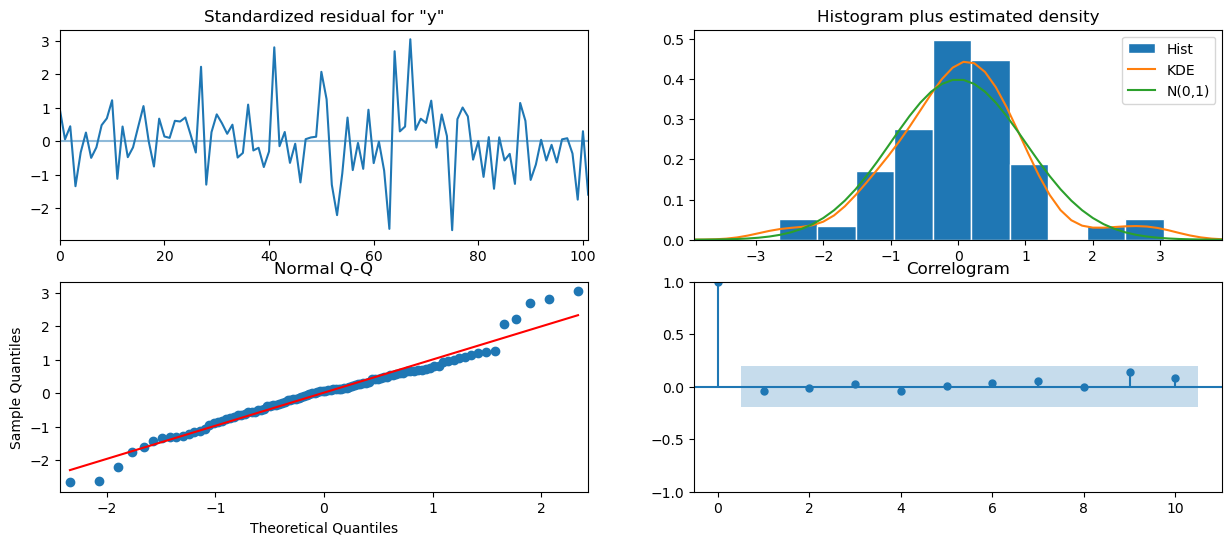

In [131]:
results_auto_SARIMA_12.plot_diagnostics()
plt.show()

Similar to the last iteration of the model where the seasonality parameter was taken as 12, here also we see that the model diagnostics plot does not indicate any remaining information that we can get.

Predict on the Test Set using this model and evaluate the model.

In [132]:
predicted_auto_SARIMA_12 = results_auto_SARIMA_12.get_forecast(steps=len(test))

In [133]:
predicted_auto_SARIMA_12.summary_frame(alpha=0.05).head()

y         mean     mean_se  mean_ci_lower  mean_ci_upper
0  4695.832826  380.005189    3951.036343    5440.629310
1  7226.352997  388.862347    6464.196802    7988.509192
2  1584.409010  389.251758     821.489584    2347.328436
3  1417.334905  392.093979     648.844829    2185.824982
4  1828.712536  392.130443    1060.150991    2597.274081

In [134]:
rmse = mean_squared_error(test['Sparkling'],predicted_auto_SARIMA_12.predicted_mean,squared=False)
print(rmse)

712.7242602017823


In [135]:
temp_resultsDf = pd.DataFrame({'RMSE': [rmse]}
                           ,index=['SARIMA(1,1,2)(2,0,2,12)'])


resultsDf = pd.concat([resultsDf,temp_resultsDf])

resultsDf

RMSE
ARIMA(2,1,2)             1325.166412
ARIMA(3,1,2)             1341.095895
SARIMA(1,1,2)(2,0,2,6)    642.829279
SARIMA(1,1,2)(2,0,2,12)   712.724260

### 5.3.2 Manual SARIMA 

/Users/srinivasant/anaconda3/lib/python3.11/site-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


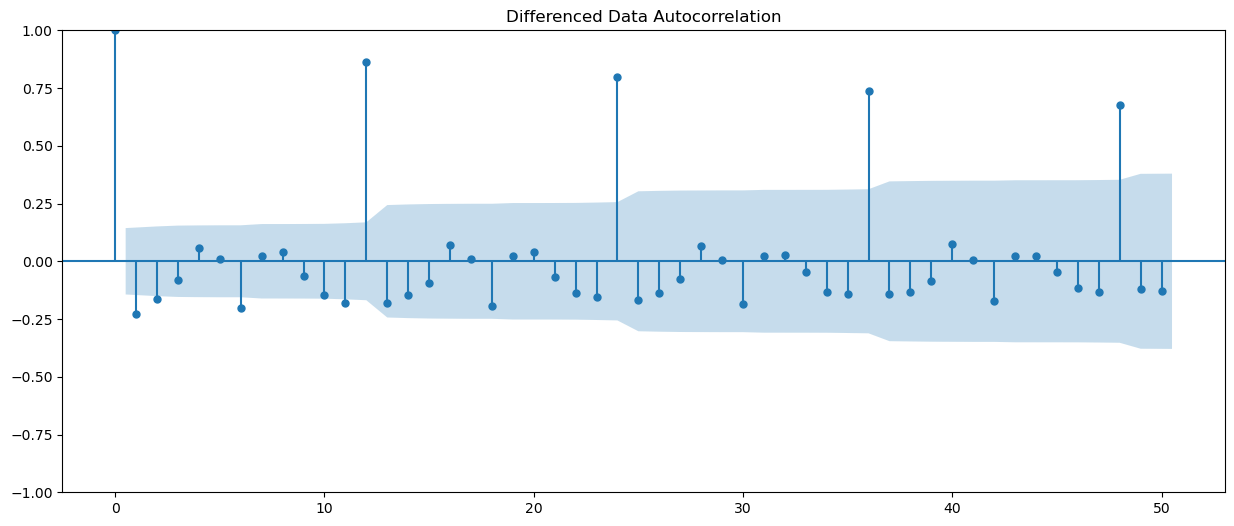

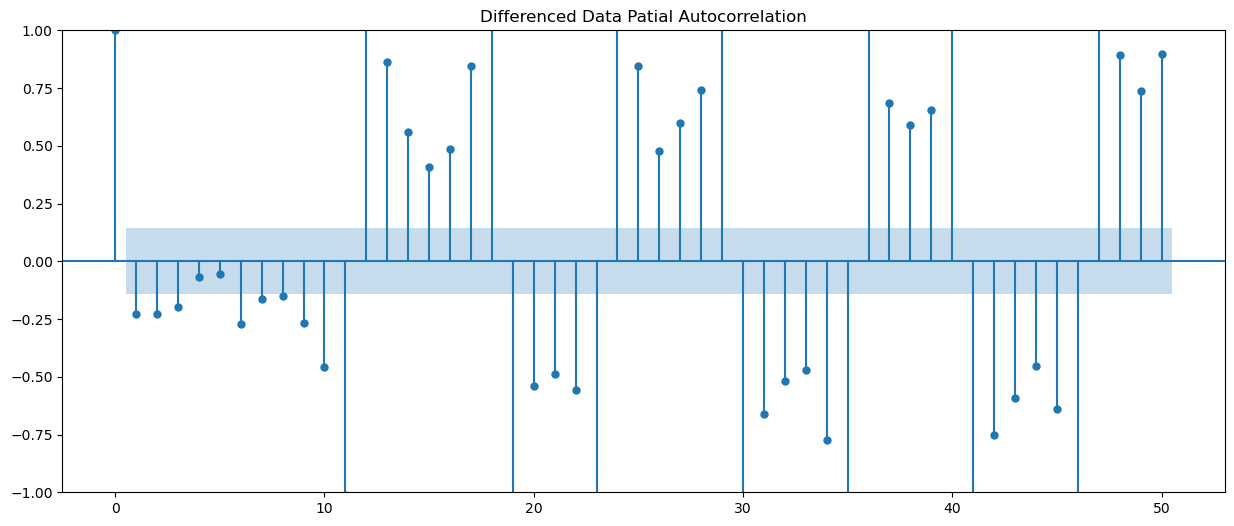

In [136]:
plot_acf(df['Sparkling'].diff().dropna(),lags=50,title='Differenced Data Autocorrelation')
plot_pacf(df['Sparkling'].diff().dropna(),lags=50,title='Differenced Data Patial Autocorrelation')
plt.show()

We see that our ACF plot at the seasonal interval (6) does not taper off. So, we go ahead and take a seasonal differencing of the original series. Before that let us look at the original series.

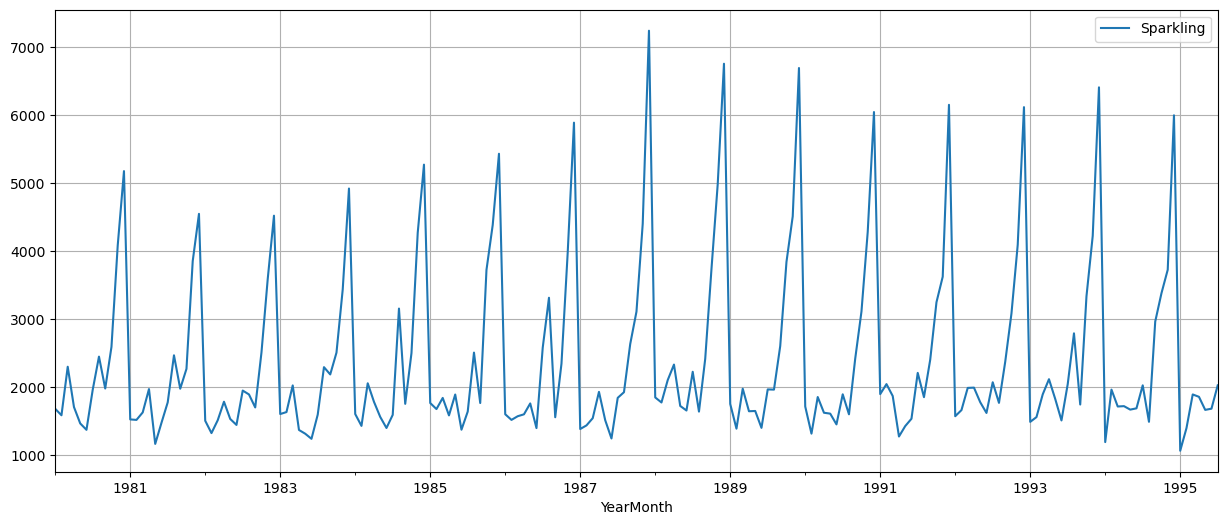

In [137]:
df.plot()
plt.grid();

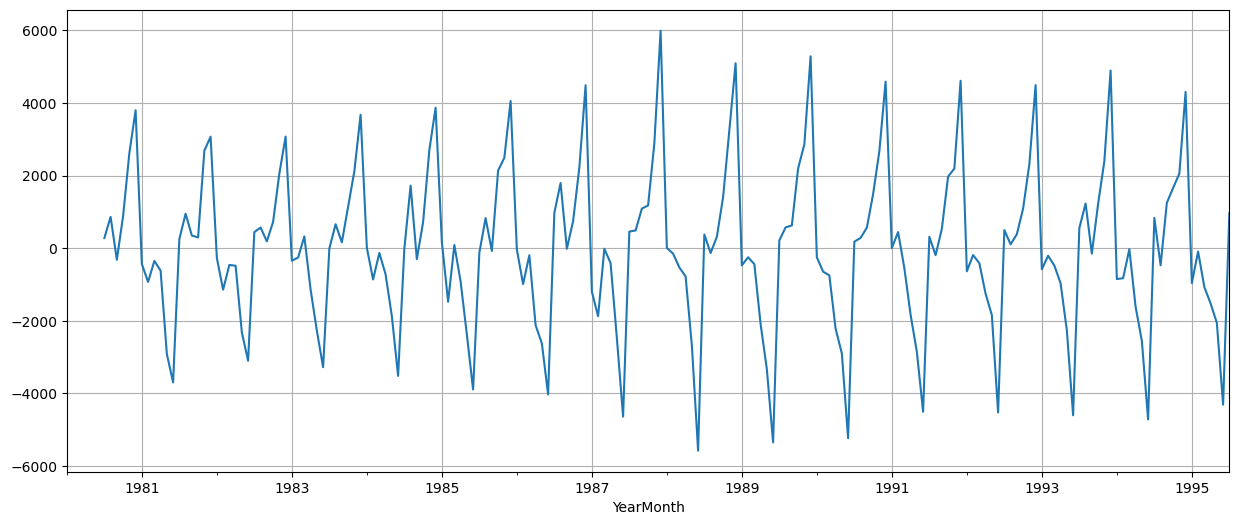

In [138]:
(df['Sparkling'].diff(6)).plot()
plt.grid();

We see that there might be a slight trend which can be noticed in the data. So we take a differencing of first order on the seasonally differenced series.

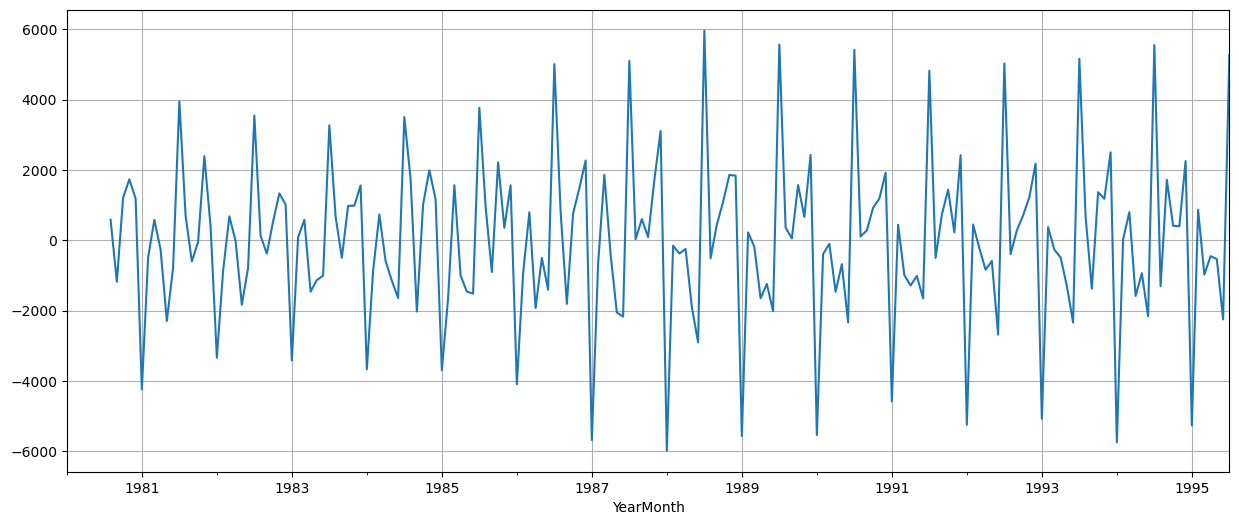

In [139]:
(df['Sparkling'].diff(6)).diff().plot()
plt.grid();

Now we see that there is almost no trend present in the data. Seasonality is only present in the data.
Let us go ahead and check the stationarity of the above series before fitting the SARIMA model.

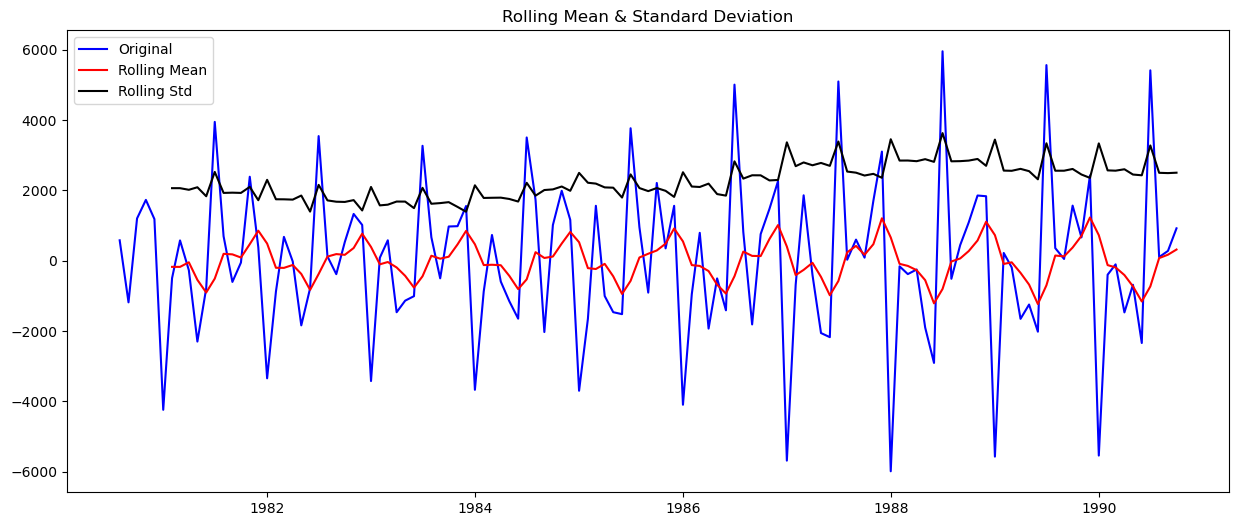

Results of Dickey-Fuller Test:
Test Statistic                -7.009360e+00
p-value                        6.986500e-10
#Lags Used                     1.300000e+01
Number of Observations Used    1.090000e+02
Critical Value (1%)           -3.491818e+00
Critical Value (5%)           -2.888444e+00
Critical Value (10%)          -2.581120e+00
dtype: float64 



In [140]:
test_stationarity((train['Sparkling'].diff(6).dropna()).diff(1).dropna())

Checking the ACF and the PACF plots for the new modified Time Series.

/Users/srinivasant/anaconda3/lib/python3.11/site-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


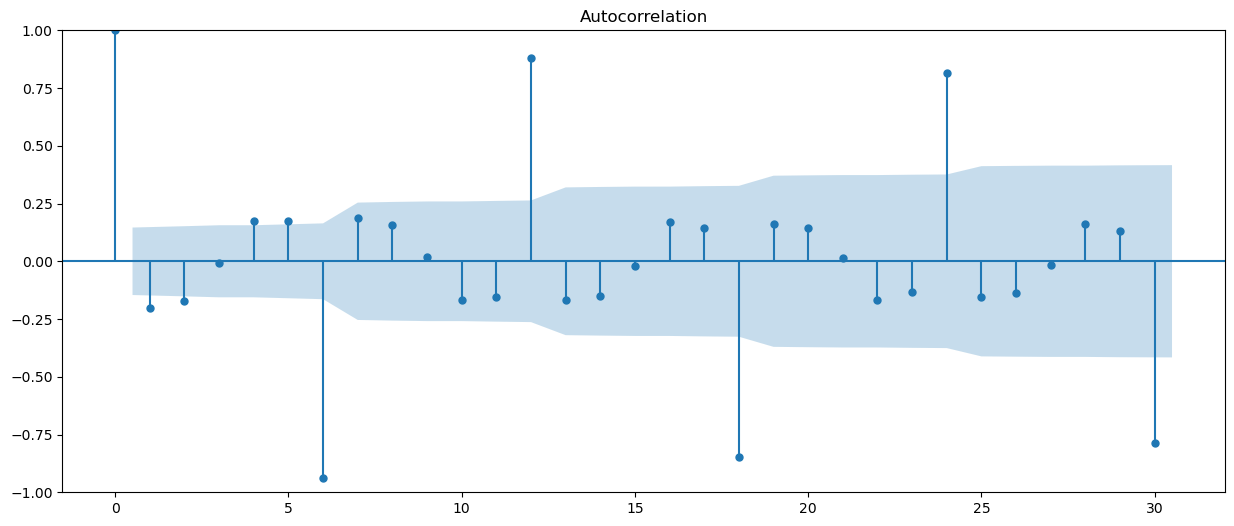

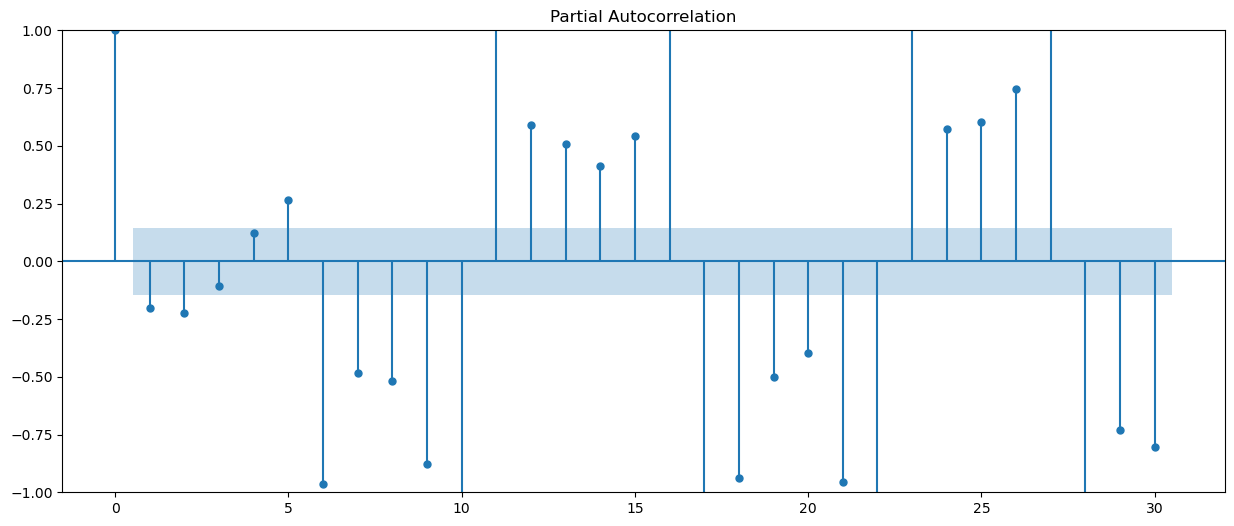

In [141]:
plot_acf((df['Sparkling'].diff(6).dropna()).diff(1).dropna(),lags=30)
plot_pacf((df['Sparkling'].diff(6).dropna()).diff(1).dropna(),lags=30);

Here, we have taken alpha=0.05.

We are going to take the seasonal period as 6. We will keep the p(1) and q(1) parameters same as the ARIMA model.

The Auto-Regressive parameter in an SARIMA model is 'P' which comes from the significant lag after which the PACF plot cuts-off to 2.

The Moving-Average parameter in an SARIMA model is 'q' which comes from the significant lag after which the ACF plot cuts-off to 2. 

Remember to check the ACF and the PACF plots only at multiples of 6 (since 6 is the seasonal period).


In [142]:
import statsmodels.api as sm

manual_SARIMA_6 = sm.tsa.statespace.SARIMAX(train['Sparkling'].values,
                                order=(2, 1, 2),
                                seasonal_order=(2, 1, 2, 6),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results_manual_SARIMA_6 = manual_SARIMA_6.fit(maxiter=1000)
print(results_manual_SARIMA_6.summary())

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            9     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  7.45716D+00    |proj g|=  3.67161D-01

At iterate    5    f=  6.91761D+00    |proj g|=  1.02446D-01

At iterate   10    f=  6.87977D+00    |proj g|=  2.84665D-01

At iterate   15    f=  6.85043D+00    |proj g|=  1.10888D-01

At iterate   20    f=  6.84458D+00    |proj g|=  9.98913D-03

At iterate   25    f=  6.84434D+00    |proj g|=  5.28985D-04

At iterate   30    f=  6.84414D+00    |proj g|=  2.48567D-03

At iterate   35    f=  6.84386D+00    |proj g|=  6.13884D-03

At iterate   40    f=  6.84317D+00    |proj g|=  1.54298D-02

At iterate   45    f=  6.84300D+00    |proj g|=  5.30429D-04

At iterate   50    f=  6.84274D+00    |proj g|=  8.59111D-03

At iterate   55    f=  6.83566D+00    |proj g|=  3.71638D-02

At iterate   60    f=  6.80486D+00    |proj g|=  9.13355D-02

At iterate   65    f=  6.7


   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.


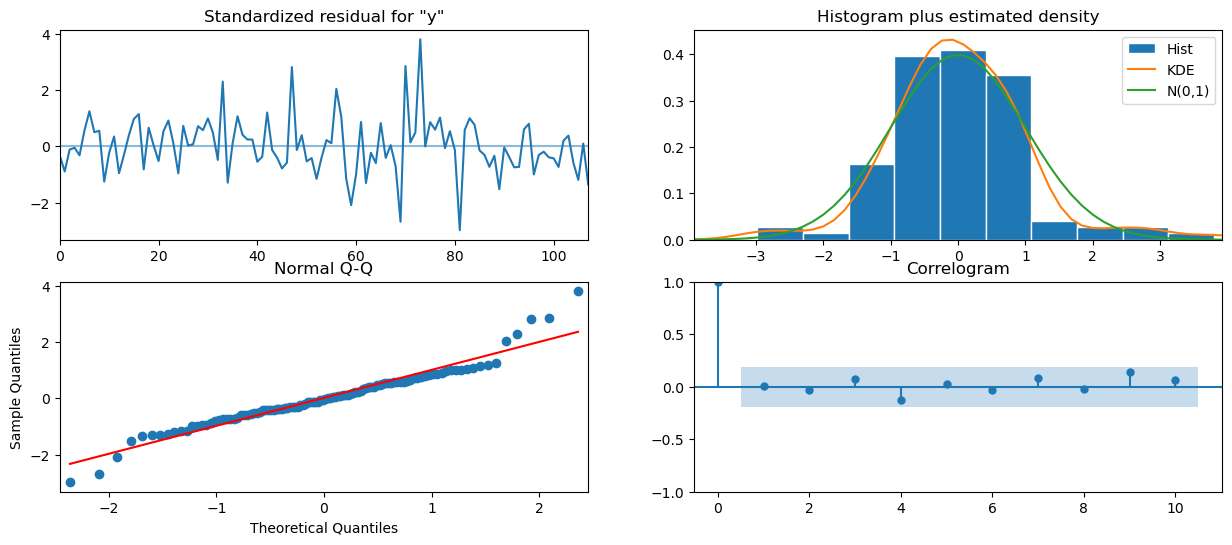

In [143]:
results_manual_SARIMA_6.plot_diagnostics()
plt.show()

Predict on the Test Set using this model and evaluate the model.

In [144]:
predicted_manual_SARIMA_6 = results_manual_SARIMA_6.get_forecast(steps=len(test))

In [145]:
predicted_manual_SARIMA_6.summary_frame(alpha=0.05).head()

y         mean     mean_se  mean_ci_lower  mean_ci_upper
0  4628.987382  389.485940    3865.608967    5392.365797
1  6888.685089  396.768602    6111.032918    7666.337260
2  1643.295018  396.772175     865.635845    2420.954190
3  1232.288954  397.204240     453.782950    2010.794958
4  1846.040814  398.715461    1064.572869    2627.508758

In [146]:
rmse = mean_squared_error(test['Sparkling'],predicted_manual_SARIMA_6.predicted_mean,squared=False)
print(rmse)

587.7208028043291


In [147]:
temp_resultsDf = pd.DataFrame({'RMSE': [rmse]}
                           ,index=['SARIMA(2,1,2)(2,1,2,6)'])


resultsDf = pd.concat([resultsDf,temp_resultsDf])

resultsDf

RMSE
ARIMA(2,1,2)             1325.166412
ARIMA(3,1,2)             1341.095895
SARIMA(1,1,2)(2,0,2,6)    642.829279
SARIMA(1,1,2)(2,0,2,12)   712.724260
SARIMA(2,1,2)(2,1,2,6)    587.720803

In [148]:
import statsmodels.api as sm

manual_SARIMA_12 = sm.tsa.statespace.SARIMAX(train['Sparkling'].values,
                                order=(2, 1, 2),
                                seasonal_order=(2, 1, 2, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results_manual_SARIMA_12 = manual_SARIMA_12.fit(maxiter=1000)
print(results_manual_SARIMA_12.summary())

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            9     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.18485D+00    |proj g|=  1.47022D-01


 This problem is unconstrained.



At iterate    5    f=  5.15372D+00    |proj g|=  3.69977D-02

At iterate   10    f=  5.15098D+00    |proj g|=  2.39361D-03

At iterate   15    f=  5.15095D+00    |proj g|=  9.18060D-04

At iterate   20    f=  5.15094D+00    |proj g|=  2.71230D-04

At iterate   25    f=  5.15093D+00    |proj g|=  1.34022D-03

At iterate   30    f=  5.15072D+00    |proj g|=  7.68283D-03

At iterate   35    f=  5.14620D+00    |proj g|=  1.15758D-02

At iterate   40    f=  5.14489D+00    |proj g|=  2.58497D-03

At iterate   45    f=  5.14487D+00    |proj g|=  1.27147D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    9     48     53   

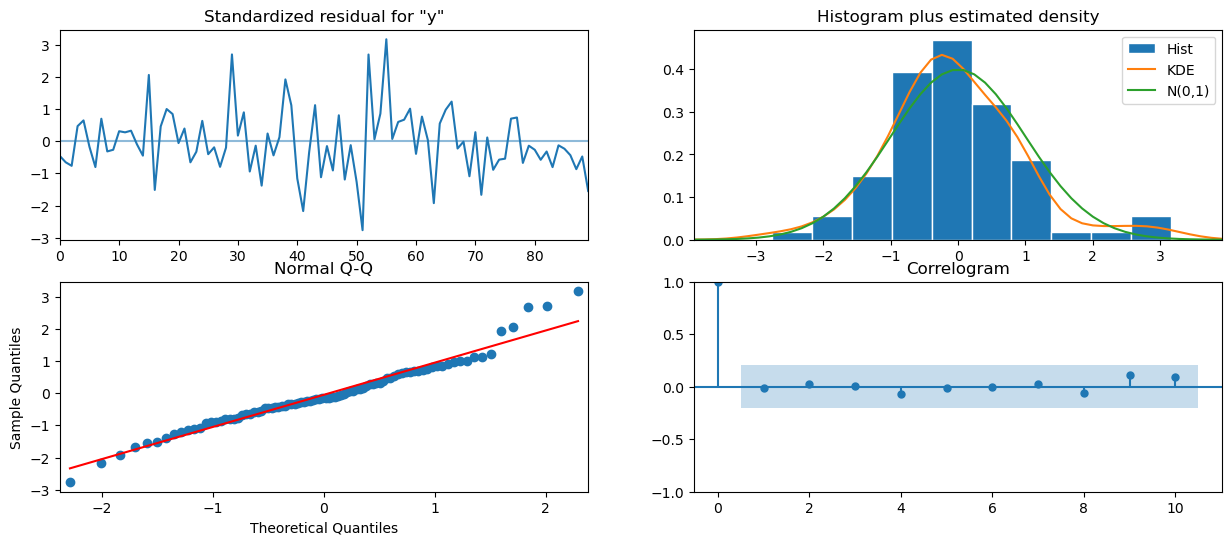

In [149]:
results_manual_SARIMA_12.plot_diagnostics()
plt.show()

In [150]:
predicted_manual_SARIMA_12 = results_manual_SARIMA_12.get_forecast(steps=len(test))

In [151]:
predicted_manual_SARIMA_12.summary_frame(alpha=0.05).head()

y         mean     mean_se  mean_ci_lower  mean_ci_upper
0  4531.666718  404.548854    3738.765533    5324.567902
1  7018.733809  416.400310    6202.604199    7834.863420
2  1800.710841  418.633102     980.205039    2621.216643
3  1545.417534  419.938830     722.352551    2368.482516
4  2018.328957  420.092912    1194.961980    2841.695935

In [152]:
rmse = mean_squared_error(test['Sparkling'],predicted_manual_SARIMA_12.predicted_mean,squared=False)
print(rmse)

486.3967576370178


### 5.4 Check the performance of the models built

In [153]:
temp_resultsDf = pd.DataFrame({'RMSE': [rmse]}
                           ,index=['SARIMA(2,1,2)(2,1,2,12)'])


resultsDf = pd.concat([resultsDf,temp_resultsDf])

Model22 = resultsDf

Model22

RMSE
ARIMA(2,1,2)             1325.166412
ARIMA(3,1,2)             1341.095895
SARIMA(1,1,2)(2,0,2,6)    642.829279
SARIMA(1,1,2)(2,0,2,12)   712.724260
SARIMA(2,1,2)(2,1,2,6)    587.720803
SARIMA(2,1,2)(2,1,2,12)   486.396758

In [154]:
# In the models build using ARIMA & SARIMA the best model is Manual SARIMA with params of (2,1,2) (2,1,2,12) if seasonality 12 has the lowest RMSE among the other models.


## 6. Compare the performance of the models

### 6.1 Compare the performance of all the models built

In [155]:
#concat_df = pd.concat([Model11, Model22])

#concat_df

In [156]:
Model11

Test RMSE
RegressionOnTime                                    1392.438305
2pointTrailingMovingAverage                          811.178937
4pointTrailingMovingAverage                         1184.213295
6pointTrailingMovingAverage                         1337.200524
9pointTrailingMovingAverage                         1422.653281
Alpha=0.038003579704776386,SimpleExponentialSmo...  1362.355525
Alpha=0.4,SimpleExponentialSmoothing                1363.037803
Alpha=0.3,Beta=0.3,DoubleExponentialSmoothing       1597.853999
Alpha=0.075,Beta=0.064,Gamma=0.376,TripleExpone...   381.657232
Alpha=0.9,Beta=0.1,Gamma=0.2,TripleExponentialS...   342.322388

In [157]:
Model22

RMSE
ARIMA(2,1,2)             1325.166412
ARIMA(3,1,2)             1341.095895
SARIMA(1,1,2)(2,0,2,6)    642.829279
SARIMA(1,1,2)(2,0,2,12)   712.724260
SARIMA(2,1,2)(2,1,2,6)    587.720803
SARIMA(2,1,2)(2,1,2,12)   486.396758

### 6.2 Choose the best model with proper rationale 

The best model to choose is the Manual SARIMA model with best params of (2,1,2) (2,1,2,12) and seasonality 12 has the lowest RMSE values across all the model

### 6.3 Rebuild the best model using the entire data 

Building the most optimum model on the Full Data.

In [158]:
full_data_model = sm.tsa.statespace.SARIMAX(df['Sparkling'],
                                order=(2,1,2),
                                seasonal_order=(2, 1, 2, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results_full_data_model = full_data_model.fit(maxiter=1000)
print(results_full_data_model.summary())

/Users/srinivasant/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Users/srinivasant/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            9     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.85037D+00    |proj g|=  1.19080D-01


 This problem is unconstrained.



At iterate    5    f=  5.82986D+00    |proj g|=  2.93354D-02

At iterate   10    f=  5.82693D+00    |proj g|=  5.81552D-03

At iterate   15    f=  5.82617D+00    |proj g|=  1.09083D-02

At iterate   20    f=  5.82595D+00    |proj g|=  7.59715D-03

At iterate   25    f=  5.82582D+00    |proj g|=  8.52088D-03

At iterate   30    f=  5.82578D+00    |proj g|=  4.90765D-04

At iterate   35    f=  5.82569D+00    |proj g|=  7.80163D-03

At iterate   40    f=  5.81960D+00    |proj g|=  2.85607D-02

At iterate   45    f=  5.80682D+00    |proj g|=  2.48574D-02

At iterate   50    f=  5.80607D+00    |proj g|=  2.40009D-03

At iterate   55    f=  5.80603D+00    |proj g|=  1.87357D-03

At iterate   60    f=  5.80602D+00    |proj g|=  6.50094D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized 

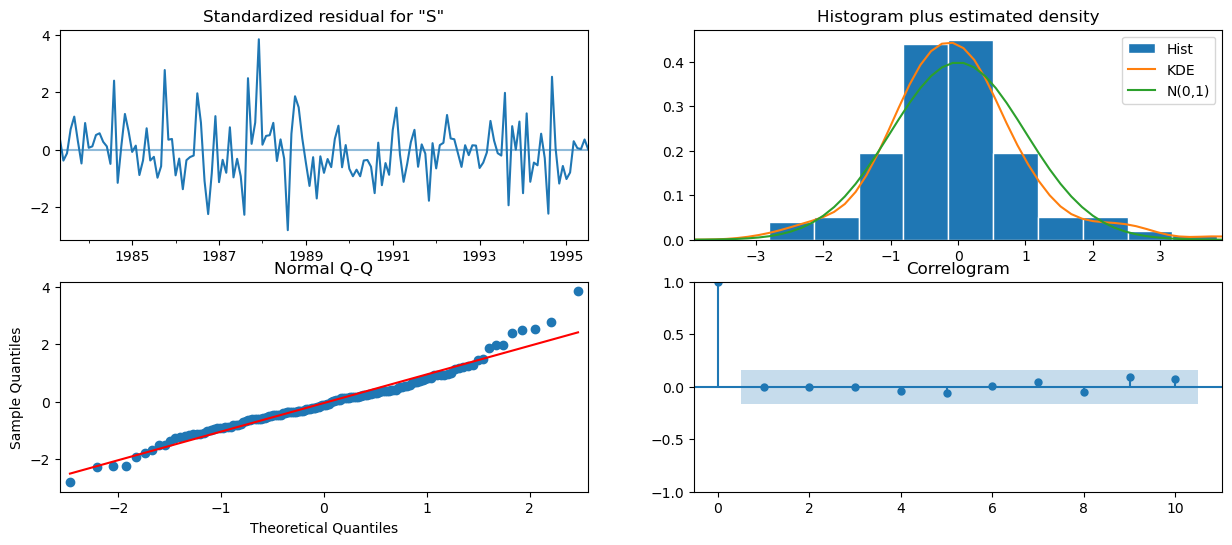

In [159]:
results_full_data_model.plot_diagnostics();

### 6.4 Make a forecast for the next 12 months

In [160]:
predicted_manual_SARIMA_12_full_data = results_full_data_model.get_forecast(steps=12)

In [161]:
predicted_manual_SARIMA_12_full_data.summary_frame(alpha=0.05).head()

Sparkling          mean     mean_se  mean_ci_lower  mean_ci_upper
1995-08-01  2132.779375  373.933970    1399.882262    2865.676489
1995-09-01  2359.397982  379.074828    1616.424973    3102.370992
1995-10-01  3266.882972  379.150138    2523.762357    4010.003587
1995-11-01  4040.248541  381.486698    3292.548353    4787.948730
1995-12-01  6101.119047  381.593884    5353.208778    6849.029317

In [162]:
rmse = mean_squared_error(df['Sparkling'],results_full_data_model.fittedvalues,squared=False)
print('RMSE of the Full Model',rmse)

RMSE of the Full Model 568.7895790185744


In [163]:
pred_full_manual_SARIMA_date = predicted_manual_SARIMA_12_full_data.summary_frame(alpha=0.05).set_index(pd.date_range(start='1995-08-01',end='1996-07-31',freq='M'))

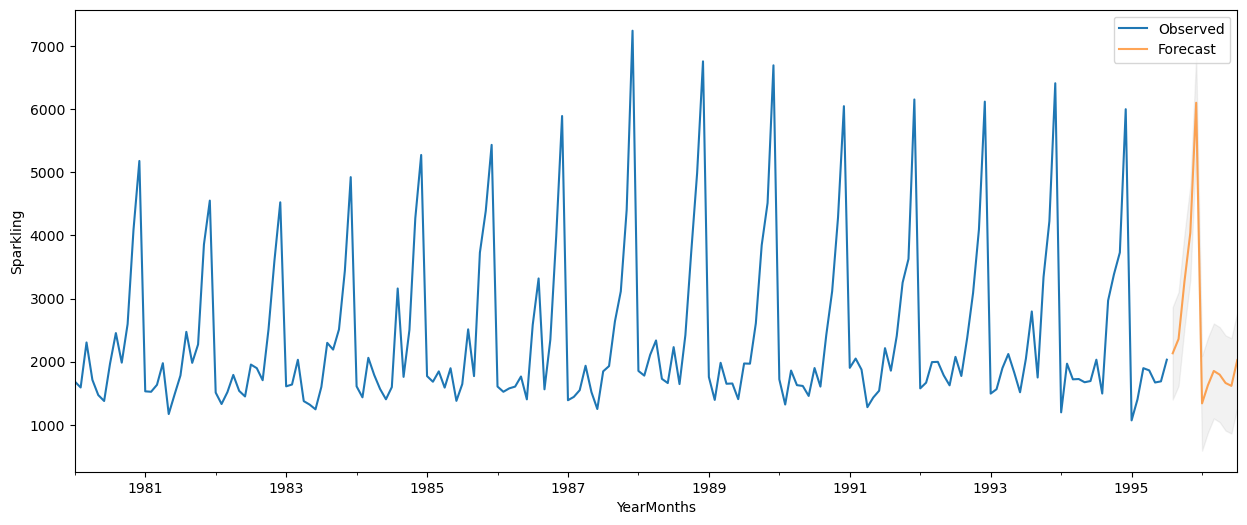

In [164]:
# plot the forecast along with the confidence band

axis = df['Sparkling'].plot(label='Observed')
pred_full_manual_SARIMA_date['mean'].plot(ax=axis, label='Forecast', alpha=0.7)
axis.fill_between(pred_full_manual_SARIMA_date.index, 
                  pred_full_manual_SARIMA_date['mean_ci_lower'], 
                  pred_full_manual_SARIMA_date['mean_ci_upper'], 
                  color='k', alpha=.05)
axis.set_xlabel('YearMonths')
axis.set_ylabel('Sparkling')
plt.legend(loc='best')
plt.show()

In [165]:
round(pred_full_manual_SARIMA_date,2)

Sparkling      mean  mean_se  mean_ci_lower  mean_ci_upper
1995-08-31  2132.78   373.93        1399.88        2865.68
1995-09-30  2359.40   379.07        1616.42        3102.37
1995-10-31  3266.88   379.15        2523.76        4010.00
1995-11-30  4040.25   381.49        3292.55        4787.95
1995-12-31  6101.12   381.59        5353.21        6849.03
1996-01-31  1339.52   382.79         589.26        2089.78
1996-02-29  1627.01   382.91         876.52        2377.51
1996-03-31  1852.84   383.72        1100.76        2604.92
1996-04-30  1794.72   383.98        1042.13        2547.30
1996-05-31  1662.21   384.68         908.26        2416.17
1996-06-30  1616.36   385.23         861.33        2371.39
1996-07-31  2025.59   385.89        1269.27        2781.92

## 7. Actionable Insights & Recommendations

### 7.1 key takeaways (actionable insights and recommendations) for the business

Actionable Insights: 

•	There is no certain trend in the data series
•	There are outliers across all years data
•	In monthly trend there was decrease trend from March to June and from July there was an increasing trend
•	December month across years has the highest sales 
•	On quarterly basis the 4th quarter has the highest sales
•	The data is right skewed as the mean is greater than median
•	In decomposition, multiplicative model is the suited model as there no specific pattern in the residual
•	The data has no defined trend and has seasonality
•	Across LR, SA, MA, SES, DES & TES – TES has the lowest RMSE value
•	The DataFrame is not stationary and AD fuller method is used to make it stationary
•	Among Auto ARIMA & SARIMA, Manual ARIMA & SARIMA – Manual SARIMA with seasonality 12 has the lowest RMSE value

    
Recommendations:     

•	The ABC Estate Wines company must ensure the stock availability of Sparkling type wines on a higher during the month of OCT, NOV & DEC on all years
•	The marketing spend can be reduced during these high sales months
•	July, Aug & Sept seems to be a avg sales months and the company can Optimize the production and marketing spend on these months
•	January month can be ignored for marketing & stock availability as it contributes to the lowest sales due the highest sales in December
•	Winter season is the influencing factor on the wine sales

